##**Gestion quantitative des risques dans R**
+ *5 heures*
+ *18 Vidéos*
+ *55 Exercices*
+ *12 348 participants*
+ *4 350 XP*

###**Description du cours**

+ ***Dans Quantitative Risk Management (QRM), vous construirez des modèles pour comprendre les risques des portefeuilles financiers. Il s'agit d'une tâche vitale dans les secteurs de la banque, de l'assurance et de la gestion d'actifs. La première étape du processus de construction du modèle consiste à collecter des données sur les facteurs de risque sous-jacents qui affectent la valeur du portefeuille et à analyser leur comportement. Dans ce cours, vous apprendrez à travailler avec des séries de rendement de facteurs de risque, à étudier les propriétés empiriques ou les soi-disant «faits stylisés» de ces données - y compris leur non-normalité et leur volatilité typiques, et à faire des estimations de la valeur à risque pour un portefeuille.***

####**1) Explorer les données sur les facteurs de risque du marché**

+ ***Dans ce chapitre, vous apprendrez à former des séries de rendements, à les agréger sur de plus longues périodes et à les tracer de différentes manières. Vous examinerez des exemples utilisant le package qrmdata.***


|OBJECTIFS|
|------------------|
Bienvenue au cours !
Exploration des séries chronologiques des facteurs de risque : indices boursiers
Exploration des séries chronologiques des facteurs de risque : actions individuelles
Exploration des données sur les facteurs de risque : taux de change
Rendements des facteurs de risque
Explorer les séries de retour
Différentes manières de tracer les séries de facteurs de risque et de rendement
Agrégation des retours de journaux
Agrégation de séries de retours de journaux
Un test sur l'agrégation des log-returns
Explorer d'autres types de facteurs de risque
Données sur les matières premières
Données sur les taux d'intérêt

####**2) Les rendements réels sont plus risqués que la normale**

+ ***Dans ce chapitre, vous découvrirez les tests graphiques et numériques de normalité, les appliquerez à différents ensembles de données et envisagerez le modèle t de Student alternatif.***


|OBJECTIFS|
|------------------|
La distribution normale
Méthodes graphiques pour évaluer la normalité
Test de normalité
Graphiques Q-Q pour évaluer la normalité
Asymétrie, aplatissement et test de Jarque-Bera
Tests numériques de normalité
Tester la normalité pour des horizons temporels plus longs
Chevauchement des rendements
Réviser les connaissances sur les distributions normales et les rendements
La distribution t de Student
Ajustement de la distribution t aux données
Tester les rendements FX pour la normalité
Tester la normalité des rendements des taux d'intérêt
Tester la normalité des rendements du prix de l'or

####**3) Les rendements réels sont volatils et corrélés**

+ ***Dans ce chapitre, vous découvrirez la volatilité et comment la détecter à l'aide de diagrammes d'actes. Vous apprendrez à appliquer les tests de Ljung-Box pour la corrélation en série et à estimer les corrélations croisées.***


|OBJECTIFS|
|------------------|
Caractéristiques des séries à rendement volatil
Repérer une série temporelle volatile
Estimation des corrélations en série
Utiliser les graphiques acf pour révéler la volatilité
Le test de Ljung-Box
Application des tests de Ljung-Box pour renvoyer des données
Application des tests de Ljung-Box aux rendements à intervalle plus long
Regard sur les extrêmes des séries de rendements volatils
Valeurs extrêmes dans les séries temporelles volatiles
Corrélations croisées entre les séries de rendement des facteurs de risque
Les faits stylisés de la série retour
Volatilité et corrélation des rendements FX
Volatilité et corrélation des données de taux d'intérêt
Examen des connaissances sur la volatilité et la corrélation

####**4) Estimation de la valeur à risque (VaR) du portefeuille**

+ ***Dans ce chapitre, le concept de valeur à risque et des méthodes simples d'estimation de la VaR basées sur la simulation historique sont introduits.***

|OBJECTIFS|
|------------------|
Value-at-risk et manque à gagner attendu
Calcul de la VaR et de l'ES pour une distribution normale
Portefeuille d'actions internationales
Examen des facteurs de risque pour le portefeuille d'actions internationales
Simulation historique
Estimation de la VaR et de l'ES
Portefeuille d'options et Black Scholes
Calculer le prix Black-Scholes d'une option
Facteurs de risque liés aux actions et à la volatilité implicite
Simulation historique pour l'exemple d'option
Simulation historique des pertes du portefeuille d'options
Estimation de la VaR et de l'ES pour le portefeuille d'options
Calcul de la VaR pour les pertes hebdomadaires

In [ ]:
install.packages('qrmtools')
install.packages('copula')
install.packages('moments')
install.packages('zoo')
install.packages('xts')
install.packages('qrmdata')

In [ ]:
library(qrmtools)
library(moments)
library(zoo)
library(xts)
library(qrmdata)

###**Bienvenue au cours!**

####**1. Bienvenue au cours!**

+ ***Bonjour. Je m’appelle Alex McNeil et je vais vous présenter « Introduction à la gestion quantitative des risques ».***

####**2. À propos de moi**
+ ***J’ai une formation en statistique mathématique, en actuariat et en finance quantitative. Avec mes collègues Ruediger Frey et Paul Embrechts, je suis l’auteur du livre « Quantitative Risk Management: Concepts, Techniques, and Tools », publié par Princeton University Press***. 

+ Si vous voulez le contexte théorique de ce cours, je vous recommande de jeter un coup d’œil. 

+ Avec mes co-auteurs et avec Marius Hofert, j’ai également créé le **site web qrmtutorial(dot)org** qui fournit des matériaux complémentaires au livre QRM. 

+ En particulier, il y a beaucoup de code R là-bas, que vous voudrez peut-être essayer après avoir suivi ce cours. 

+ Marius et moi avons deux paquets R qui figurent en bonne place dans qrmtutorial. 

+ Il s’agit de qrmdata, qui est une grande collection d’ensembles de données financières pour les étudiants et les chercheurs en QRM, et qrmtools, qui est un ensemble de fonctions utiles. Vous utiliserez ces packages dans le cours.

####**3. L’objectif du MRQ**
+ En MRQ, l’objectif est de quantifier le risque d’un portefeuille d’actifs risqués. 

+ La mesure du risque est la première étape vers la gestion du risque. 

+ Dans le livre que j’ai écrit, nous considérons les portefeuilles typiques d’actifs risqués détenus par les banques et les compagnies d’assurance, et parfois aussi leurs passifs. 

+ Mais les idées s’appliquent également au portefeuille d’un investisseur privé, comme vous ou moi. 

+ La gestion du risque peut impliquer beaucoup de choses. Par exemple, vous pouvez essayer de réduire le risque en vendant des actifs, en acquérant de nouveaux actifs pour accroître la diversification du portefeuille ou en utilisant des stratégies dites de couverture. 

+ Pour les banques et les assureurs, une partie importante de la gestion des risques consiste à s’assurer qu’ils disposent de fonds propres suffisants pour supporter des pertes importantes sur leurs portefeuilles et rester solvables. 

+ À cette fin, ils mesurent les montants qu’ils pourraient perdre en période de tensions extrêmes sur les marchés. Un exemple bien connu de l’une de ces mesures du risque est la valeur à risque. 

+ Dans ce cours, vous travaillerez jusqu’au calcul de la valeur à risque pour les portefeuilles. Pour commencer, il est important de considérer d’où vient le risque dans un portefeuille.

####**4. Facteurs de risque**
+ Pensez donc à un portefeuille d’actifs risqués. 

+ Il peut contenir des trackers d’indices boursiers, des actions individuelles, des obligations d’État ou des bons du Trésor, des obligations de sociétés. 

+ Il peut contenir des actifs libellés en monnaie nationale et certains libellés en devises étrangères.

+ Il peut contenir des matières premières, comme l’or. 

+ Il peut contenir des titres dérivés conçus pour couvrir le risque ou spéculer sur les mouvements de prix, tels que les options sur actions. 

+ La valeur de ce portefeuille à tout moment dépend des valeurs fluctuantes de nombreuses quantités sous-jacentes, que nous appelons facteurs de risque. 

+ Les indices boursiers, les cours des actions individuelles, les taux de change, les taux d’intérêt pour différentes périodes d’emprunt (dans le cas des obligations) et les prix des produits de base sont des exemples de facteurs de risque. 

+ Chargeons le package QRMdata, puis le jeu de données SP500. 

+ Celui-ci contient les valeurs quotidiennes de l’indice boursier bien connu basé sur 500 des actions américaines les plus importantes.

#####**5. Analyse des facteurs de risque avec R**
+ En utilisant la tête et la queue, les premières lignes et les dernières lignes des données peuvent être affichées. Notez les dates des premières valeurs en 1950 et des dernières valeurs jusqu’à la fin de 2015.

####**6. Tracer les facteurs de risque**
+ Tracons l’index. Vous pouvez voir comment il a généralement augmenté au fil du temps, mais avec quelques baisses comme autour de la crise financière de 2008-2009.

####**7. Entraînons-nous!**
+ C’est maintenant à votre tour de travailler sur les exercices et d’explorer certaines données sur les facteurs de risque financiers. 

+ Vous examinerez un autre indice boursier, des cours d’actions individuelles et quelques taux de change.

###**EXERCICES**

####**Exploration des séries chronologiques des facteurs de risque : indices boursiers**

+ ***Dans cet exercice, vous examinerez un indice boursier et le tracerez pour une plage de dates particulière. Les données utilisées dans cet exercice et dans le reste du cours sont contenues dans le package [qrmdata](https://www.rdocumentation.org/packages/qrmdata/versions/2022-05-31-1). Vous avez également besoin du package [xts](https://www.rdocumentation.org/packages/xts/versions/0.12.1) pour manipuler les séries temporelles.***

+ **Lorsque la bibliothèque [qrmdata](https://www.rdocumentation.org/packages/qrmdata/versions/2022-05-31-1) est attachée, comme ce sera le cas tout au long du cours, vous pouvez charger un jeu de données avec la commande data(). Par exemple, la commande data("FTSE") charge l'indice UK FTSE (Financial Times Stock Exchange), auquel vous pouvez ensuite faire référence en tant qu'objet FTSE.**

+ Si vous souhaitez extraire les données d'une certaine plage de dates, par exemple du 1er avril au 30 juin 2000, vous pouvez créer un nouvel objet à l'aide de la commande 

      ftse00 <- FTSE["2000-04-01/2000-06-30 "].

+ À partir de maintenant, le package xts sera également déjà chargé dans votre espace de travail.

+ *Ce cours aborde de nombreux concepts que vous avez peut-être oubliés, donc si jamais vous avez besoin d'un rappel rapide, téléchargez [le xts dans R Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/72771032-0653-4d87-a798-4a83879e99c8) et gardez-le à portée de main !*

####**Instructions**

+ Chargez l'indice Dow Jones "DJ" depuis qrmdata.
+ Affichez les premières et dernières lignes de l'index DJ avec head() et tail().
+ Tracez l'index DJ en utilisant plot().
+ Extrayez l'indice DJ pour la période de crise 2008-2009 et affectez-le à l'objet dj0809.
+ Tracez le dj0809 en utilisant la même fonction de traçage que ci-dessus.

In [ ]:
# Load DJ index
data("DJ")

In [ ]:
# Show head() and tail() of DJ index
head(DJ)

              ^DJI
1985-01-29 1292.62
1985-01-30 1287.88
1985-01-31 1286.77
1985-02-01 1277.72
1985-02-04 1290.08
1985-02-05 1285.23

In [ ]:
tail(DJ)

               ^DJI
2015-12-23 17602.61
2015-12-24 17552.17
2015-12-28 17528.27
2015-12-29 17720.98
2015-12-30 17603.87
2015-12-31 17425.03

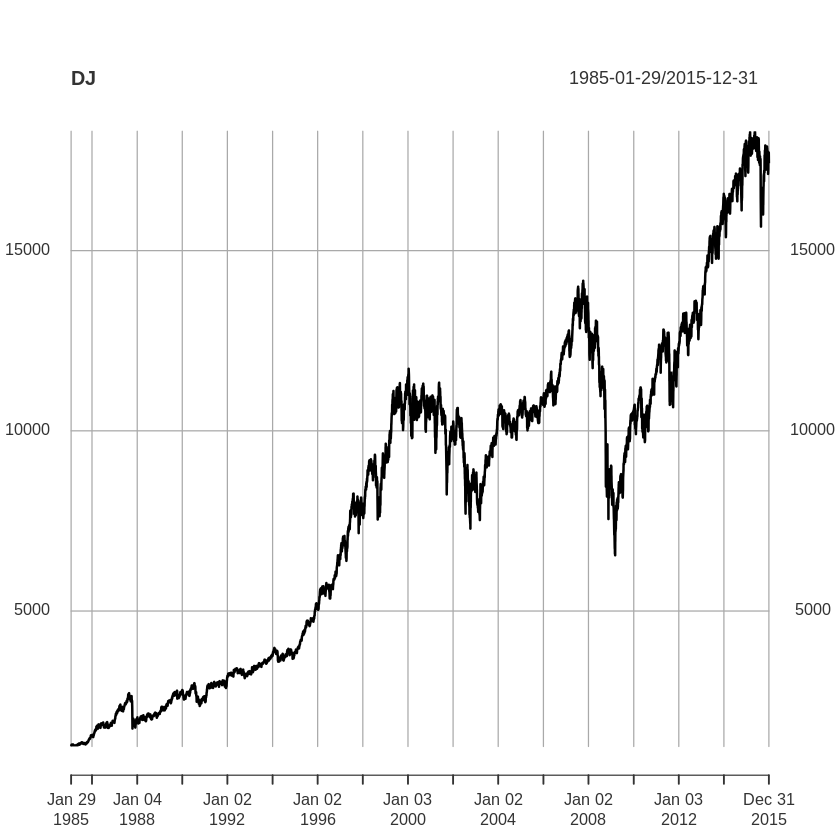

In [ ]:
# Plot DJ index
plot(DJ)

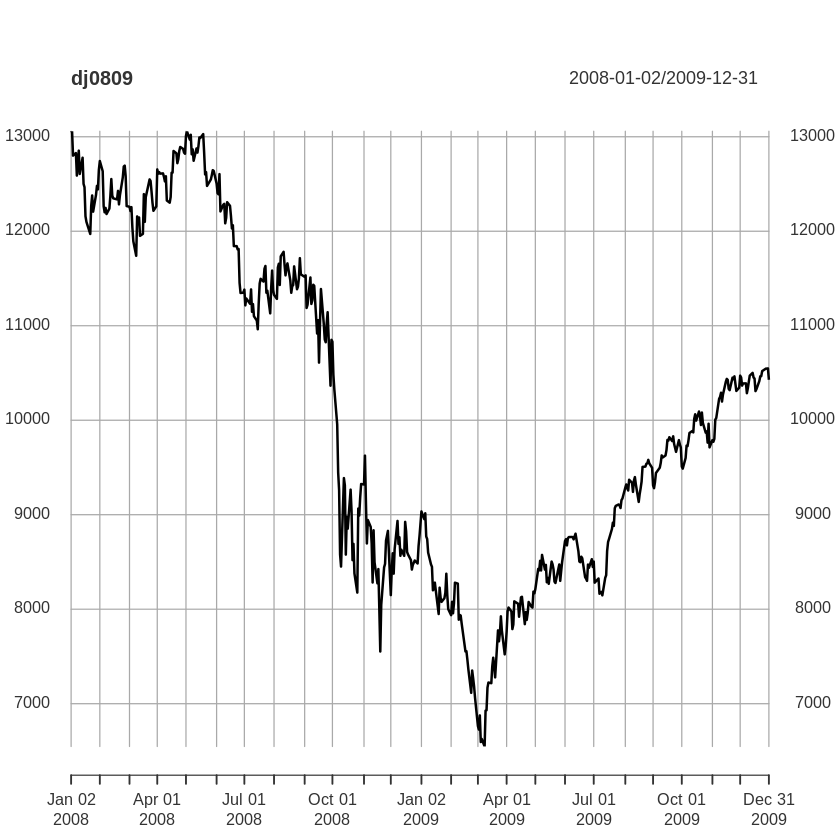

In [ ]:
# Extract 2008-2009 and assign to dj0809
dj0809 <- DJ["2008-01-01/2009-12-31"]

# Plot dj0809
plot(dj0809)

***Bien joué! Vous avez tracé votre première série chronologique d'indices boursiers. Regardez bien comment il se comporte et notez à quel point l'indice a chuté lors de la crise financière de 2008-2009.***

####**Exploration des séries chronologiques des facteurs de risque : actions individuelles**

+ ***Pour certaines applications de gestion des risques, il suffit de modéliser le risque actions en examinant les indices. Si vous souhaitez un modèle plus détaillé du risque dans un portefeuille d'actions, vous pouvez explorer le niveau des cours des actions individuelles.***

+ Dans le chapitre précédent, vous avez utilisé 
  + DJ["2008/2009"] pour extraire les données Dow Jones de certaines lignes d'un objet xts en spécifiant un index de plage de dates. 
  
  + Pour extraire également des données de colonnes particulières, vous pouvez ajouter un identifiant de colonne, comme un nom de chaîne ou un index numérique, entre parenthèses après une virgule. Pour sélectionner plusieurs colonnes, incluez ces identifiants de colonne dans un vecteur. 

  + Ce format [lignes, colonnes] est cohérent avec l'indexation de la plupart des autres objets bidimensionnels dans R.

        data[index, colname]
        data[index, c(col1index, col2index)]


+ *Le package qrmdata comprend également des données pour certains constituants, ou les actions ou les sociétés faisant partie d'un indice plus large. Les données des constituants du Dow Jones sont contenues dans "DJ_const". Dans cet exercice, vous allez afficher les noms de toutes ses actions, sélectionner les cours des actions Apple et Goldman Sachs et les tracer à l'aide de la commande plot.zoo() pour afficher plusieurs séries temporelles.*

####**Instructions**

+ Chargez les données des composants DJ "DJ_const" à partir de qrmdata.
+ Utilisez names() pour afficher les noms dans DJ_const et head() pour afficher les premières lignes.
+ Extrayez uniquement les cours des actions Apple ("AAPL") et Goldman Sachs ("GS") pour 2008-2009 et affectez-les aux stocks d'objets.
+ Tracez les stocks à l'aide de plot.zoo().

In [ ]:
# Load DJ constituents data
data("DJ_const")

In [ ]:
# Apply names() and head() to DJ_const
names(DJ_const)

[1] "AAPL" "AXP"  "BA"   "CAT"  "CSCO" "CVX"  "DD"   "DIS"  "GE"   "GS"  
[11] "HD"   "IBM"  "INTC" "JNJ"  "JPM"  "KO"   "MCD"  "MMM"  "MRK"  "MSFT"
[21] "NKE"  "PFE"  "PG"   "TRV"  "UNH"  "UTX"  "V"    "VZ"   "WMT"  "XOM"

In [ ]:
head(DJ_const)

           AAPL AXP       BA      CAT CSCO CVX       DD      DIS       GE GS HD
1962-01-02   NA  NA 0.212905 0.593184   NA  NA 1.227958 0.061014 0.145967 NA NA
1962-01-03   NA  NA 0.217163 0.598964   NA  NA 1.229230 0.061832 0.144501 NA NA
1962-01-04   NA  NA 0.215034 0.614372   NA  NA 1.220331 0.061832 0.142794 NA NA
1962-01-05   NA  NA 0.210773 0.620152   NA  NA 1.187280 0.062039 0.139132 NA NA
1962-01-08   NA  NA 0.211306 0.624001   NA  NA 1.169484 0.061832 0.138889 NA NA
1962-01-09   NA  NA 0.211839 0.629777   NA  NA 1.173297 0.063060 0.139620 NA NA
                IBM INTC JNJ JPM       KO MCD MMM MRK MSFT NKE PFE PG TRV UNH
1962-01-02 2.346625   NA  NA  NA 0.031031  NA  NA  NA   NA  NA  NA NA  NA  NA
1962-01-03 2.367136   NA  NA  NA 0.030339  NA  NA  NA   NA  NA  NA NA  NA  NA
1962-01-04 2.343548   NA  NA  NA 0.030571  NA  NA  NA   NA  NA  NA NA  NA  NA
1962-01-05 2.297395   NA  NA  NA 0.029879  NA  NA  NA   NA  NA  NA NA  NA  NA
1962-01-08 2.254319   NA  NA  NA 0.029570  NA  NA 

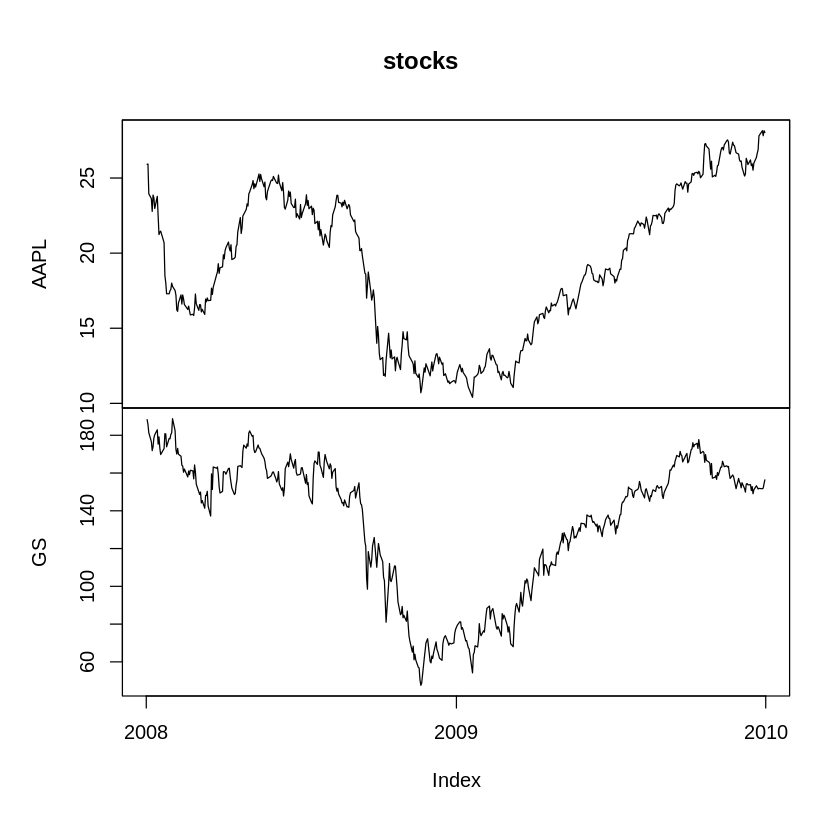

In [ ]:
# Extract AAPL and GS in 2008-09 and assign to stocks
stocks <- DJ_const["2008/2009", c("AAPL", "GS")]

# Plot stocks with plot.zoo()
plot.zoo(stocks)

***Excellent travail. Remarquez comment les données des deux sociétés sont tracées séparément.***

####**Exploration des données sur les facteurs de risque : taux de change**

+ ***Pour un portefeuille exposé au risque dans différents pays, il est nécessaire de considérer le risque provenant des taux de change (FX). Le package qrmdata comprend des données sur les taux de change pour de nombreuses devises, allant du franc suisse au yen japonais, par rapport à l'USD (dollar américain) et au GBP (livre britannique).***

+ *Dans cet exercice, vous examinerez les ensembles de données "EUR_USD" et "GBP_USD", qui contiennent les taux de change de l'euro et de la livre sterling par rapport au dollar américain. Ensuite, vous fusionnerez ces séries chronologiques et les tracerez ensemble pour la période 2010-2015.*

####**Instructions**

+ Chargez les données de change "GBP_USD" et "EUR_USD" depuis qrmdata.
+ Utilisez plot() pour tracer chaque taux de change séparément.
+ Utilisez plot() et l'inverse de GBP_USD pour tracer un taux de change entre le dollar américain et la livre sterling.
+ Utilisez merge() pour fusionner les données GBP_USD et EUR_USD, dans cet ordre, en tant qu'objet fx.
+ Extrayez les taux de change pour 2010-15 de fx et attribuez-les à fx0015.
+ Tracez fx0015 en utilisant plot.zoo().

In [ ]:
# Load exchange rate data
data("GBP_USD")
data("EUR_USD")

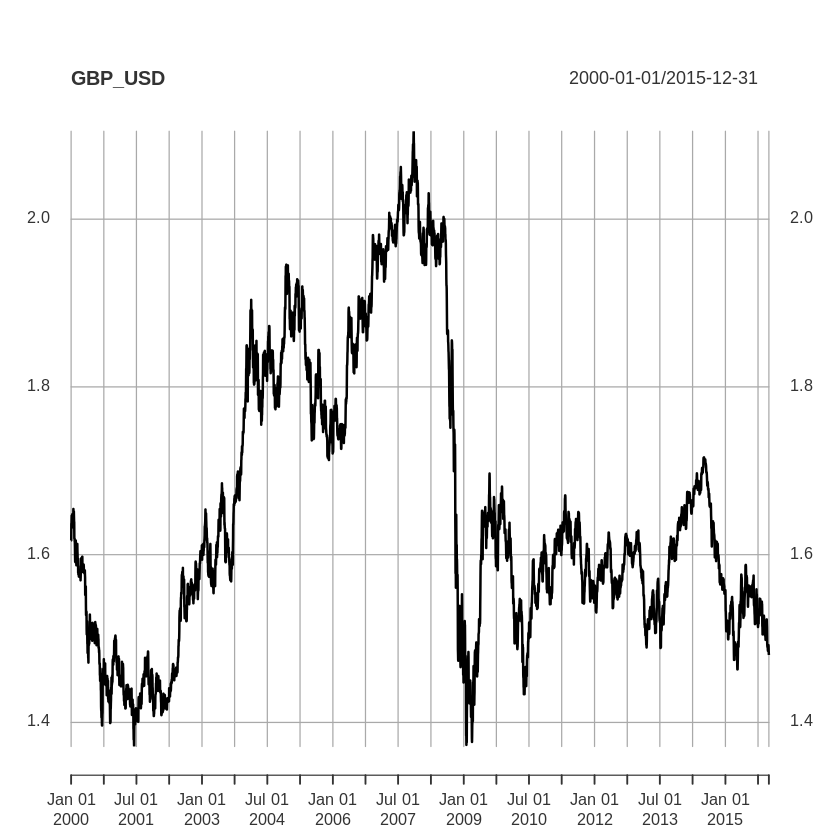

In [ ]:
# Plot the two exchange rates
plot(GBP_USD)

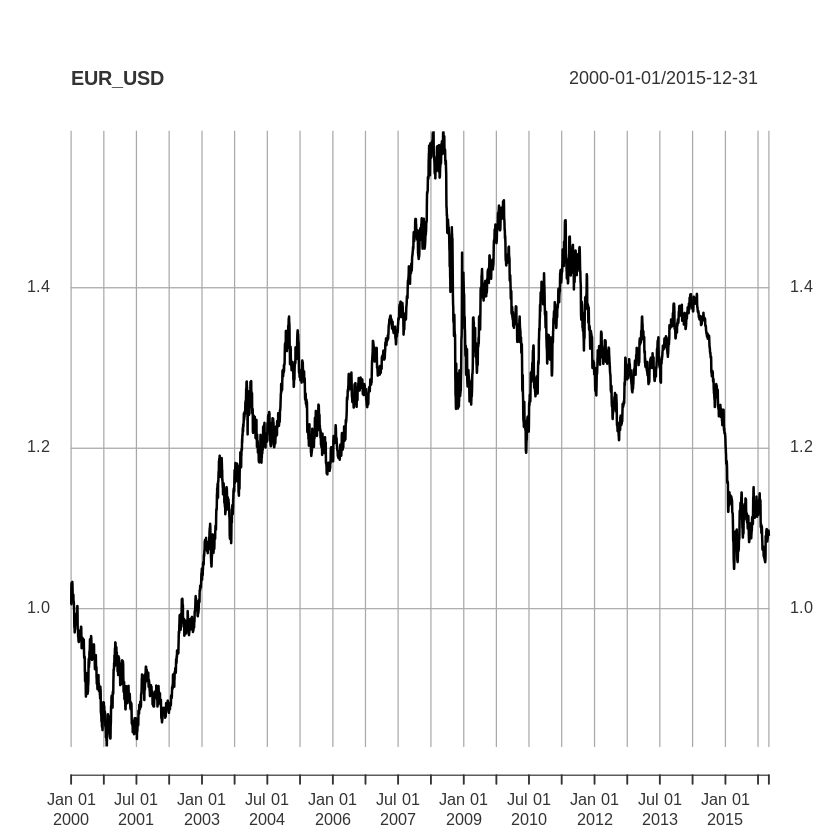

In [ ]:
plot(EUR_USD)

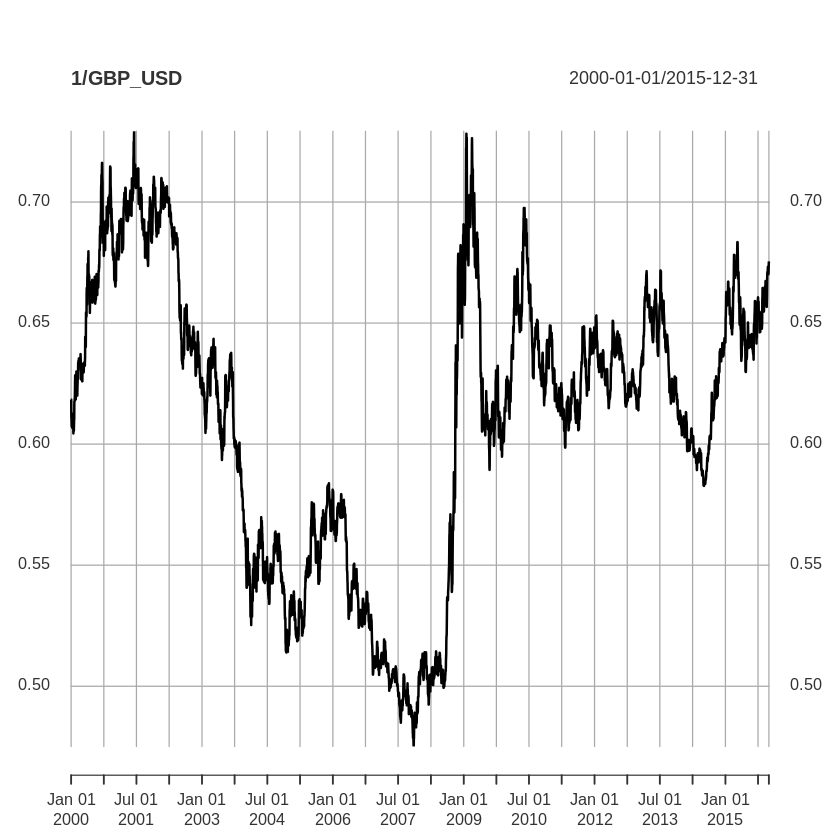

In [ ]:
# Plot a USD_GBP exchange rate
plot(1/GBP_USD)

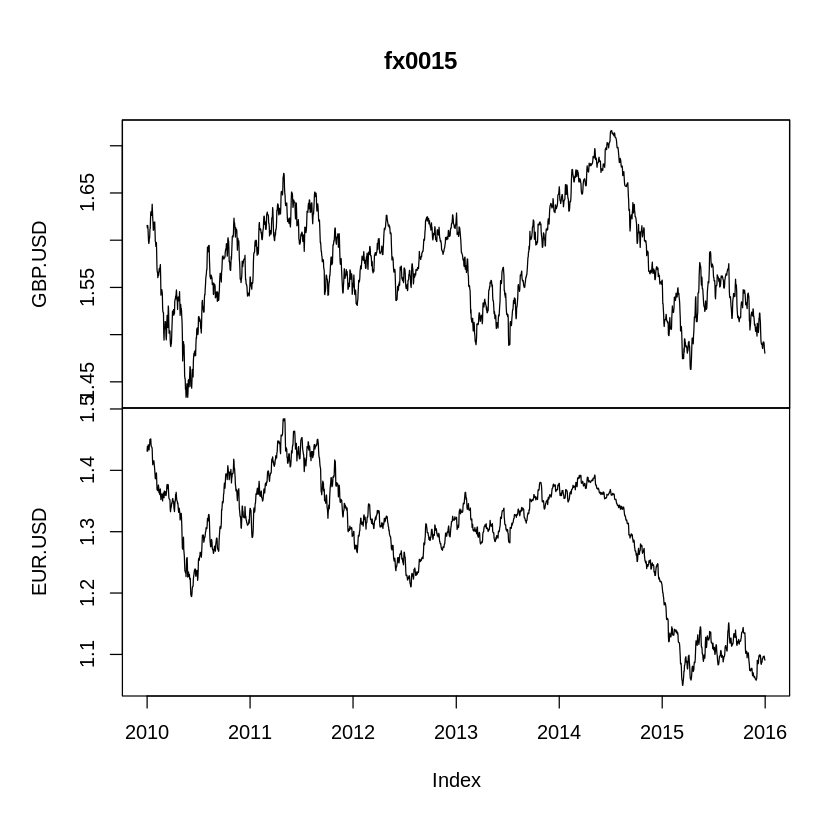

In [ ]:
# Merge the two exchange rates GBP_USD and EUR_USD
fx <- merge(GBP_USD, EUR_USD, all = TRUE)

# Extract 2010-15 data from fx and assign to fx0015
fx0015 <- fx["2010/2015"]

# Plot the exchange rates in fx0015
plot.zoo(fx0015)

***Bon travail! Notez que la fusion des données EUR_USD et GBP_USD, dans cet ordre, aurait produit un objet différent de fx.***

###**Rendements des facteurs de risque**

####**1. Rendements des facteurs de risque**
+ ***Dans QRM, l’objectif est de modéliser les fluctuations des principaux facteurs de risque qui affectent la valeur d’un portefeuille.***

####**2. Rendements des facteurs de risque**

+ **Ces fluctuations sont appelées les changements de facteurs de risque ou les rendements des facteurs de risque ou simplement les rendements.** 

+ Cependant, il existe plusieurs façons de définir les rendements. 

+ Soit $(Z_t)$ une série chronologique contenant les valeurs d’un facteur de risque à la fois à un ensemble de temps régulièrement espacés, ce qui pourrait représenter des jours, des semaines, des mois, etc. 

+ À titre d’illustration, supposons qu’il s’agisse d’une série quotidienne. 

+ Voici trois façons différentes de définir les rendements des facteurs de risque $(X_t)$ : 

  + **Dans la première définition, les rendements sont les différences des valeurs des facteurs de risque, appelées rendements simples**. 
  + C’est la définition la plus simple mais pas la plus courante. Il a tendance à être utilisé lorsque les facteurs de risque ont de très petites valeurs proches de zéro (comme certaines séries de taux d’intérêt). 
  
  + **La deuxième définition est la plus facile à interpréter. Les rendements relatifs sont les différences divisées par les valeurs initiales.** 
  
+ Si vous multipliez les rendements relatifs par cent, vous obtenez des variations en pourcentage. 

+ Donc, si une action a un rendement relatif de point zéro deux, elle gagne 2% en valeur; S’il a un rendement relatif de moins le point zéro trois, il perd 3% en valeur. 

  + **Dans la troisième définition, les rendements sont les différences entre les valeurs logarithmiques des facteurs de risque; Ce sont des retours de log. Cette définition est, en fait, la plus largement utilisée. Voici quelques-unes des raisons pour lesquelles les retours de journaux sont populaires.**

####**3. Propriétés des retours de journaux**

+ Si vous construisez un modèle pour les rendements logarithmiques d’un facteur de risque, vous savez que le facteur de risque ne peut jamais devenir négatif. 

+ Il s’agit généralement d’une caractéristique souhaitable pour les facteurs de risque que sont les prix et les taux. 

+ Cependant, certains facteurs de risque peuvent devenir négatifs dans des conditions de marché inhabituelles, par exemple les taux d’intérêt à court terme.

+  Les retours logarithmiques sont, en fait, très proches des rendements relatifs pour les valeurs typiques. 

+ On peut montrer avec une certaine algèbre que le logarithme de $Z_t$ moins logarithme de $Z_{t-1}$ peut être approximé par $Z_t$ moins $Z_{t-1}$ divisé par $Z_{t-1}$ 

+ Enfin, il existe quelques raisons théoriques d’utiliser les log-returns : 
  + Il est particulièrement facile de les agréger pour calculer des rendements à intervalles plus longs, tels que les rendements hebdomadaires ou mensuels, comme nous le verrons plus loin dans ce chapitre. 
  
  + En outre, il existe un modèle très célèbre pour les prix connu sous le nom de modèle **Black-Scholes-Merton, ou mouvement brownien géométrique (GBM)**. Le modèle est largement utilisé pour la tarification des produits dérivés. Si une série de prix suit GBM, les log-returns seront normalement distribués. C’est tout ce que vous devez vraiment savoir sur ce modèle à ce stade.

####**4. Retours de journaux dans R
+ Il convient toutefois de noter que vous constaterez que les rendements logarithmiques ne sont généralement pas distribués dans la pratique, du moins pour de courts horizons temporels. 

+ Pour calculer les log-returns de l’indice S&P 500, vous appliquez successivement les fonctions log et diff. 

+ Diff calcule les différences. 

+ Voici un code à illustrer. 

+ Notez que vous obtenez un NA en première position lorsque vous appliquez ces opérations. 

+ Il est préférable de supprimer la première valeur avant d’utiliser la série de retour.

####**5. Retours de journal dans R (2)**
+ Allons maintenant tracer les retours de journal. 

+ Vous voyez, une série assez bruyante oscillant principalement entre moins le point zéro cinq et plus le point zéro cinq, ce qui peut être interprété approximativement comme des mouvements de 5% de haut en bas. Cependant, il y a des valeurs très extrêmes. 

+ Le rendement négatif le plus important correspond au fameux krach boursier du lundi noir de 1987.

####**6. Entraînons-nous!**
+ Maintenant, c’est à votre tour de calculer et de tracer certains rendements dans les prochains exercices.

###**EXERCICES**

####**Explorer les séries de retour**


+ ***Pour analyser le risque, la tâche principale est de modéliser les fluctuations des prix et des taux sur différentes périodes de temps ; ces fluctuations sont appelées rendements. Pour calculer les log-returns de l'indice boursier FTSE et les affecter à ftse_x, appliquez successivement les fonctions log() et diff() :***

      > ftse_x <- diff(log(FTSE))


+ **Comme vous l'avez vu dans la vidéo, différencier de cette manière donnera toujours un NA en première position de la série temporelle, qui peut ensuite être supprimé avec diff(log(FTSE))[-1]. Cependant, vous n'aurez pas besoin de le faire dans le cours, sauf si cela est spécifié dans les instructions.**

+ *Dans cet exercice, vous allez calculer et tracer des séries de rendements logarithmiques pour les facteurs de risque liés aux actions et au change que vous avez rencontrés précédemment. Les jeux de données dj0809, djstocks et GBP_USD ont été préchargés dans votre espace de travail.*

####**Instructions**

+ Calculez les retours de journal de l'index DJ dans dj0809 et affectez-les à l'objet dj0809_x.

+ Tracez la série de retour dj0809_x.

+ Calculez les retours logarithmiques de tous les prix des actions dans djstocks et affectez-les à djstocks_x.

+ Tracez les retours de partage djstocks_x. Notez que djstocks_x contient plusieurs séries chronologiques.

+ Calculez les retours logarithmiques de la série de taux de change GBP_USD et attribuez-les à erate_x.

+ Tracez la série de retour erate_x.

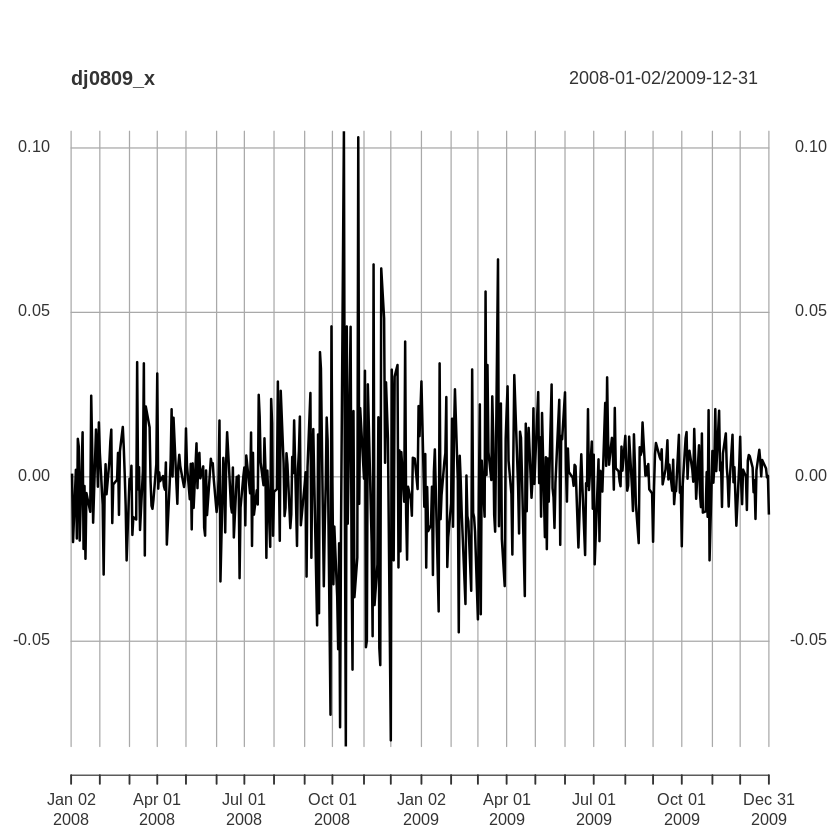

In [ ]:
# Compute the log-returns of dj0809 and assign to dj0809_x
dj0809_x <- diff(log(dj0809))

# Plot the log-returns
plot(dj0809_x)

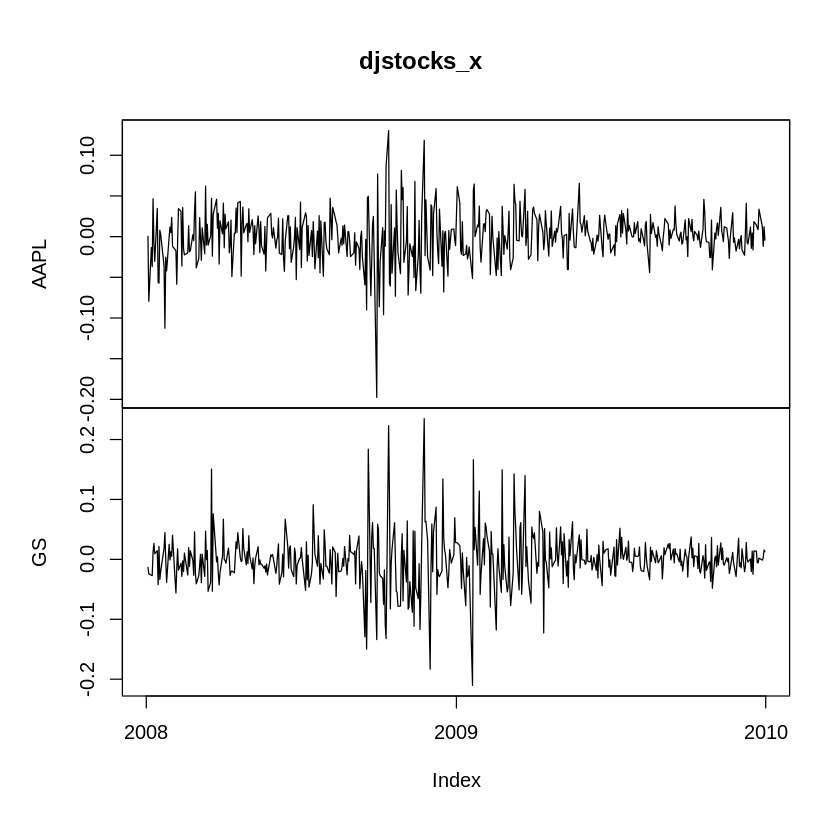

In [ ]:
# Compute the log-returns of djstocks and assign to djstocks_x
djstocks <- DJ_const["2008/2009", c("AAPL", "GS")]
djstocks_x <- diff(log(djstocks))

# Plot the two share returns
plot.zoo(djstocks_x)

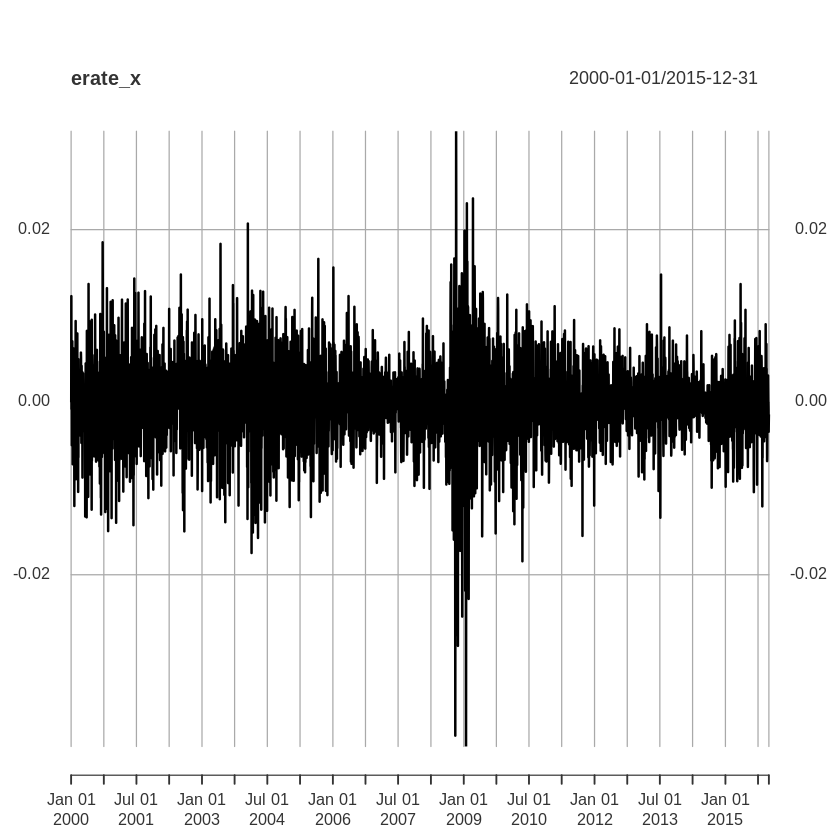

In [ ]:
# Compute the log-returns of GBP_USD and assign to erate_x
erate_x <- diff(log(GBP_USD))

# Plot the log-returns
plot(erate_x)

***Bien joué! Les séries de retour ressemblent souvent à du bruit avec certaines périodes de fluctuations plus importantes. Vous découvrirez plus tard qu'ils ont généralement une structure intéressante.***

####**Différentes manières de tracer les séries de facteurs de risque et de rendement**

+ ***Vous savez déjà que vous pouvez utiliser plot.zoo() pour tracer plusieurs séries temporelles. Pour des données de série chronologique à quatre dimensions, l'appel plot.zoo(data) crée quatre tracés distincts par défaut, sauf si vous incluez le paramètre plot.type = "single" pour tracer les quatre séries dans un seul tracé. Vous pouvez également ajouter encore plus de paramètres tels que col pour spécifier différentes couleurs et type = "h" pour obtenir des barres verticales au lieu de joindre des points, ce qui peut parfois être une meilleure façon d'afficher les retours.***

      plot.zoo(x, plot.type, col = 1, type = "l", ...)

+ *Dans cet exercice, vous allez explorer la fonction plot.zoo() pour tracer les données des facteurs de risque des actions et les rendements correspondants de différentes manières. Les séries temporelles multivariées djstocks et DJ_const sont disponibles dans votre espace de travail.*

####**Instructions**

+ Parcelle djstocks dans quatre parcelles distinctes.
Tracez les djstocks dans un seul tracé dans les couleurs 1 à 4. 
+ Le code pour créer une légende appropriée pour le tracé est fourni.

+ Calculez les log-returns de djstocks et affectez-les à djstocks_x.

+ Tracez djstocks_x dans quatre parcelles distinctes.

+ Tracez djstocks_x dans quatre tracés séparés avec des barres verticales.

In [ ]:
djstocks <- DJ_const["2008/2009", c("AAPL", "AXP", "BA", "CAT")]

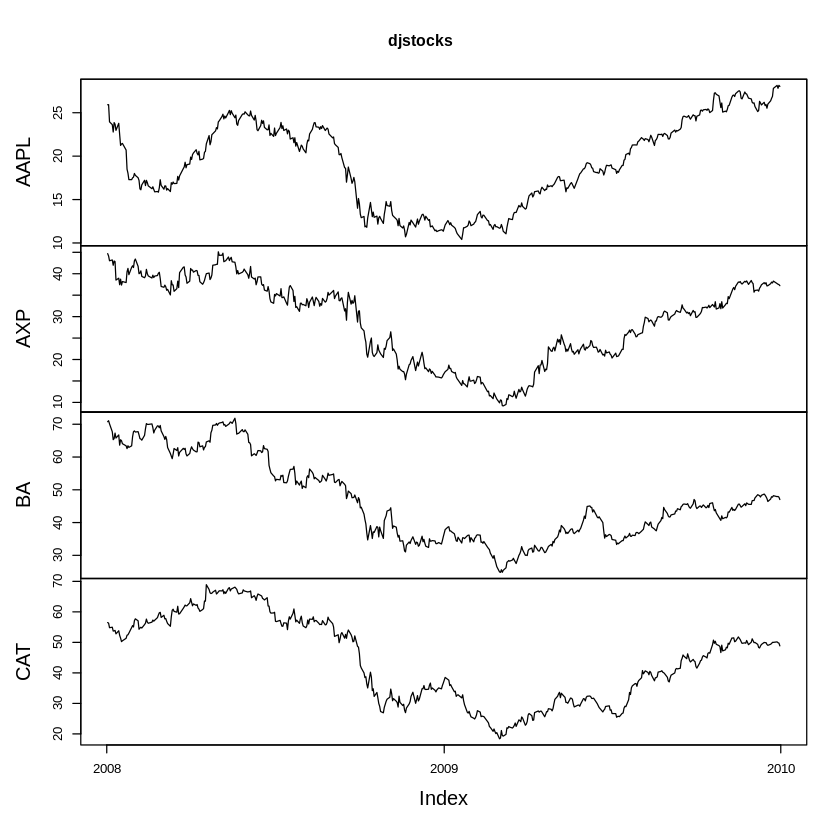

In [ ]:
# Plot djstocks in four separate plots
plot.zoo(djstocks)

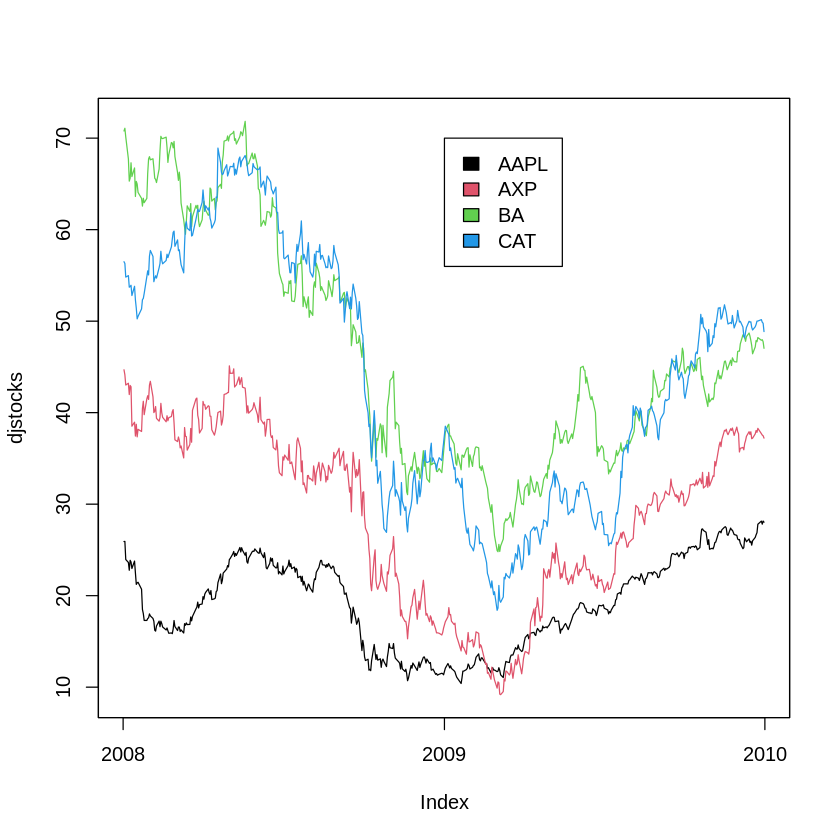

In [ ]:
# Plot djstocks in one plot and add legend
plot.zoo(djstocks, plot.type = "single", col = c(1:4))
legend(julian(x = as.Date("2009-01-01")), y = 70, legend = names(DJ_const)[1:4], fill = 1:4)

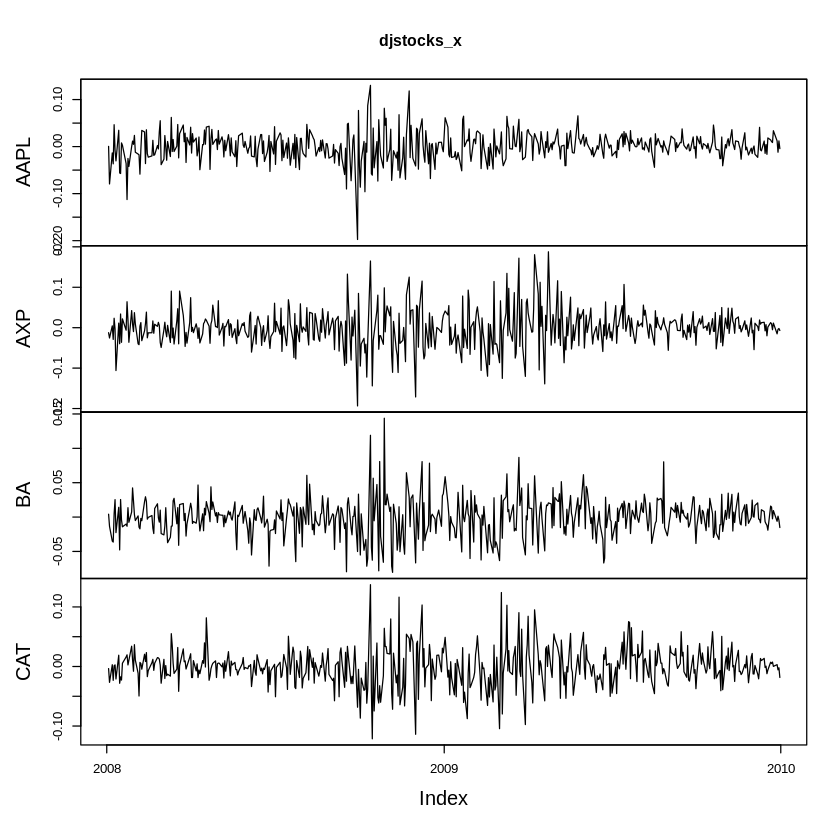

In [ ]:
# Compute log-returns and assign to djstocks_x
djstocks_x <- diff(log(djstocks))

# Plot djstocks_x in four separate plots
plot.zoo(djstocks_x)

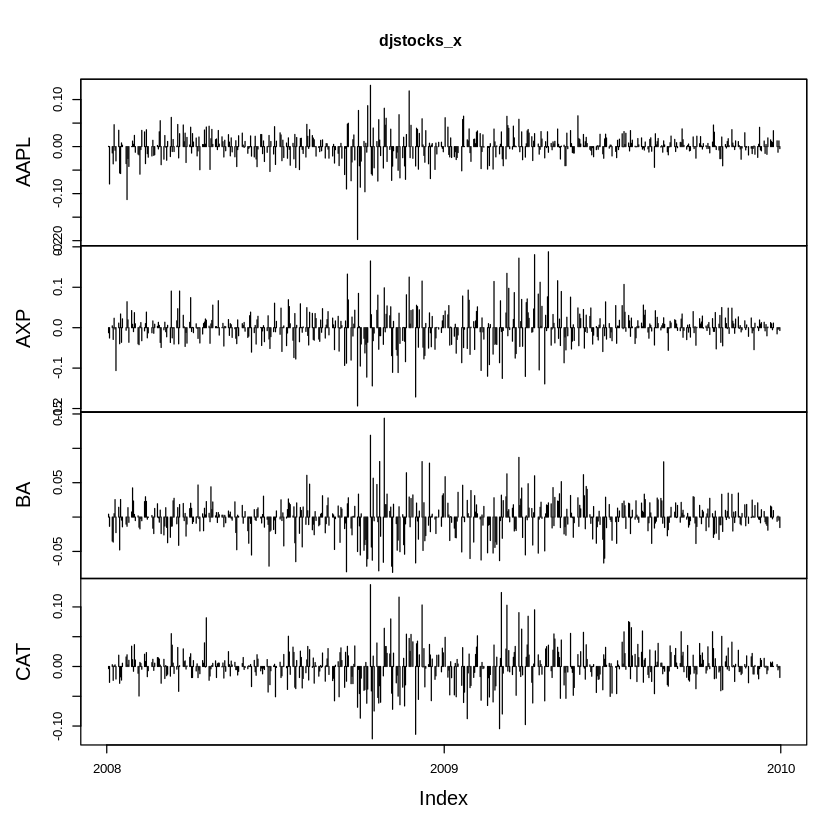

In [ ]:
# Plot djstocks_x with vertical bars
plot.zoo(djstocks_x, type = "h")

***Belles parcelles ! Notez qu'à la fin de 2008, il y avait de gros rendements pour toutes les séries. C'était le paroxysme de la crise financière.***

###**Agrégation des retours de journaux**

####**1. Agrégation des retours de journaux**
####**2. Agrégation des retours de journaux**

+ J’ai déjà fait remarquer qu’il est facile d’agréger des retours de journaux à intervalles plus courts comme les retours quotidiens pour obtenir des rendements à intervalles plus longs comme les rendements hebdomadaires ou mensuels. 

+ En fait, il suffit de les additionner! Pourquoi voudriez-vous faire cela? 

+ Eh bien, en agrégeant les rendements, vous pouvez étudier les risques sur des horizons temporels plus longs, tels qu’un mois, un trimestre ou une année. 

+ Il y a quelques mathématiques simples derrière l’agrégation des log-returns. 

+ Supposons que les séries $(X_t)$ sont des rendements logarithmiques quotidiens calculés à partir des valeurs quotidiennes des facteurs de risque $(Z_t)$. 

+ *Supposons en outre que $(Z_t)$ est une série de prix pour un actif qui est négocié en semaine. Pour obtenir le log-return pour toute une semaine de trading commençant le jour $t$ (effectivement le prix du vendredi soir précédent avant l’ouverture des marchés le lundi matin) et se terminant le jour $t+5$ (vendredi soir à nouveau), vous devez calculer la différence $log(Z_{t+5}) - log(Z_t$). On peut montrer qu’il ne s’agit que de la somme des log-returns pour chacun des jours de trading. Et un calcul similaire fonctionne pour n’importe quelle période d’agrégation.*

####**3. Agrégation des log-returns dans R**
+ Pour ce faire dans R, vous pouvez utiliser un ensemble de fonctions dans le package xts avec des noms tels que apply weekly et apply monthly. 

+ Si l’objet sp500x est un objet xts contient des retours journaliers quotidiens, vous obtenez des retours hebdomadaires en appliquant la fonction somme dans la fonction apply week. 

+ Notez que les déclarations ont maintenant des timbres dateurs espacés de sept jours. 

+ De même, pour obtenir des rendements mensuels, vous appliquez la fonction somme dans la fonction appliquer mensuellement. Maintenant, les timbres dateurs sont les derniers jours de chaque mois civil. 

+ Notez que si vous avez une série chronologique multivariée contenant, par exemple, plusieurs cours boursiers, vous devez appliquer la fonction colSums() au lieu de sum(). Cherchez un exemple de cela à la fin du prochain exercice.

####**4. Entraînons-nous!**
+ Il est donc maintenant temps de s’entraîner à agréger les séries log-retour.

###**EXERCICES**

####**Agrégation de séries de retours de journaux**
+ ***En statistique, les données agrégées sont des données combinées à partir de plusieurs mesures. Vous venez d'apprendre que vous pouvez calculer les retours de journaux hebdomadaires, mensuels et trimestriels en additionnant les retours de journaux quotidiens avec les fonctions correspondantes apply.weekly(), apply.monthly() et apply.quarterly().***

+ **Par exemple, vous pouvez utiliser le code suivant pour former les rendements trimestriels d'une série chronologique de données univariées et d'une série chronologique multivariée mv_data :**

        > # apply.quarterly(x, FUN, ...)
        > data_q = apply.quarterly(data, sum)
        > mv_data_q = apply.quarterly(mv_data, colSums)

+ *Dans cet exercice, vous vous entraînerez à agréger des données de séries chronologiques à l'aide de ces fonctions et à tracer les résultats. Les données DJ et DJ_const sont disponibles dans votre espace de travail, tout comme les objets djx, qui contiennent les log-returns quotidiens de l'indice Dow Jones de 2000 à 2015, et djreturns, qui contient les log-returns quotidiens des quatre premières actions DJ_const de 2000-2015. Utilisez plot pour les séries chronologiques univariées et plot.zoo pour les séries chronologiques multivariées.*

####**Instructions**

+ Tracez l'objet djx.
+ Sur une ligne, tracez les log-retours hebdomadaires de djx avec des barres verticales.
+ Tracez les log-returns mensuels de djx avec des barres verticales.
+ Tracez l'objet djreturns en utilisant plot.zoo.
+ Tracez les retours de journaux mensuels pour les retours dj avec des barres verticales à l'aide de plot.zoo.

In [ ]:
dj <- DJ["2000/2015"]
djx <- diff(log(dj))
djstocks <- DJ_const["2000/2015",c("AAPL", "AXP", "BA", "CAT")]
djreturns <- diff(log(djstocks))

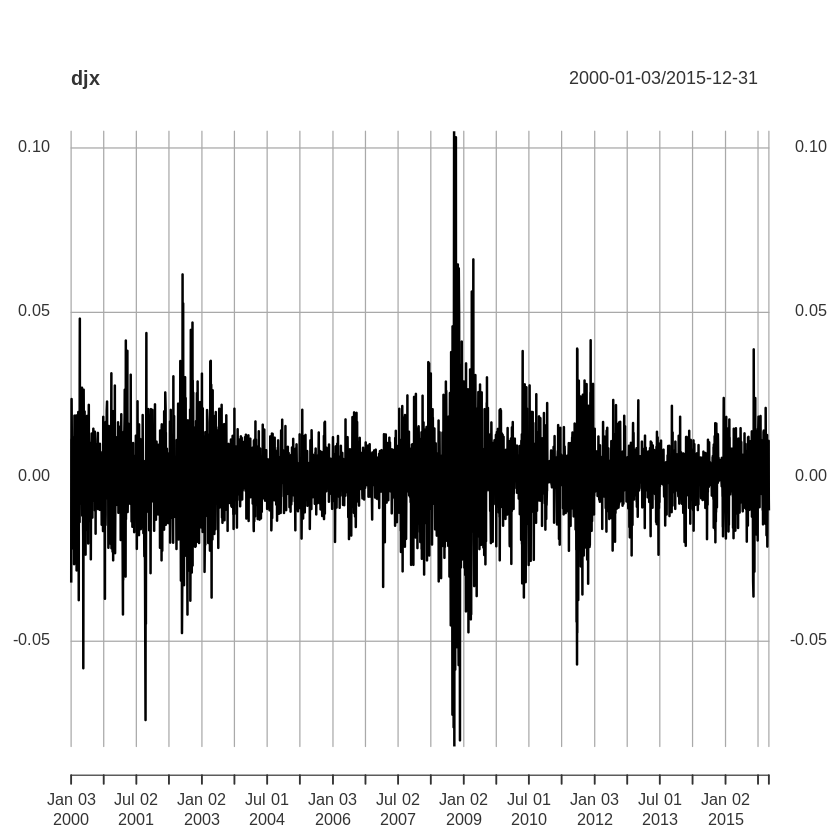

In [ ]:
# Plot djx
plot(djx)

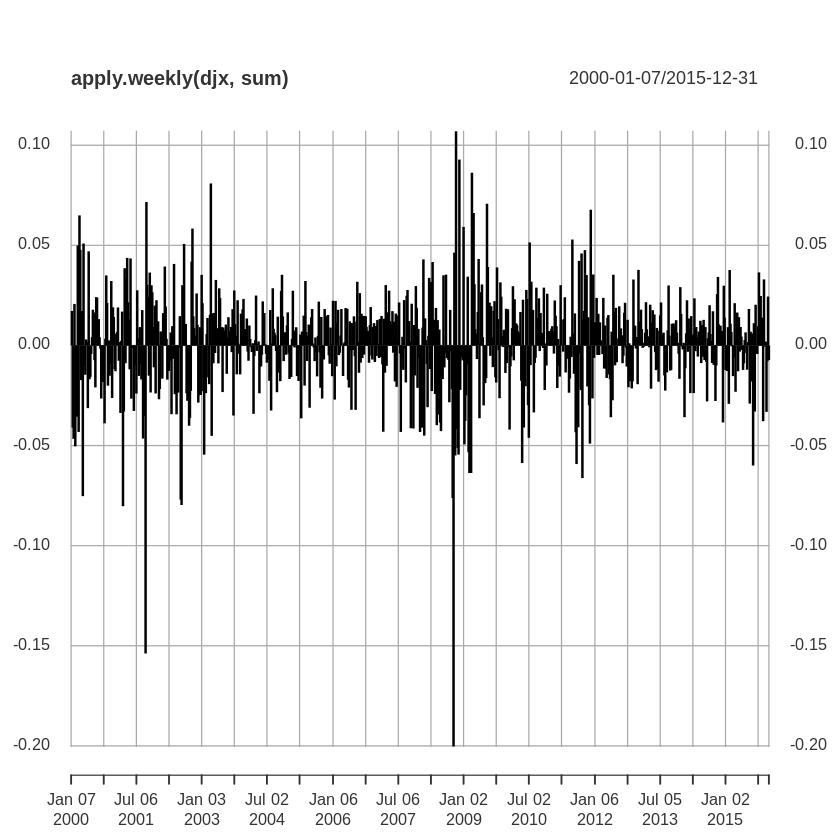

In [ ]:
# Plot weekly log-returns of djx
plot(apply.weekly(djx, sum), type = 'h')

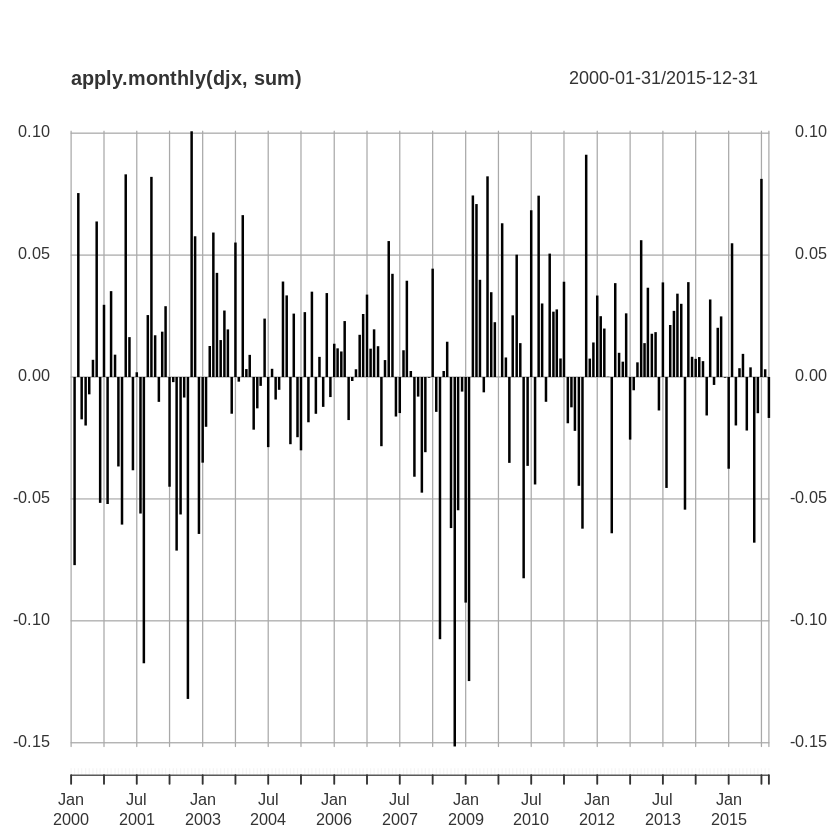

In [ ]:
# Plot monthly log-returns of djx
plot(apply.monthly(djx, sum), type = "h")

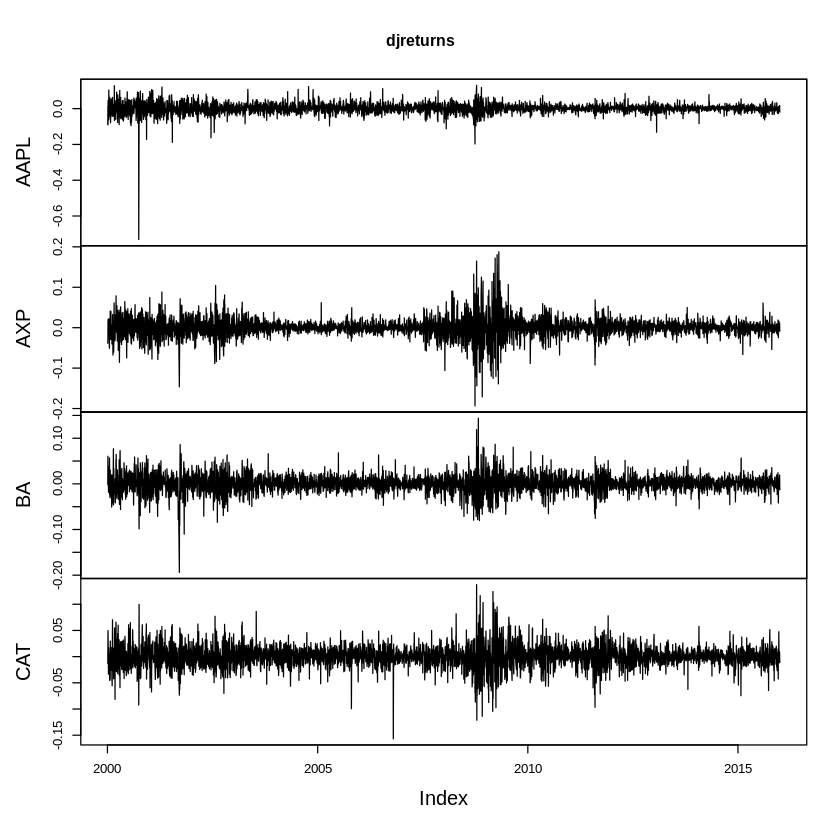

In [ ]:
# Plot djreturns
plot.zoo(djreturns)

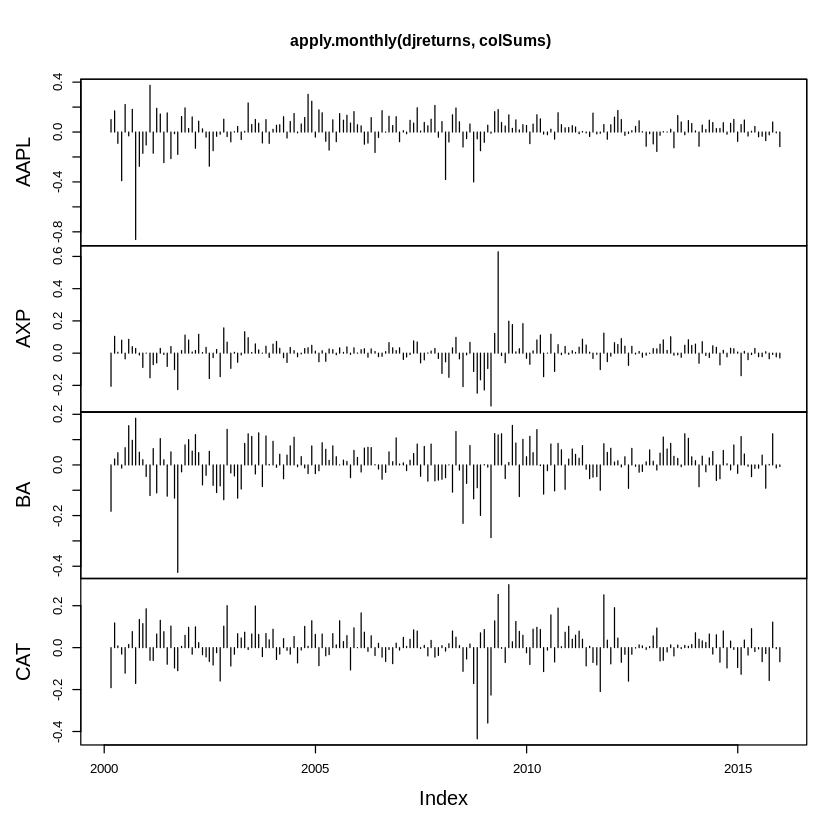

In [ ]:
# Plot monthly log-returns of djreturns
plot.zoo(apply.monthly(djreturns, colSums), type = "h")

***Excellent travail! Ces fonctions d'agrégation sont extrêmement utiles pour analyser les risques sur des horizons temporels plus longs.***

####**Un test sur l'agrégation des log-returns**
+ ***Les scientifiques des données utilisent souvent les agrégations que vous avez apprises jusqu'à présent en combinaison avec des statistiques récapitulatives pour extraire encore plus d'informations à partir des données. Les fonctions qui calculent les statistiques récapitulatives incluent mean(), median() et var().***

+ *L'objet sp contient les log-returns quotidiens de l'indice S&P 500 pour la période 1960-2015 ; il est chargé dans votre espace de travail. À trois décimales, quel est le log-rendement trimestriel moyen du S&P 500 de 1990 à 2010 ?*

#####**Instructions**


+ 0,054

+ ***0,015***

+ -0,026

+ 0,116

+ 0,005

In [ ]:
data("SP500")
sp <- SP500["1990/2010"]
sp <- diff(log(sp))[-1]
mean(apply.quarterly(sp, sum))

[1] 0.01490178

###**Explorer d’autres types de facteurs de risque**

####**1. Explorer d’autres types de facteurs de risque**

+ ***J’espère que vous comprenez maintenant comment explorer les séries chronologiques sur les facteurs de risque.***

####**2. Explorer d’autres types de facteurs de risque**

+ En particulier, vous devez être à l’aise avec le calcul des log-rendements, qui sont les principaux types de données que nous modélisons dans les applications de gestion quantitative des risques de marché. 

+ Et vous devez être à l’aise avec l’agrégation des retours de journaux en les additionnant pour obtenir des retours de journaux à intervalles plus longs. 

+ Par exemple, agréger les retours de journaux quotidiens pour obtenir des retours de journaux hebdomadaires, mensuels et trimestriels. 

+ Jusqu’à présent, vous avez examiné les données sur les actions, tant les indices que les actions individuelles, et vous avez examiné les données sur les taux de change ou les devises. Pour conclure le premier chapitre, vous allez examiner deux autres types de données : 
  + les prix des matières premières et les rendements obligataires à coupon zéro.

####**3. Données sur les produits de base et les taux d’intérêt**

+ Premières données sur les produits de base. 
+ Imaginez que vous investissez dans l’or ou le pétrole. + Comment se comportent les facteurs de risque de prix de ces produits de base?
+ Sont-ils similaires aux actions ou y a-t-il des différences? Supposons maintenant que vous investissiez dans des titres à revenu fixe comme des obligations d’État ou des bons du Trésor. 
+ Le type d’obligation le plus simple à analyser s’appelle une obligation à coupon zéro. Il s’agit d’une obligation qui verse un montant fixe à une date future connue sous le nom d’échéance, mais qui ne paie aucun revenu d’intérêts intermédiaire.

####**4. Prix des obligations**
+ Soit $p(t,T)$ le prix au temps petit $t$ d’une obligation à coupon zéro payant une unité au capital de temps $T$. 
+ Big $T$ est la maturité de l’obligation. 
+ C’est le moment où l’investisseur obligataire récupère son argent. 
+ $p(0, 10)$ est le prix au temps 0 d’une obligation venant à échéance dans 10 ans, ou d’une obligation à 10 ans. $p(0, 5)$ est le prix au temps 0 d’une obligation à 5 ans. $p(5, 10)$ est le prix d’une obligation à 10 ans après cinq ans.

####**5. Les rendements comme facteurs de risque**

+ Plutôt que de prendre le prix de l’obligation à coupon zéro comme facteur de risque, il est assez courant de prendre le facteur de risque comme le soi-disant rendement. 

+ Le rendement $y(t, T)$ est défini par l’équation simple donnée sur la lame. 

+ C’est une mesure du taux de rendement par unité de temps. 

+ $y(t, 10)$ donne le rendement pour un investisseur qui achète une obligation à 10 ans au temps $t$. 

+ $y(t, 5)$ est le rendement pour un investisseur qui achète une obligation à 5 ans au temps $t$. 

+ La principale raison pour laquelle les rendements sont préférés aux prix est qu’ils sont comparables entre différentes échéances $T$. 

+ Vous pouvez comparer directement les taux de rendement des investisseurs qui investissent dans des obligations à 5 ans et des obligations à 10 ans en comparant leurs rendements $y(t,5$) et $y(t,10)$. 

+ L’ensemble des rendements $y(t,T)$ pour le petit t fixe et le capital variable $T$ est connu sous le nom de courbe de rendement à l’instant $t$ et est dit décrire la structure des termes des taux d’intérêt. 

+ Si vous considérez les facteurs de risque comme étant les rendements, la question se pose de savoir si vous devez analyser les rendements logarithmiques ou les rendements simples. 
+ Dans un environnement de taux d’intérêt bas et un environnement où les taux peuvent devenir négatifs, il existe des arguments en faveur de l’utilisation de rendements simples.

####**6. Entraînons-nous!**
+ Alors maintenant, vous allez essayer quelques exercices sur les matières premières et les rendements obligataires.

###**EXERCICES**

####µµDonnées sur les matières premièresµµ

+ ***La fonction de traçage pairs() crée un nuage de points par paires des composants d'une série chronologique multivariée à deux dimensions ou plus. Il est utilisé sur un objet zoo plutôt que sur un objet xts.***

+ **Une forme à peu près circulaire d'un nuage de points indique une faible corrélation entre les rendements logarithmiques de deux produits différents. De manière générale, une faible corrélation est bonne dans un portefeuille car elle implique que les actifs sont diversifiés. Une corrélation élevée, en revanche, représente un risque qui doit être correctement modélisé.**

+ *Dans cet exercice, vous examinerez les prix de l'or et du pétrole sur une période de 25 ans, calculerez leurs rendements logarithmiques quotidiens et mensuels et les tracerez. Les données or et pétrole, contenant les prix quotidiens de 1990 à 2015 de l'or et du pétrole brut Brent, respectivement, sont disponibles dans votre espace de travail.*

####**Instructions**

+ Utilisez plot() pour tracer séparément les séries chronologiques de l'or et du pétrole.
+ Calculez les rendements logarithmiques quotidiens de chaque produit et attribuez-les respectivement à l'orx et au pétrolex.
+ Calculez les rendements logarithmiques mensuels de chaque produit et attribuez-les à goldx_m et oilx_m, respectivement.
+ Utilisez merge() pour fusionner goldx_m et oilx_m, dans cet ordre, dans coms.
+ Plot coms, une série multivariée, avec des barres verticales.
+ Convertissez coms en objet zoo avec as.zoo() puis appliquez pairs() pour créer un nuage de points par paires.

In [ ]:
data("OIL_Brent")
oil <- OIL_Brent["1990/2015"]
data("GOLD")
gold <- GOLD["1990/2015"]

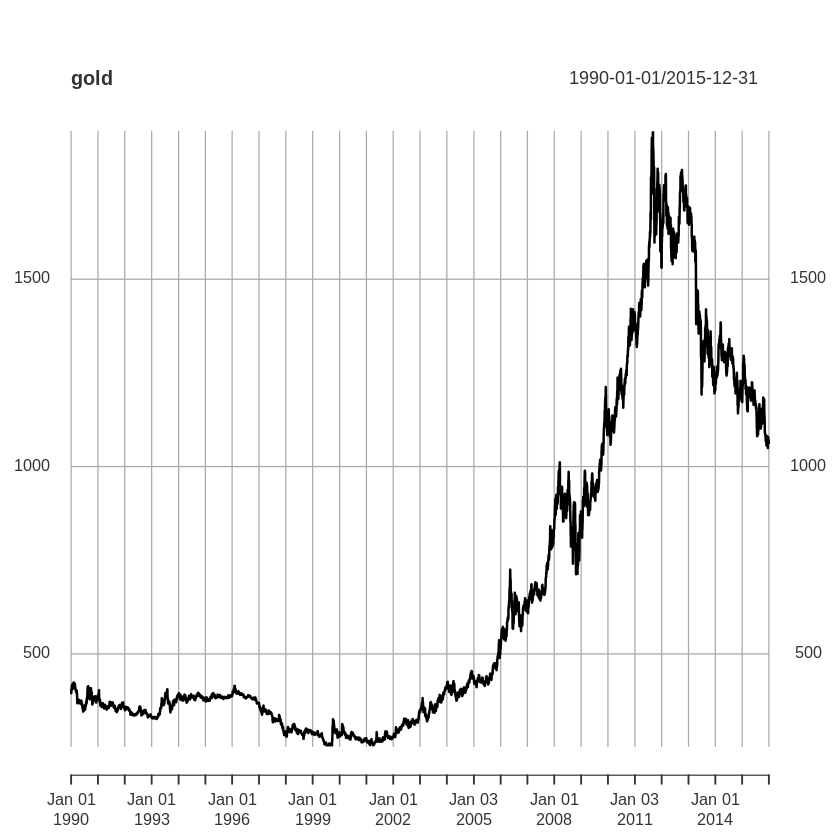

In [ ]:
# Plot gold and oil prices
plot(gold)

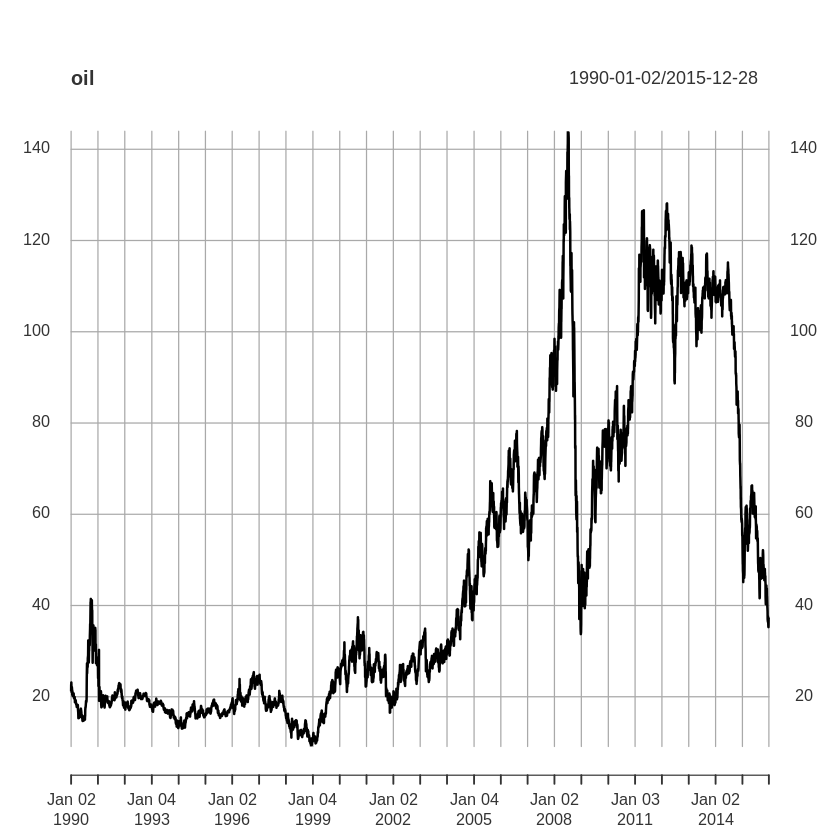

In [ ]:
plot(oil)

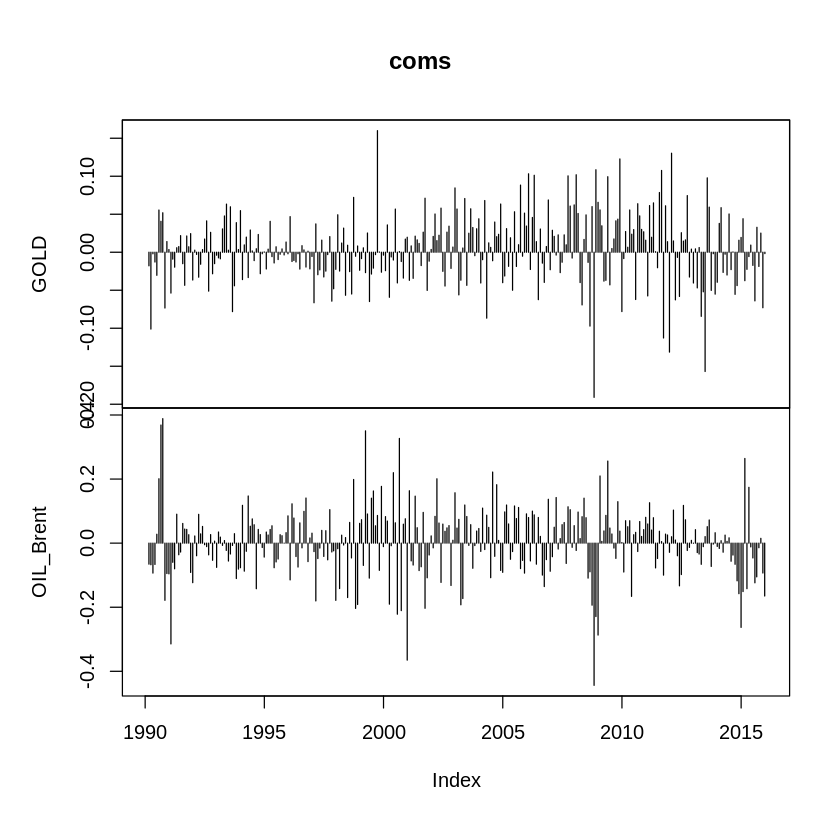

In [ ]:
# Calculate daily log-returns
goldx <- diff(log(gold))
oilx <- diff(log(oil))

# Calculate monthly log-returns
goldx_m <- apply.monthly(goldx, sum)
oilx_m <- apply.monthly(oilx, sum)

# Merge goldx_m and oilx_m into coms
coms <- merge(goldx_m, oilx_m)

# Plot coms with vertical bars
plot.zoo(coms, type = "h")

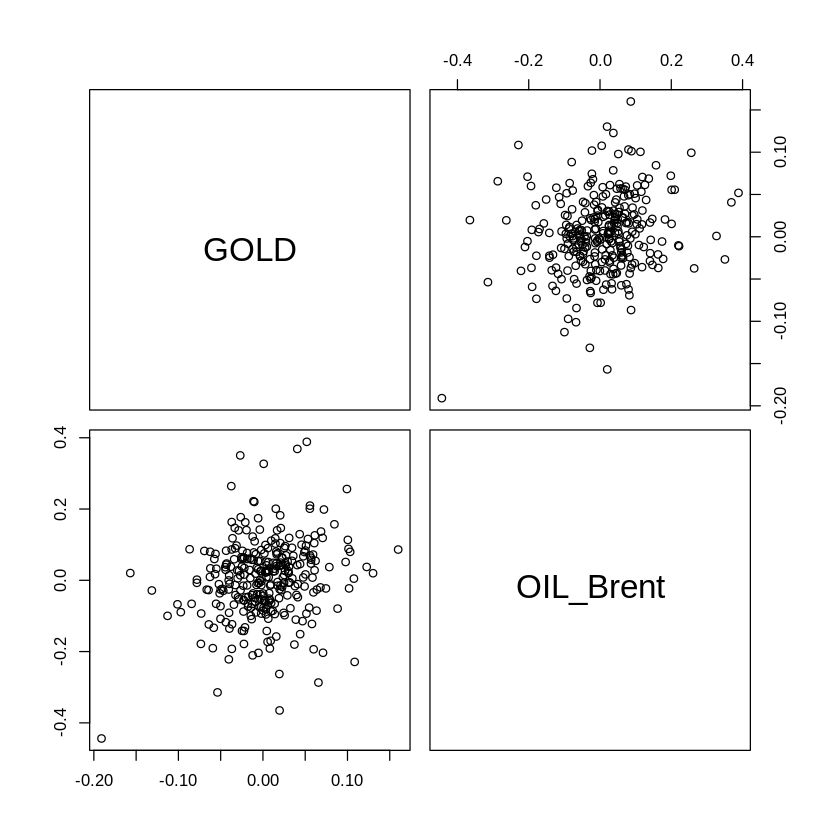

In [ ]:
# Make a pairwise scatterplot of coms
pairs(as.zoo(coms))

***Bien joué! Comme vous pouvez le constater, l'or et le pétrole sont des matières premières bien diversifiées.***

####**Données sur les taux d'intérêt**

+ ***L'objet zcb contient les valeurs quotidiennes des rendements des obligations à coupon zéro canadiennes, exprimées en pourcentage, pour la période 2006-2015. Les rendements sont le principal facteur de risque lorsqu'il s'agit d'analyser le risque de taux d'intérêt dans un portefeuille d'obligations ou d'autres produits à revenu fixe.***

+ **La meilleure façon de calculer les variations des facteurs de risque pour les rendements n'est pas si claire. Il est possible de calculer des retours logarithmiques, à condition que les rendements ne soient pas négatifs, et il est également possible de calculer des rendements simples. Pour calculer les rendements simples d'une série, utilisez uniquement diff() au lieu de diff() et log().**

+ *Dans cet exercice, vous allez tracer des séries chronologiques de rendements pour des durées fixes jusqu'à l'échéance et tracer les changements de facteurs de risque pour ces rendements. Vous tracerez également l'ensemble de la courbe de rendement à des dates particulières. Les données zcb ont été chargées dans votre espace de travail. Un vecteur yield_cols contenant les noms des colonnes correspondant aux maturités de 1, 5 et 10 ans a été créé. Un vecteur numérique de maturité contenant toutes les maturités en années a également été créé.*

####**Instructions**

+ Calculez les retours de journal de zcb comme zcb_x et les retours de journal simples comme zcb_x2.
+ Tracé zcb_x pour les échéances de 1, 5 et 10 ans dans un même tracé.
+ Tracez zcb_x2 pour les échéances de 1, 5 et 10 ans dans un même graphique.
+ Indexez zcb dans plot() pour tracer la courbe de rendement pour le premier jour en zcb.
+ Indexez zcb dans lines() pour ajouter une ligne à la courbe de rendement pour le dernier jour en zcb.

In [ ]:
data("ZCB_CAD")
zcb <- ZCB_CAD["2006/2015"]
maturity <- c(0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 
3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 
6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9, 9.25, 9.5, 
9.75, 10, 10.25, 10.5, 10.75, 11, 11.25, 11.5, 11.75, 12, 12.25, 
12.5, 12.75, 13, 13.25, 13.5, 13.75, 14, 14.25, 14.5, 14.75, 
15, 15.25, 15.5, 15.75, 16, 16.25, 16.5, 16.75, 17, 17.25, 17.5, 
17.75, 18, 18.25, 18.5, 18.75, 19, 19.25, 19.5, 19.75, 20, 20.25, 
20.5, 20.75, 21, 21.25, 21.5, 21.75, 22, 22.25, 22.5, 22.75, 
23, 23.25, 23.5, 23.75, 24, 24.25, 24.5, 24.75, 25, 25.25, 25.5, 
25.75, 26, 26.25, 26.5, 26.75, 27, 27.25, 27.5, 27.75, 28, 28.25, 
28.5, 28.75, 29, 29.25, 29.5, 29.75, 30)
yield_cols <- c("1.00y", "5.00y", "10.00y")

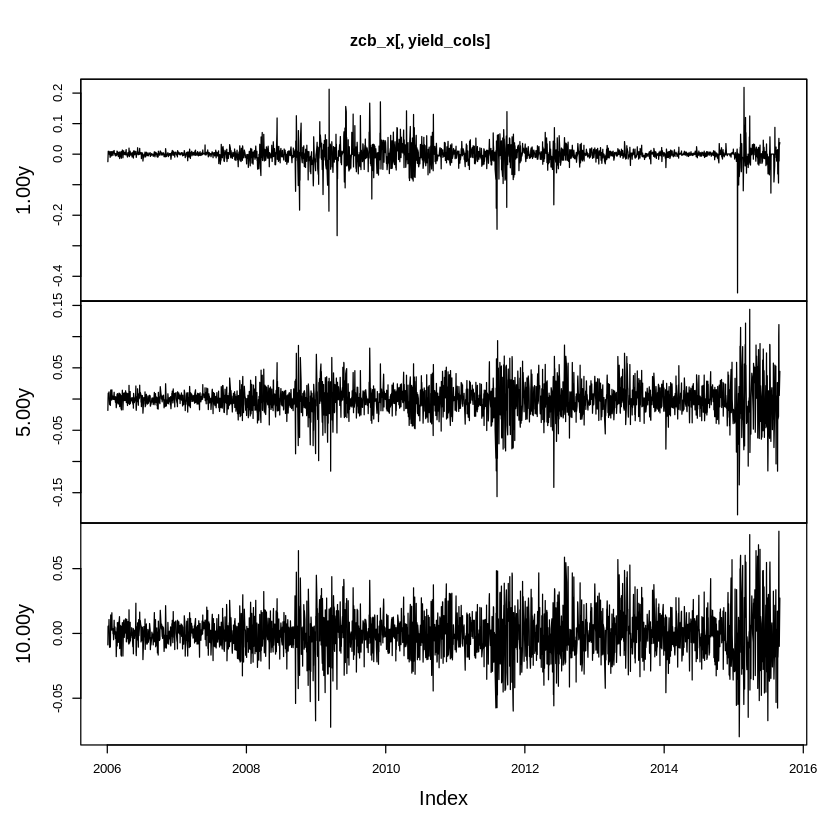

In [ ]:
# Compute log-returns as zcb_x and simple returns as zcb_x2
zcb_x <- diff(log(zcb))
zcb_x2 <- diff(zcb)

# Plot zcb_x for 1, 5 and 10-year maturities
plot.zoo(zcb_x[, yield_cols])

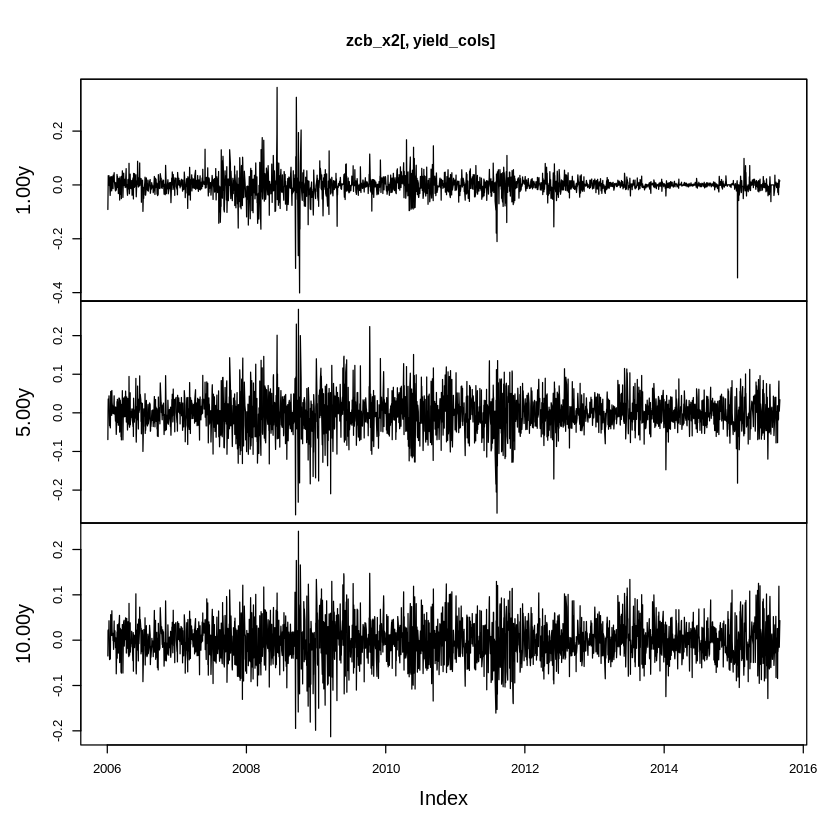

In [ ]:
# Plot zcb_x2 for 1, 5 and 10-year maturities
plot.zoo(zcb_x2[, yield_cols])

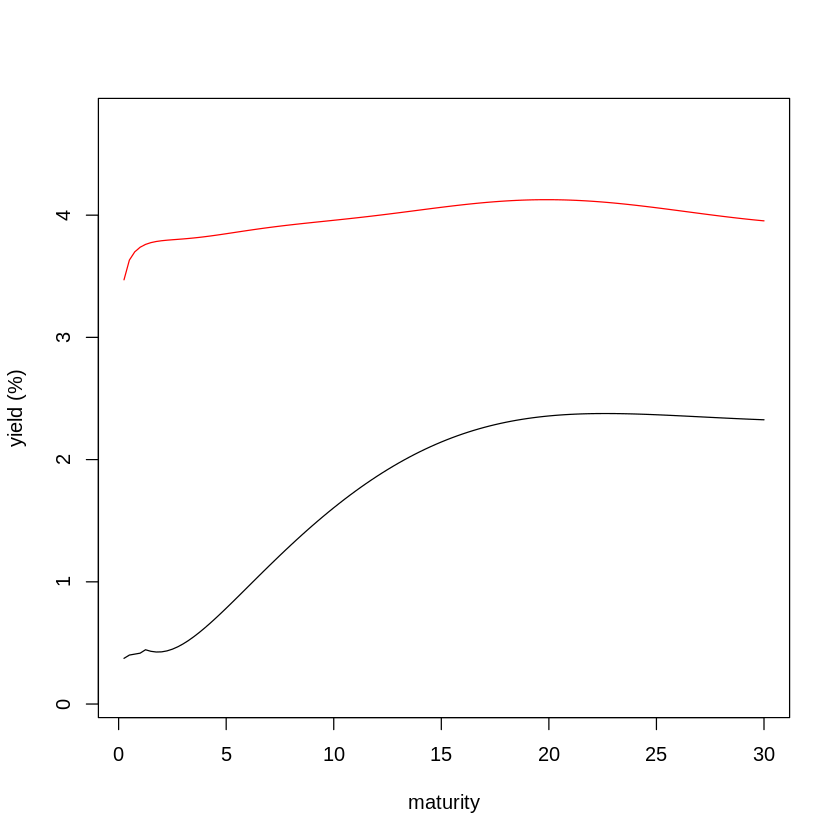

In [ ]:
# Plot the yield curve for the first day of zcb
plot(maturity, zcb[1,], ylim = range(zcb), type = "l", ylab = "yield (%)", col = "red")

# Add a line for the last day of zcb
lines(maturity, zcb[nrow(zcb),])

***Excellent travail! Les rendements peuvent sembler un peu difficiles à travailler au début, mais ils sont fondamentaux pour analyser les portefeuilles obligataires et de nombreux autres produits financiers qui dépendent des taux d'intérêt.***

###**La distribution normale**


####**1. La distribution normale**

+ ***J’ai mentionné plus tôt que le célèbre modèle de mouvement brownien géométrique Black-Scholes pour les prix des actifs. Ce modèle implique que les retours logarithmiques sur différentes périodes sont normalement distribués et indépendants.***

####**2. Définition de la normale**

+ La distribution normale est un modèle simple et traitable, et il serait certainement pratique que les retours logarithmiques soient normaux. 

+ Mais est-ce vraiment le cas pour les facteurs de risque typiques qui nous intéressent ? Dans ce chapitre, nous allons enquêter. 

+ Dans cette vidéo, je vais définir la distribution normale, mentionner quelques-unes de ses propriétés, puis discuter de l’estimation des distributions normales et des tests pour les distributions normales. 

+ On dit qu’une variable $X$ a une distribution normale si sa densité de probabilité prend une forme simple bien connue montrée sur la diapositive et connue de manière informelle sous le nom de courbe en cloche. Cela dépend de deux paramètres seulement, $\mu$ et $\sigma$.

####**3. Propriétés de la normale**

+ Voici quelques-unes des propriétés attrayantes de la distribution normale : 
  + $\mu$ est la moyenne et 
  + $\sigma$ au carré est la variance. 
  
+ La notation habituelle pour la distribution est $N(\mu, \sigma^2)$ Les deux paramètres sont facilement estimés à partir de données, comme nous le verrons bientôt. 

+ Si vous additionnez deux ou plusieurs variables indépendantes et normalement distribuées, la somme est également normalement distribuée. 

+ De plus, supposons que vous preniez la somme des variables indépendantes et identiquement distribuées avec n’importe quelle distribution, tant qu’elle a une variance finie. 

+ Au fur et à mesure que vous additionnez de plus en plus de variables de ce type, la distribution de la somme se rapproche de plus en plus d’une distribution normale. C’est le célèbre théorème central limite.

###**4. Théorème central limite (CLT)**
+ Sur la diapositive, vous pouvez voir l’exemple d’une distribution gamma avec le paramètre de forme 2. 

+ Lorsque vous additionnez 5, 100, puis enfin 1000 variables gamma, la distribution de la somme se rapproche de la normale. 

+ Le théorème central limite est la principale raison pour laquelle la distribution normale est la distribution la plus connue en statistique, et vous allez voir une application de celui-ci dans ce chapitre. Alors, comment estimez-vous une distribution normale?

####**5. Comment estimer une distribution normale**

+ Supposons que vous ayez des données $X_1$ à $X_n$, par exemple, des retours de $log$. 

+ Vous souhaitez trouver des valeurs pour les paramètres $\mu$ et $\sigma$ qui donnent un bon ajustement aux données. 

+ Une façon d’estimer la distribution normale est d’utiliser la méthode des moments. 

+ C’est un nom plutôt grandiose pour une idée simple: 
  + $\mu$ est estimé en prenant la moyenne de l’échantillon, c’est-à-dire la moyenne des données. 
  + $\sigma$ au carré est estimé en prenant la variance de l’échantillon. 
+ Dans la diapositive, vous pouvez voir des formules pour les estimateurs, qui sont généralement écrites comme $\hat{μ}$ et $\hat{\sigma}^2$. 

+ Un indice u a été ajouté à ce dernier pour montrer qu’il s’agit de l’estimateur non biaisé de sigma au carré, qui est la version utilisée par R. 

+ La valeur attendue d’un estimateur non biaisé est identique à la valeur réelle du paramètre. 

+ Il existe une autre version dans laquelle vous divisez par $n$ plutôt que par $n-1$, et c’est l’estimateur qui est obtenu en appliquant la méthode bien connue du maximum de vraisemblance. 

+ Dans le reste de ce cours, chaque fois que vous voyez sigma.hat sans indice u, cela fait référence à l’estimateur de vraisemblance maximale plutôt qu’à l’estimateur de moment non biaisé. 

+ Il est à noter que les deux estimateurs donnent des résultats très similaires dans des échantillons de taille raisonnable. Prenons un exemple

####**6. Exemple FTSE**
+ Notez que dans cette analyse, ftse contient les valeurs numériques triées des rendements logarithmiques FTSE. Ainsi, la tête donne les plus grands rendements logarithmiques négatifs, et la queue donne les rendements les plus importants. 

+ Les fonctions mean() et sd() sont utilisées pour calculer la moyenne de l’échantillon et l’écart type de l’échantillon. 

+ Le premier est proche de zéro, et le second est autour du point zéro un neuf.

####**7. Affichage de la normale ajustée**
+ Vous pouvez ensuite superposer la courbe normale ajustée sur l’histogramme des données. L’histogramme est créé avec la fonction hist(). 

+ nclass a été défini pour donner 20 compartiments, et la probabilité d’option égale à TRUE garantit que la surface totale de l’histogramme est un. 

+ En d’autres termes, il représente une densité de probabilité. Ensuite, la densité normale est ajoutée en haut en utilisant la fonction lines() avec la couleur rouge pour une courbe rouge. 

+ La fonction dnorm() calcule la densité normale, mais vous devez passer les valeurs estimées pour la moyenne et l’écart-type qui ont été obtenues précédemment. 

+ Comme vous pouvez le voir, la densité normale n’est pas la plus adaptée à l’histogramme; Il n’a pas le même pic élevé au milieu ou la même quantité de poids dans les queues.

####**8. Entraînons-nous!**
+ Maintenant, dans l’exercice, vous allez essayer quelque chose de similaire avec les rendements de l’indice Dow Jones.

###**EXERCICES**

####**Méthodes graphiques pour évaluer la normalité**

+ ***Dans la vidéo, vous avez appris à créer un histogramme avec 20 compartiments qui représente la densité de probabilité des données FTSE, ainsi qu'à ajouter une distribution normale au tracé existant sous forme de ligne rouge :***

      > hist(ftse, nclass = 20, probability = TRUE)
      > lines(ftse, dnorm(ftse, mean = mu, sd = sigma), col = "red")

+ **Comme vous pouvez le voir, dnorm(x, mean, sd) calcule la fonction de densité de probabilité (PDF) des données $x$ avec la moyenne de l'échantillon et l'écart type calculés ; c'est ce qu'on appelle la méthode des moments.**

+ **Enfin, pour calculer une estimation de la densité de données $x$, utilisez la densité($x$). Cela crée une soi-disant estimation de la densité du noyau (KDE) à l'aide d'une méthode non paramétrique qui ne fait aucune hypothèse sur la distribution sous-jacente.**

+ **Les différents tracés suggèrent que les données sont plus lourdes que la normale, bien que vous découvrirez de meilleurs tests graphiques et numériques dans les prochains exercices.**

+ *Dans cet exercice, vous allez ajuster une distribution normale aux retours logarithmiques de l'indice Dow Jones pour 2008-2009 et comparer les données avec la distribution ajustée à l'aide d'un histogramme et d'un diagramme de densité. L'objet djx contenant les données Dow Jones est chargé dans votre espace de travail.*

####**Instructions**

+ Calculez la moyenne et l'écart type (sd()) des données djx et attribuez-les respectivement à mu et sigma.
+ Tracez un histogramme de djx avec 20 compartiments qui représente une densité de probabilité des données.
+ Remplissez les fonctions lines() et dnorm() pour ajouter la courbe de densité normale pour djx sous forme de ligne rouge à l'histogramme.
+ Tracez une estimation de la densité du noyau pour djx à l'aide de la densité ().
+ Utilisez la même commande lines() que ci-dessus pour ajouter la courbe de densité normale pour djx sous forme de ligne rouge au KDE.

In [ ]:
djx <- DJ["2008/2009"]
djx <- diff(log(djx))
djx <- as.numeric(djx)[-1]
djx <- sort(djx)

In [ ]:
# Calculate average and standard deviation of djx
mu <- mean(djx)
mu

[1] -0.000444099

In [ ]:
sigma <- sd(djx)
sigma

[1] 0.02001809

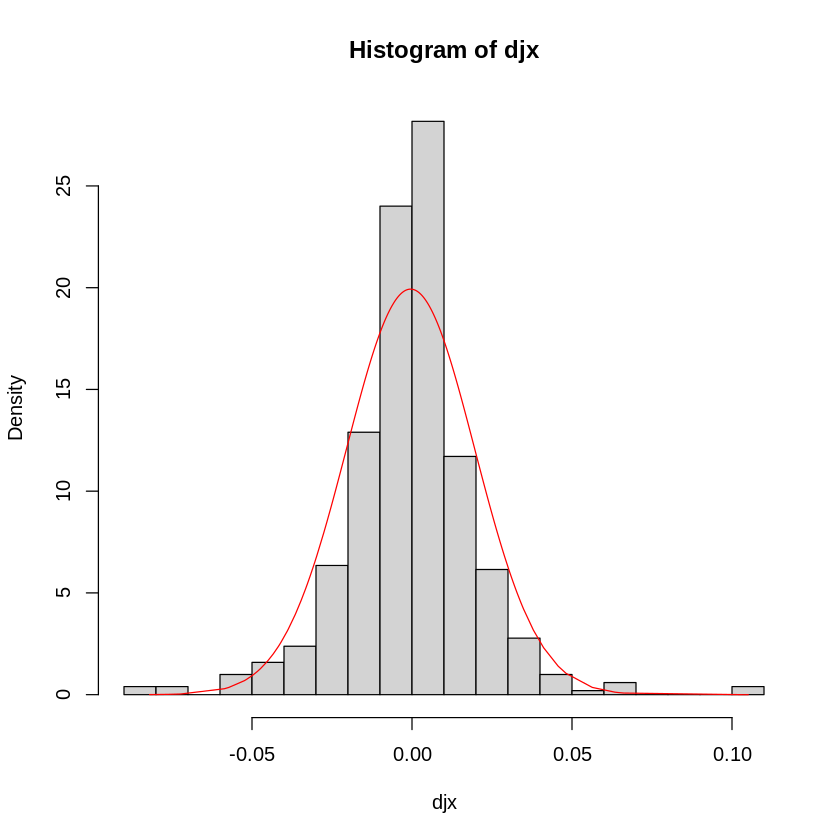

In [ ]:
# Plot histogram of djx
hist(djx, nclass = 20, probability = TRUE)

# Add the normal density as a red line to histogram
lines(djx, dnorm(djx, , mean = mu, sd = sigma), col = "red")

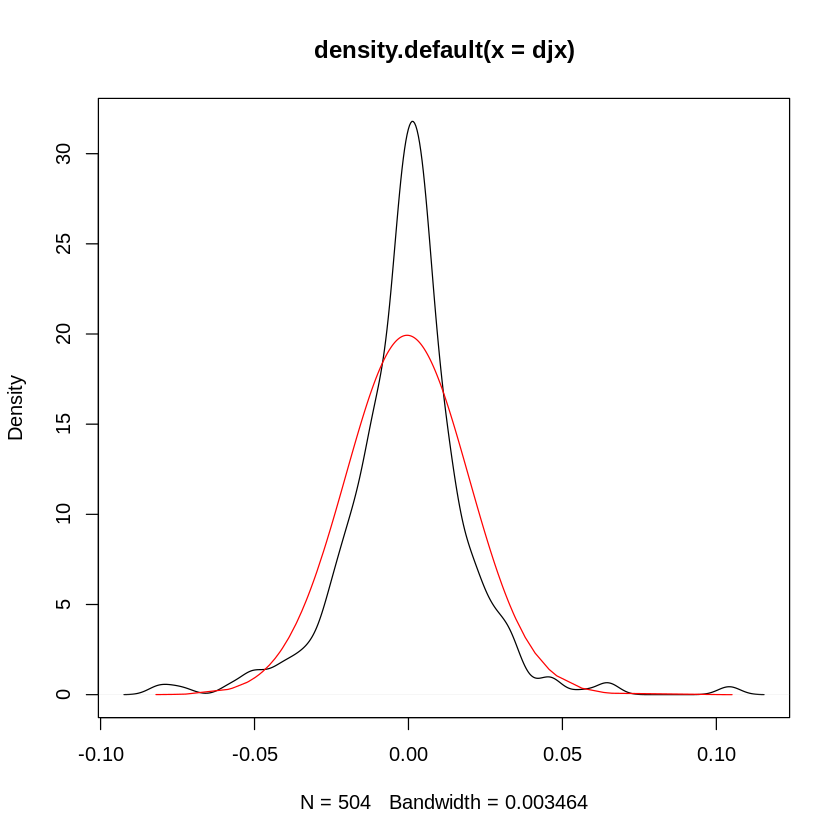

In [ ]:
# Plot non-parametric KDE of djx
plot(density(djx))

# Add the normal density as red line to KDE
lines(djx, dnorm(djx, mean = mu, sd = sigma), col = "red")

***Bon travail! Les données ne semblent pas très normales. Comparez en particulier le centre et les queues de l'histogramme et du tracé de densité avec la courbe normale rouge.***

###**Tests de normalité**

####**1. Tests de normalité**
+ Il y a beaucoup de tests possibles de normalité. Dans ce chapitre, vous découvrirez un test graphique et un test numérique.

####**2. Comment tester la normalité**
+ Commençons par le test graphique. C’est ce qu’on appelle un diagramme Q-Q, qui signifie diagramme quantile-quantile. 

+ En effet, vous comparez efficacement les quantiles d’échantillon des données et les quantiles théoriques d’une distribution de référence. 

+ Parce que l’objectif est de tester la normalité, la distribution de référence sera une normale standard. 

+ Cependant, les diagrammes QQ peuvent être utilisés pour comparer les données avec n’importe quelle distribution de référence. 

+ Regardons le code qui génère un Q-Qplot par rapport à la normale, puis discutons de l’interprétation des données. 
+ Tout d’abord, regardons quelques données normales et voyons ce qui se passe. Vous pouvez générer des données normales avec la fonction rnorm(). 

+ Dans le code, la moyenne et l’écart-type de la distribution normale ont été fixés à 3 et 2, respectivement, pour montrer que l’emplacement et la mise à l’échelle de la distribution ne sont pas importants. 

+ La fonction qqnorm trace les points et qqline ajoute une ligne droite pour référence. Comme les données sont vraiment normales, les points sont assez proches d’une ligne droite.

####**3. Interprétation du diagramme Q-Q**
+ Cependant, si les données sont plus lourdes que la normale, vous auriez tendance à observer une forme en S inversée et si elles étaient à queue plus claire, vous auriez tendance à observer une forme en S. 

+ Des données asymétriques auraient tendance à donner lieu à un graphique courbe. 
+ Voyons ce qui se passe avec les données FTSE. 
+ Vous obtenez ce que j’appelle la forme en S inversé. 
+ Il y a une pente plus raide dans les queues qu’au milieu. Cela indique des queues plus lourdes.

####**4. Entraînons-nous!**
+ Maintenant, c’est à votre tour de construire des Q-Qplots.

####**Graphiques Q-Q pour évaluer la normalité**

+ ***Le graphique quantile-quantile (graphique Q-Q) est une meilleure méthode graphique pour révéler la non-normalité. En général, un graphique Q-Q compare les quantiles des données avec les quantiles d'une distribution de référence ; si les données proviennent d'une distribution du même type (jusqu'à l'échelle et l'emplacement), une ligne raisonnablement droite doit être observée. Vous devez savoir que les degrés de liberté (df) font référence au nombre de valeurs ou d'observations qui peuvent affecter le système avec lequel vous travaillez.***

+ **Dans la vidéo, vous avez vu comment générer 1 000 points de données normaux avec la fonction rnorm(), ainsi que comment utiliser qqnorm() pour créer le tracé Q-Q, et qqline() pour ajouter une ligne droite à titre de référence :**

      > data <- rnorm(1000, mean = 3, sd = 2)
      > qqnorm(data)
      > qqline(data) 

+ **Dans cet exercice, vous allez créer un graphique Q-Q des retours du journal Dow Jones dans djx par rapport à la distribution de référence normale, que vous ajouterez comme guide visuel. Vous comparerez ensuite le tracé avec des jeux de données simulés à partir de distributions normales, Student t et uniformes générées avec les fonctions rnorm(), rt() et runif(). Vous découvrirez la distribution t plus loin dans ce chapitre.**

+ *Si les données proviennent d'une distribution normale, les points doivent être proches de la ligne rouge (bien qu'il puisse y avoir un écart à la toute fin).*

+ *Une fois de plus, djx a été chargé dans votre espace de travail.*

####**Instructions**

+ Faites un tracé Q-Q de djx par rapport à la normale avec qqnorm() et ajoutez une ligne rouge avec qqline() et col = "red" pour juger si le tracé est linéaire.

+ Calculez la longueur de djx avec length() et affectez-le à l'objet n.

+ Générez n variables normales standard avec rnorm() et affectez-les à x1. Faites un tracé Q-Q de x1 par rapport à la normale et ajoutez une ligne rouge comme précédemment.

+ Générez n variables Student t de degré de liberté 4 et affectez-les à x2 (cela a été fait pour vous). Faites un tracé Q-Q de x2 par rapport à la normale et ajoutez une ligne rouge.

+ Générez n variables uniformes et affectez-les à x3 (cela a été fait pour vous). Faites un tracé Q-Q de x3 par rapport à la normale et ajoutez une ligne rouge.

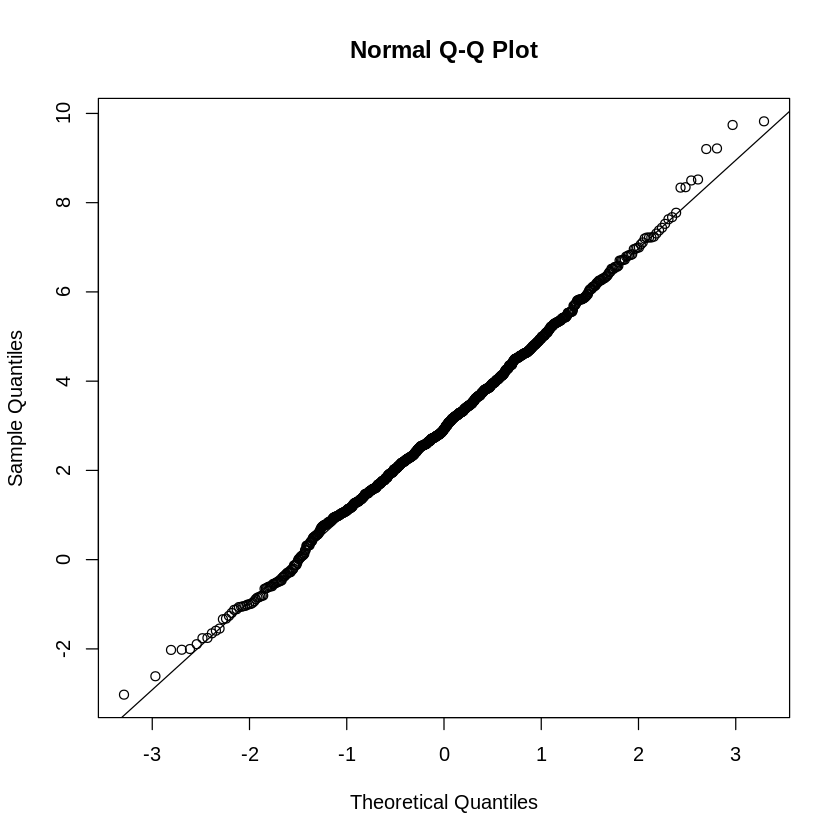

In [ ]:
data <- rnorm(1000, mean = 3, sd = 2)
qqnorm(data)
qqline(data)

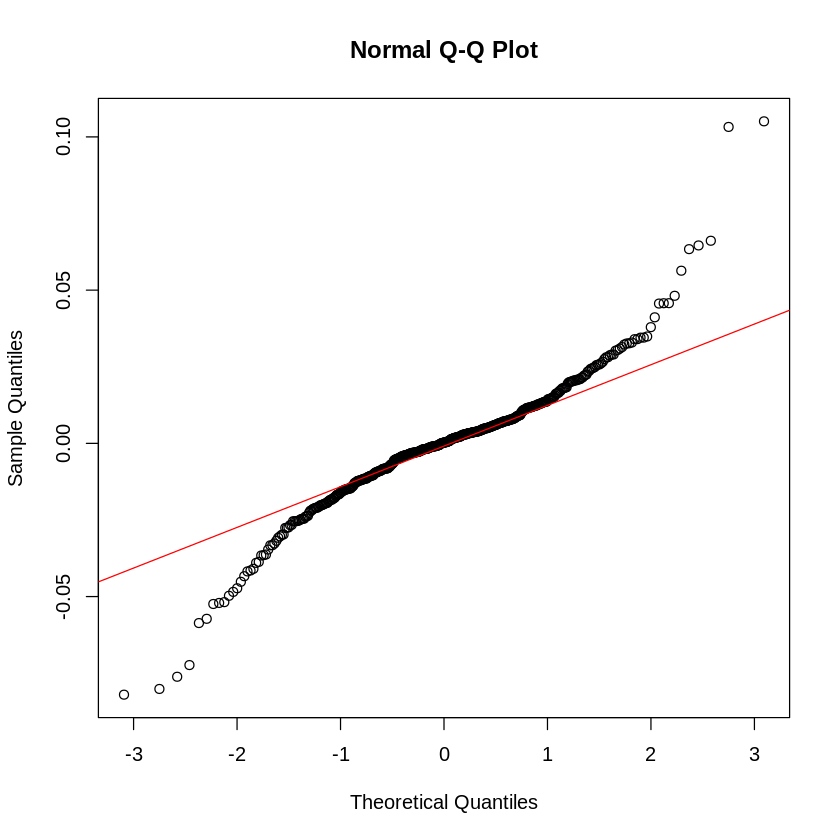

In [ ]:
# Make a Q-Q plot of djx and add a red line
qqnorm(djx)
qqline(djx, col = "red")

In [ ]:
# Calculate the length of djx as n
n <- length(djx)
n

[1] 504

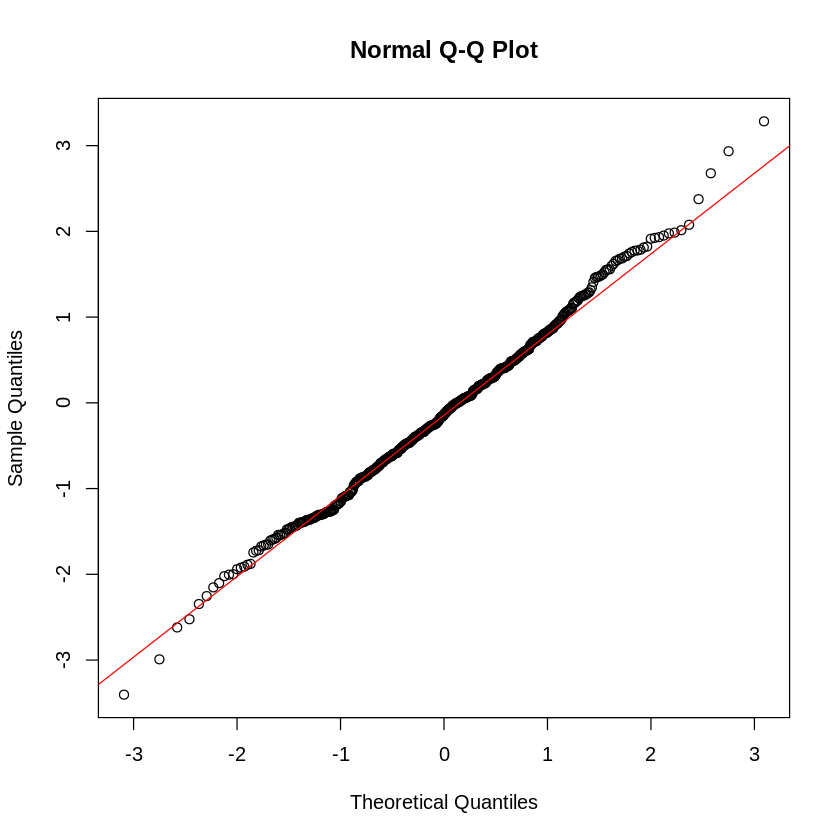

In [ ]:
# Generate n standard normal variables, make a Q-Q plot, add a red line
x1 <- rnorm(n)
qqnorm(x1)
qqline(x1, col = "red")

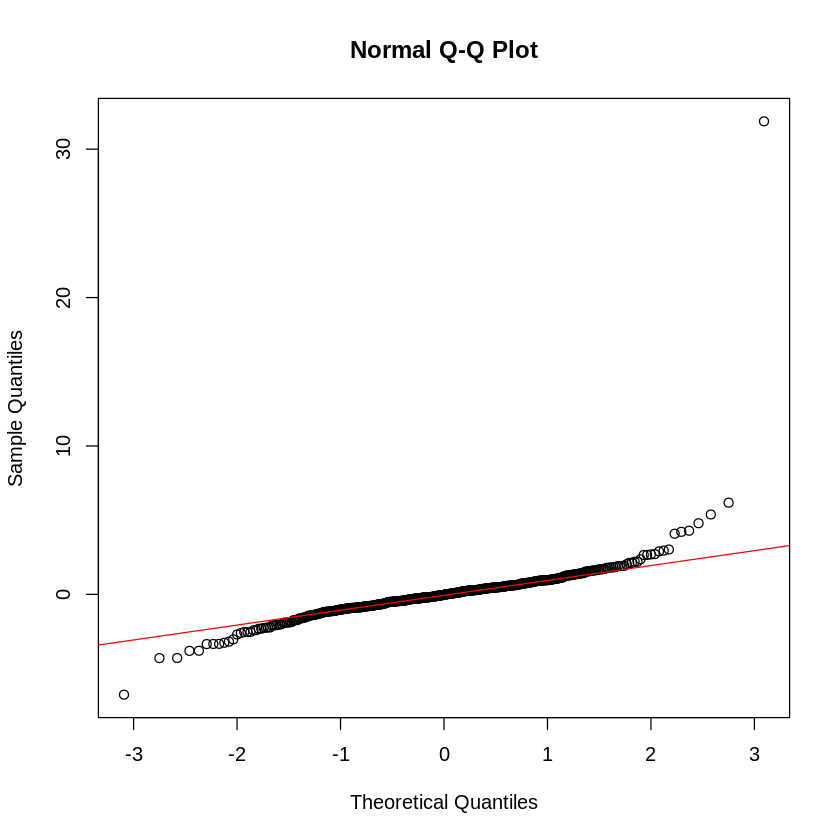

In [ ]:
# Generate n Student t variables, make a Q-Q plot, add a red line
x2 <- rt(n, df = 4)
qqnorm(x2)
qqline(x2, col = "red")

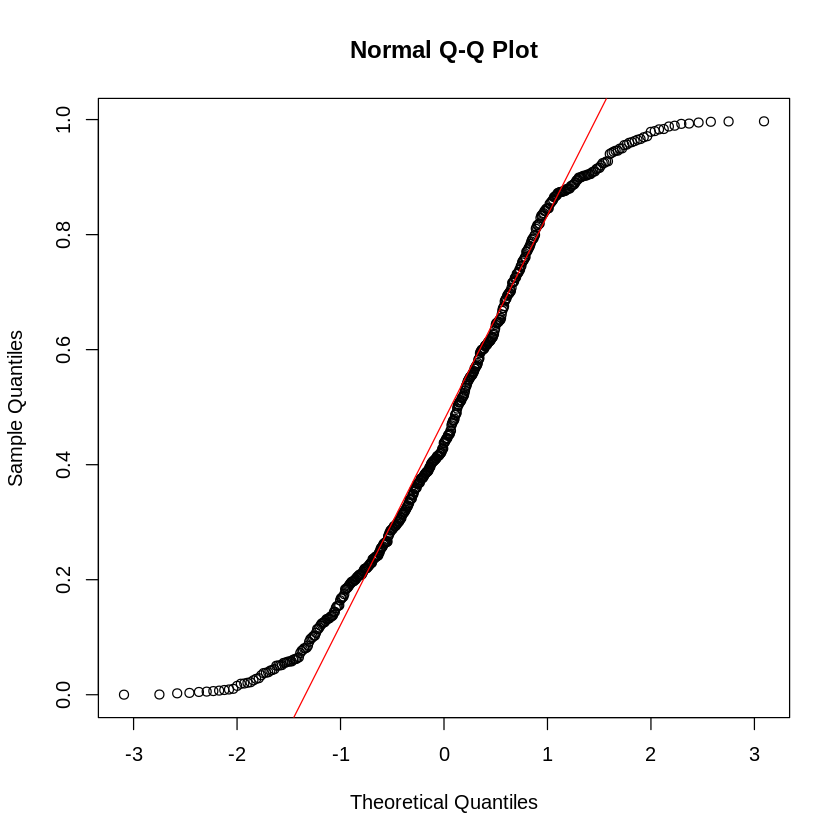

In [ ]:
# Generate n standard uniform variables, make a Q-Q plot, add red line
x3 <- runif(n)
qqnorm(x3)
qqline(x3, col = "red")

***Bon travail! Le diagramme Q-Q est un outil très efficace qui est largement utilisé dans les travaux statistiques et économétriques appliqués.***

###**L’asymétrie et le kurtosis et le test de Jarque-Bera**

####**1. L’asymétrie et le kurtosis et le test de Jarque-Bera**

+ ***Il existe de nombreux tests numériques de normalité, mais celui que vous allez utiliser - le test de Jarque-Bera - est basé sur des mesures d’asymétrie et de kurtosis.***

####**2. Asymétrie et kurtosis**

+ **L’asymétrie et le kurtosis sont deux autres moments d’une distribution, comme la moyenne et l’écart-type. Les formules sont données sur la diapositive.** 

+ Rappelez-vous que $\hat{\mu}$ et $\hat{σ}$ sont la moyenne de l’échantillon et l’écart type de l’échantillon. 

+ L’asymétrie d’une distribution, comme son nom l’indique, est une mesure de son asymétrie. 

+ L’asymétrie d’une distribution normale est nulle. Une façon d’interpréter le kurtosis d’une distribution est comme une mesure de la lourdeur, c’est-à-dire la tendance de la distribution à générer des valeurs extrêmes. 

+ Le kurtosis d’une distribution normale est trois.

+  Si le kurtosis des données de retour est supérieur à 3, cela tend à montrer que les données sont plus lourdes que la normale avec des valeurs plus extrêmes mais aussi avec un centre beaucoup plus étroit. 

+ Une telle distribution est également appelée leptokurtique. 
+ Rappelez-vous l’image des rendements du FTSE. 

+ Par rapport à la normale, l’histogramme avait de longues queues et un centre très pointu. C’est un exemple classique de distribution leptokurtique.

####**3. Asymétrie et kurtosis (II)**
+ Allons de l’avant et calculons l’asymétrie et le kurtosis des rendements FTSE à l’aide des fonctions du package de moments. 

+ Comme vous pouvez le constater, la valeur de l’asymétrie est assez modeste; Les données ne sont pas particulièrement asymétriques. 

+ Cependant, le kurtosis est considérablement plus que 3, comme on peut s’y attendre d’après la photo.

####**4. Le test de Jarque-Bera**


+ Le test de normalité de Jarque-Bera est basé sur une statistique de test qui compare simultanément l’asymétrie et le kurtosis des données avec leurs valeurs pour une distribution normale, c’est-à-dire 0 et 3. 

+ Ainsi, le test peut détecter les écarts par rapport à la normalité causés par une asymétrie, des queues lourdes ou une combinaison des deux. 

+ La statistique de test T est donnée sur les lames et est comparée à une distribution khi-carré avec 2 degrés de liberté. 

+ Appliquons-le aux retours de journal FTSE. 

+ Dans ce cas, la valeur de la statistique de test est énorme à 428, et la valeur $p$, la probabilité estimée qu’un résultat aussi extrême puisse être observé si les données étaient vraiment normales, est effectivement nulle. En langage statistique, l’hypothèse de normalité peut être rejetée.

####**5. Rendements à intervalle plus long et qui se chevauchent**
+ Il s’agissait d’une analyse des retours quotidiens des journaux. 

+ Dans le premier chapitre, vous avez vu comment les rendements hebdomadaires, mensuels, trimestriels ou autres à intervalles plus longs pouvaient être construits à partir des rendements quotidiens en les additionnant simplement. 

+ Mais rappelez-vous maintenant le théorème central limite. 

+ Au fur et à mesure que vous additionnez les variables iid, la distribution de la somme se rapproche de plus en plus d’une distribution normale. 

+ Bien sûr, vous ne savez pas nécessairement que les rendements sont indépendants, mais l’idée principale du CLT, la convergence vers la normalité, est valable dans de nombreuses situations où les données ne sont pas indépendantes. 

+ On peut donc s’attendre à ce que les rendements à intervalles plus longs soient distribués plus normalement. 

+ Dans les exercices, vous examinerez si cela est vrai. Une chose à noter est que lorsque vous agrégez sur des intervalles de plus en plus longs, vous obtenez de moins en moins d’observations à analyser et les tests de normalité deviennent plus faibles. 

+ Donc, une autre chose que vous allez essayer est de calculer des sommes mobiles de rendements quotidiens. 

+ Cela donne ce que l’on appelle des rendements qui se chevauchent. 

+ Il préserve la quantité de données mais introduit de fortes dépendances sérielles qui peuvent compliquer l’interprétation.

####**6. Entraînons-nous!**
+ Maintenant, il est temps pour vous d’essayer toutes ces choses.

###**EXERCICES**

####**Tests numériques de normalité**

+ ***Le package moments contient des fonctions pour calculer l'aplatissement et l'asymétrie des données ainsi que pour implémenter le test de Jarque-Bera, qui est un test de normalité basé sur ces moments d'ordre supérieur. Dans une commande, il compare l'asymétrie et l'aplatissement des données avec les valeurs théoriques de la distribution normale, qui sont respectivement 0 et 3.***
        jarque.test(x)
        skewness(x, na.rm = FALSE)
        kurtosis(x, na.rm = FALSE)

+ **Dans cet exercice, vous calculerez l'asymétrie et l'aplatissement pour le djx, l'indice Dow Jones de 2008 à 2011, et appliquerez le test de normalité de Jarque-Bera. Vous appliquerez ensuite les mêmes méthodes à djreturns, qui contient 29 actions du Dow Jones pour la même période.**

+ **Rappelez-vous que vous pouvez utiliser apply($X$, MARGIN, FUN, …) pour appliquer des fonctions sur les marges du tableau. Le paramètre MARGIN est un vecteur indiquant où la fonction sera appliquée ; dans ce cas, vous utiliserez 2 pour spécifier que la fonction FUN doit être appliquée aux colonnes de la matrice $X$.**

+ *Le package moments a été importé pour vous et les données djx et djreturns se trouvent dans votre espace de travail.*

####**Instructions**

+ Calculez l'asymétrie et l'aplatissement des rendements de l'indice Dow Jones dans djx en utilisant respectivement l'asymétrie() et l'aplatissement().
+ Effectuez un test de normalité Jarque-Bera pour djx en utilisant jarque.test().
+ Utilisez apply() pour calculer l'asymétrie et l'aplatissement des rendements individuels des actions dans djreturns en attribuant les résultats à s et k, respectivement.
+ Remplissez plot() pour tracer k contre s avec le paramètre type = "n", puis placez les symboles boursiers aux points avec la commande text() (cela a été fait pour vous).
+ Utilisez apply() pour effectuer le test de Jarque-Bera pour chacun des constituants du Dow Jones dans djreturns.

In [ ]:
dj <- DJ["2008/2011"]
djx <- diff(log(dj))
djx <- as.numeric(djx)[-1]
djx <- sort(djx)

djstocks <- DJ_const["2008/2011"]
djreturns <- diff(log(djstocks))[-1]

In [ ]:
# Calculate skewness and kurtosis of djx
skewness(djx)

[1] 0.001913285

In [ ]:
kurtosis(djx)

[1] 9.058875

In [ ]:
# Carry out a Jarque-Bera test for djx
jarque.test(djx)


	Jarque-Bera Normality Test

data:  djx
JB = 1541.8, p-value < 2.2e-16
alternative hypothesis: greater


In [ ]:
# Calculate skewness and kurtosis of djreturns 
s <- apply(djreturns, 2, skewness)
k <- apply(djreturns, 2, kurtosis)

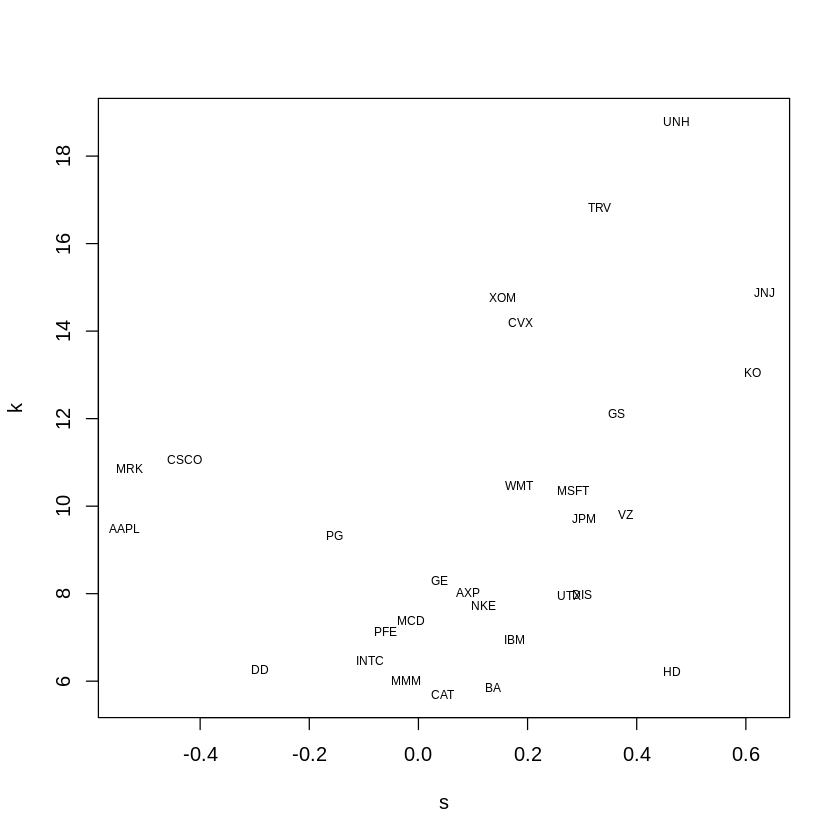

In [ ]:
# Plot k against s and add text labels to identify stocks
plot(s, k, type = "n")
text(s, k, names(s), cex = 0.6)

In [ ]:
# Carry out Jarque-Bera tests for each constituent in djreturns
apply(djreturns, 2, jarque.test)

$AAPL

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 1819.5, p-value < 2.2e-16
alternative hypothesis: greater


$AXP

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 1066.1, p-value < 2.2e-16
alternative hypothesis: greater


$BA

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 347.08, p-value < 2.2e-16
alternative hypothesis: greater


$CAT

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 304.64, p-value < 2.2e-16
alternative hypothesis: greater


$CSCO

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 2758.9, p-value < 2.2e-16
alternative hypothesis: greater


$CVX

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 5268.2, p-value < 2.2e-16
alternative hypothesis: greater


$DD

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 459.61, p-value < 2.2e-16
alternative hypothesis: greater


$DIS

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 1053.4, p-value < 2.2e-16
alternative hypothesis: greater


$GE

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 1176.9, 

***Bien joué! Les distributions de rendement des actions Dow Jones ont toutes un kurtosis élevé et certaines d'entre elles sont assez asymétriques.***

####**Tester la normalité pour des horizons temporels plus longs**

+ ***Au fur et à mesure que les rendements sont additionnés sur des périodes plus longues, un effet de limite centrale se produit et les rendements ont tendance à devenir plus normaux.***

+ *Dans cet exercice, vous utiliserez les fonctions d'agrégation que vous avez apprises dans le premier chapitre pour agréger les données dans djx_d, contenant les log-returns quotidiens pour 29 des actions Dow Jones pour la période 2000-2015. Ensuite, vous appliquerez le test de Jarque-Bera aux rendements quotidiens, hebdomadaires et mensuels. djx_d est chargé dans votre espace de travail.*

####**Instructions**

+ Calculez les retours log hebdomadaires et mensuels de djx_d et attribuez-les respectivement à djx_w et djx_m.
+ Remplissez apply() pour calculer la valeur p du test de Jarque-Bera pour chacune des séries de rendement quotidien Dow Jones dans djx_d.
+ Faites de même pour les rendements boursiers hebdomadaires dans djx_w.
+ Faites de même pour les rendements mensuels des actions dans djx_m.

In [ ]:
djstocks <- DJ_const["2000/2015"]
djreturns <- diff(log(djstocks))[-1]
djx_d <- djreturns

In [ ]:
# Calculate weekly and monthly log-returns from djx_d
djx_w <- apply.weekly(djx_d, colSums)
djx_m <- apply.monthly(djx_d, colSums)

In [ ]:
# Calculate the p-value for each series in djx_d
print(apply(djx_d, 2, function(v){jarque.test(v)$p.value}))

AAPL  AXP   BA  CAT CSCO  CVX   DD  DIS   GE   GS   HD  IBM INTC  JNJ  JPM   KO 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 MCD  MMM  MRK MSFT  NKE  PFE   PG  TRV  UNH  UTX    V   VZ  WMT  XOM 
   0    0    0    0    0    0    0    0    0    0   NA    0    0    0 


In [ ]:
# Calculate the p-value for each series in djx_w
print(apply(djx_w, 2, function(v){jarque.test(v)$p.value}))

AAPL  AXP   BA  CAT CSCO  CVX   DD  DIS   GE   GS   HD  IBM INTC  JNJ  JPM   KO 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 MCD  MMM  MRK MSFT  NKE  PFE   PG  TRV  UNH  UTX    V   VZ  WMT  XOM 
   0    0    0    0    0    0    0    0    0    0   NA    0    0    0 


In [ ]:
# Calculate the p-value for each series in djx_m
print(apply(djx_m, 2, function(v){jarque.test(v)$p.value}))

        AAPL          AXP           BA          CAT         CSCO          CVX 
0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.110223e-16 1.677566e-01 
          DD          DIS           GE           GS           HD          IBM 
5.059611e-03 4.043754e-11 3.086420e-13 3.259324e-02 5.493080e-02 0.000000e+00 
        INTC          JNJ          JPM           KO          MCD          MMM 
0.000000e+00 5.472560e-08 1.982609e-06 5.641173e-07 0.000000e+00 9.341348e-02 
         MRK         MSFT          NKE          PFE           PG          TRV 
1.524618e-07 0.000000e+00 0.000000e+00 3.076613e-01 0.000000e+00 0.000000e+00 
         UNH          UTX            V           VZ          WMT          XOM 
0.000000e+00 0.000000e+00           NA 0.000000e+00 7.281104e-04 1.100037e-02 


***Bien que les valeurs de p augmentent, tous les rendements mensuels autres que Chevron (CVX), 3M (MMM) et Pfizer (PFE) échouent toujours au test de normalité.***

####**Chevauchement des rendements**

+ ***Lorsque vous agrégez des séries en additionnant les retours journaliers quotidiens en intervalles plus longs, vous analysez un plus petit nombre d'observations. Pour préserver la quantité de données, vous pouvez calculer les retours qui se chevauchent avec la fonction rollapplyr() ; cela crée également de fortes corrélations entre les observations.***

+ **Il y a 5 jours de bourse dans la semaine calendaire moyenne. En calculant les sommes mobiles sur 5 jours des log-rendements des données d'indice quotidiennes, vous obtenez des rendements hebdomadaires approximatifs se chevauchant se terminant chaque semaine civile. De même, le calcul des sommes mobiles sur 21 jours donne des rendements mensuels approximatifs qui se chevauchent, et le calcul des sommes mobiles sur 63 jours donne des rendements trimestriels approximatifs qui se chevauchent.**

+ **Regardons un exemple avec les données de retour quotidiennes du Dow Jones dans djx. Étant donné que 5 valeurs sont utilisées pour calculer chaque somme mobile, les 4 premières valeurs du résultat sont NA. Dans ce cas, nous utiliserons l'indexation pour les supprimer :**

      > djx5 <- rollapplyr(djx, width = 5, FUN = sum)
      > head(djx5)
                          ^DJI
        2008-01-03          NA
        2008-01-04          NA
        2008-01-07          NA
        2008-01-08          NA
        2008-01-09 -0.02394677
        2008-01-10 -0.01571869

      > djx5 <- djx5[-(1:4)]


+ *Dans cet exercice, vous allez calculer des sommes mobiles de différents intervalles à partir de djx, qui est chargé dans votre espace de travail. Vous trouverez ensuite l'asymétrie et l'aplatissement des données résultantes et effectuerez le test de Jarque-Bera comme vous l'avez fait dans les exercices précédents. Les rendements qui se chevauchent semblent-ils plus normaux ?*

####**Instructions**

+ Calculez une somme mobile sur 21 jours des retours de journal dans djx, supprimez les 20 premières valeurs et attribuez-la à djx21.
+ Calculez une somme mobile sur 63 jours des retours de journal dans djx, supprimez les 62 premières valeurs et attribuez-les à djx63
+ Utilisez merge() et all = FALSE pour fusionner djx, djx21 et djx63 dans cet ordre, puis affectez-le à djx2. 
+ Tracez-le avec plot.zoo().
+ Utilisez apply() et les fonctions appropriées pour calculer l'asymétrie et l'aplatissement pour chacune des séries dans djx2.
+ Utilisez apply() et la fonction appropriée pour effectuer le test de Jarque-Bera sur chacune des séries dans djx2.

In [ ]:
dj <- DJ["2008/2011"]
djx <- diff(log(dj))[-1]
djx5 <- rollapplyr(djx, width = 5, FUN = sum)
head(djx5)

                  ^DJI
2008-01-03          NA
2008-01-04          NA
2008-01-07          NA
2008-01-08          NA
2008-01-09 -0.02394677
2008-01-10 -0.01571869

In [ ]:
djx5 <- djx5[-(1:4)]

In [ ]:
# Calculate a 21-day moving sum of djx
djx21 <- rollapplyr(djx, width = 21, FUN = sum)[-(1:20)]
head(djx21)

                  ^DJI
2008-02-01 -0.02332814
2008-02-04 -0.03281951
2008-02-05 -0.04269894
2008-02-06 -0.05014643
2008-02-07 -0.02754799
2008-02-08 -0.04440830

In [ ]:
# Calculate a 63-day moving sum of djx
djx63 <- rollapplyr(djx, width = 63, FUN = sum)[-(1:62)]
head(djx63)

                   ^DJI
2008-04-03 -0.032564611
2008-04-04 -0.034858775
2008-04-07 -0.014776398
2008-04-08 -0.019765286
2008-04-09 -0.004921951
2008-04-10 -0.012112748

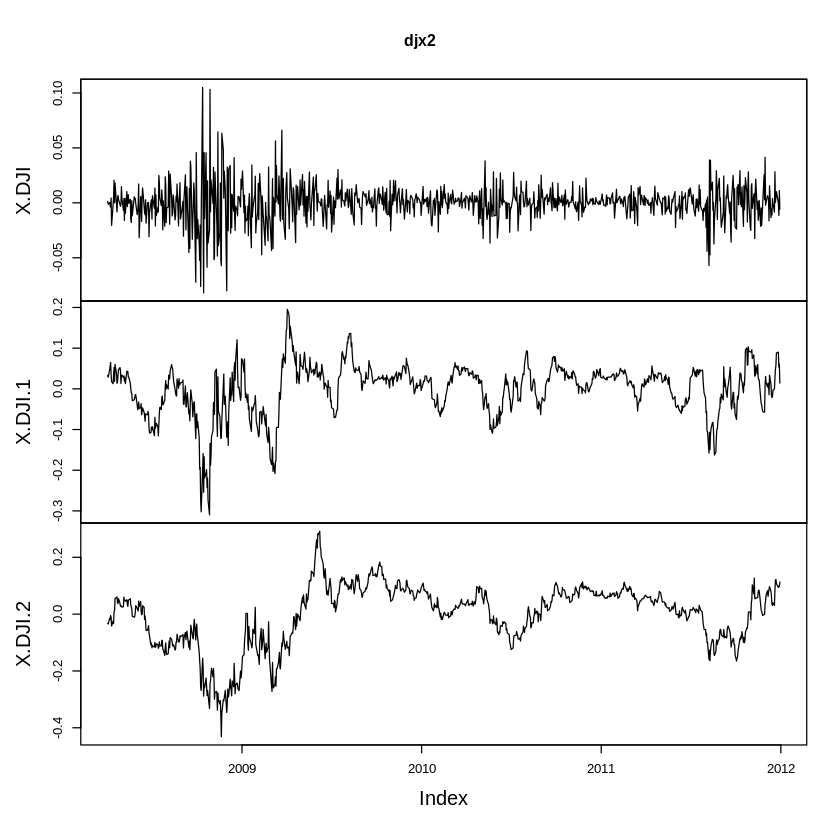

In [ ]:
# Merge the three series and plot
djx2 <- merge(djx, djx21, djx63, all = FALSE)
plot.zoo(djx2)

In [ ]:
# Compute the skewness and kurtosis for each series in djx2
print(apply(djx2, 2, skewness))

      X.DJI     X.DJI.1     X.DJI.2 
-0.01276806 -1.16018080 -0.87509434 


In [ ]:
print(apply(djx2, 2, kurtosis))

   X.DJI  X.DJI.1  X.DJI.2 
9.264838 5.845321 3.845090 


In [ ]:
# Conduct the Jarque-Bera test to each series in djx2
print(apply(djx2, 2, jarque.test))

$X.DJI

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 1547.1, p-value < 2.2e-16
alternative hypothesis: greater


$X.DJI.1

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 531.33, p-value < 2.2e-16
alternative hypothesis: greater


$X.DJI.2

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 148.89, p-value < 2.2e-16
alternative hypothesis: greater




***Bon travail! Ces rendements qui se chevauchent sont fortement corrélés et encore plus difficiles à interpréter.***

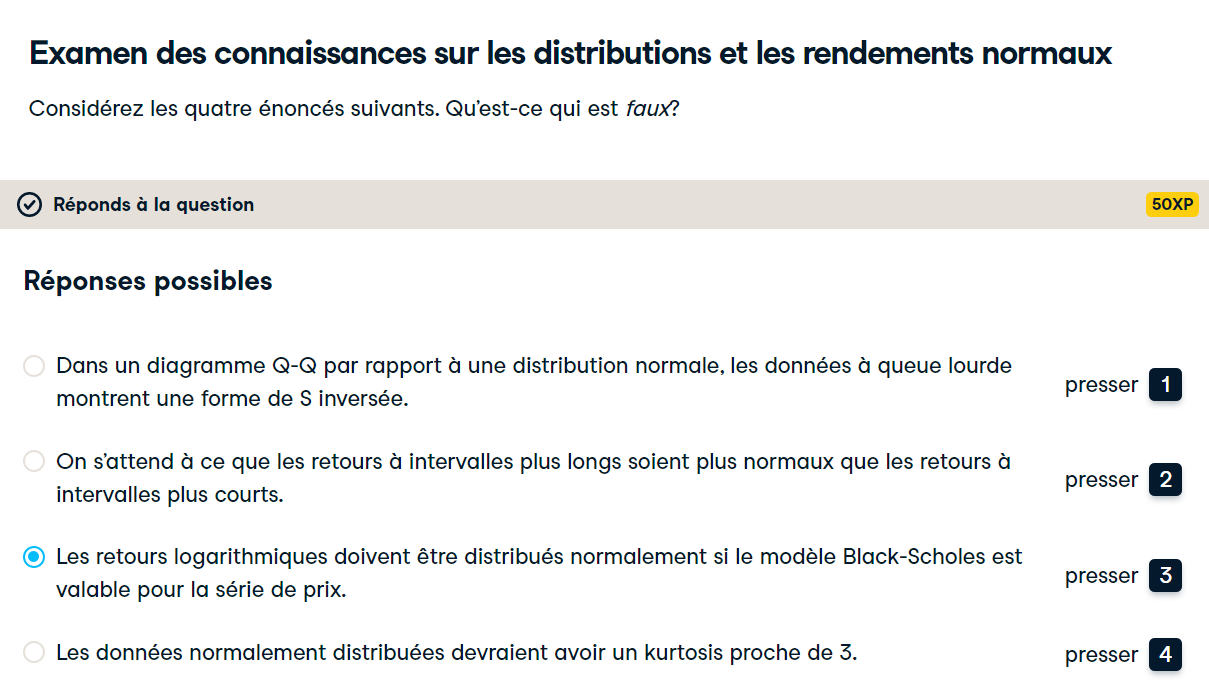

***Correct! Cette affirmation ne décrit pas avec précision le modèle Black-Scholes***

###**La distribution Student $t$**
####**1. La distribution Student $t$**

+ ***Donc, si la distribution normale n’est pas un bon modèle pour les rendements logarithmiques sur des horizons plus courts, alors qu’est-ce que c’est?***

####**2. La distribution Student $t$**
+ Une distribution qui convient souvent mieux est la distribution Student $t$. 
+ La distribution $t$ de Student dans son général a trois paramètres: 
  + un paramètre de localisation $\mu$, 
  + un paramètre de mise à l’échelle $\sigma$ et 
  + un paramètre de degré de liberté $\nu$. 
  
+ La densité de probabilité prend la forme indiquée sur la diapositive. Plus la valeur de $\nu$ est petite, plus la distribution est lourde ou leptokurtique. 

+ Plus la valeur de nu est grande, plus elle se rapproche d’une distribution normale. 

+ Donc, pour un paramètre supplémentaire, vous pouvez obtenir une famille qui est beaucoup plus flexible que la normale et contient normal comme cas limite comme nu va à l’infini.

####**3. Ajustement de la distribution Student $t$**


+ La meilleure façon d’ajuster la distribution est par la méthode du maximum de vraisemblance et qui a été implémentée dans la fonction fit (dot) st dans le paquet QRM. Voici un exemple où la distribution Student $t$ est ajustée aux journaux FTSE pour 2008-2009. 

+ Les données sont transmises à la fonction fit.st() et le modèle ajusté est affecté à l’objet tfit. TFIT est une liste avec une composante appelée PAR EST. 

+ Ce composant est affecté à tpars et affiché, puis les valeurs $\nu$, $\mu$ et $\sigma$ sont stockées pour une utilisation ultérieure. 

+ Comme vous pouvez le voir, la valeur de nu dans la première composante de tpars est très petite, environ deux points neuf cinq. Cela indique une distribution t à queue très lourde. En fait, pour nu inférieur ou égal à 4, le kurtosis est en fait infini.

####**4. Affichage de la distribution Student $t$ ajustée**

+ À quoi cela ressemble-t-il lorsque la courbe ajustée est superposée aux données? 

+ Dans le code, l’histogramme des rendements ftse est tracé et la normale ajustée est à nouveau superposée en rouge. 

+ La densité $t$ ajustée est calculée et affectée à l’objet yvals. 

+ Il s’est ensuite superposé à l’image en bleu. 

+ Le calcul de la tdensité utilise la fonction R standard dt(). 

+ Parce que cette fonction ne prend que l’argument du degré de liberté $\nu$ et ne prend pas les arguments pour $\mu$ et $\sigma$, vous devez faire un peu plus de travail pour calculer la densité. 

+ Avant de transmettre les données à la fonction dt(), $\mu$ est soustrait de ftse, puis la différence est divisée par $\sigma$. 

+ Ensuite, la densité est mise à l’échelle de 1 sur sigma pour obtenir le bon calcul. 

+ Il est clair que la distribution $t$ convient beaucoup mieux. 

+ Dans les exercices restants, vous essaierez d’ajuster vous-même une distribution $t$ aux données et vous testerez également d’autres types de données telles que les rendements des taux de change et les rendements des taux d’intérêt pour la normalité.

####**5. Entraînons-nous!**
+ Alors à vous de vous entraîner.

###**EXERCICES**

####**Ajustement de la distribution $t$ aux données**
+ ***Une distribution $t$ de Student est généralement bien mieux adaptée aux rendements quotidiens, hebdomadaires et mensuels qu'une distribution normale.***

+ **Vous pouvez en créer un en utilisant la fonction fit.st() dans le package QRM. Le modèle ajusté résultant a un paramètre estime le composant par.ests qui peut être affecté à une liste tpars afin de stocker ses valeurs de nu, mu et sigma pour une utilisation ultérieure :**

      > tfit <- fit.st(ftse)
      > tpars <- tfit$par.ests
      > tpars
          nu           mu        sigma
      2.949514e+00 4.429863e-05 1.216422e-02


+ *Dans cet exercice, vous ajusterez une distribution t de Student aux log-rendements quotidiens de l'indice Dow Jones de 2008 à 2011 contenus dans djx. Ensuite, vous allez tracer un histogramme des données et superposer une ligne rouge au tracé montrant la densité t ajustée. Les données djx et le package QRM ont été chargés pour vous.*

####**Instructions**

+ Utilisez fit.st() pour ajuster une distribution t de Student aux données dans djx et affecter les résultats à tfit.
+ Attribuez le composant par.ests du modèle ajusté à tpars et les éléments de tpars à nu, mu et sigma, respectivement.
+ Remplissez hist() pour tracer un histogramme de djx.
+ Remplissez dt() pour calculer la densité t ajustée aux valeurs djx et attribuez-les à yvals. Reportez-vous à la vidéo pour cette équation.
+ Remplissez lines() pour ajouter une ligne rouge à l'histogramme de djx montrant la densité t ajustée.

In [ ]:
install.packages("qrmtools")
install.packages('QRM')

In [ ]:
library(sfsmisc) # for eaxis()
library(qrmtools)

In [ ]:
#library(QRM)
djx <- as.numeric(djx)
djx <- sort(djx)

In [ ]:
# Fit a Student t distribution to djx
tfit <- fit.st(djx)


In [ ]:
# Define tpars, nu, mu, and sigma
tpars <- tfit$par.ests
tpars

In [ ]:
nu <- tpars[1]
nu

In [ ]:
mu <- tpars[2]
mu

In [ ]:
sigma <- tpars[3]
sigma

In [ ]:
# Plot a histogram of djx
hist(djx, nclass = 20, probability = TRUE, ylim = range(0, 40))

# Compute the fitted t density at the values djx
yvals <- dt((djx - mu)/sigma, df = nu)/sigma

# Superimpose a red line to show the fitted t density
lines(djx, yvals, col = "red")

####**Tester les rendements FX pour la normalité**
+ ***Jusqu'à présent, les exercices de ce chapitre ont examiné la normalité des rendements des indices boursiers et des rendements des actions individuelles.***

+ **Pour renforcer ces idées, vous appliquerez des idées similaires aux rendements logarithmiques des taux de change. L'ensemble de données fx_d contient les log-returns quotidiens des taux de change EUR/USD, GBP/USD et JPY/USD pour la période 2001-2015, et l'ensemble de données fx_m contient les log-returns mensuels correspondants. Les deux sont multivariés ; ils sont chargés dans votre espace de travail.**

+ *Laquelle des séries mensuelles de log-retour apparaît la plus normale ?*

####**Instructions**

+ Tracez la série de rendements logarithmiques du taux de change quotidien dans fx_d avec la fonction de traçage appropriée.
+ Utilisez apply() pour effectuer le test de Jarque-Bera sur chacune des séries de fx_d.
+ Tracez la série mensuelle de retour de journal dans fx_m avec la même fonction de traçage et le même type de paramètre = "h".
+ Utilisez apply() pour effectuer le test de Jarque-Bera sur chacune des séries de fx_m.
+ Remplissez apply() pour ajuster une distribution t de Student à chacune des séries dans fx_m et obtenir les estimations des paramètres.

In [ ]:
data("EUR_USD")
data("GBP_USD")
data("JPY_USD")
fx1 <- EUR_USD["2001/2015"]
fx2 <- GBP_USD["2001/2015"]
fx3 <- JPY_USD["2001/2015"]
fx <- merge(fx1, fx2, fx3)
fx_d <- apply(log(fx), 2, diff)
fx_m <- apply.monthly(fx_d, colSums)

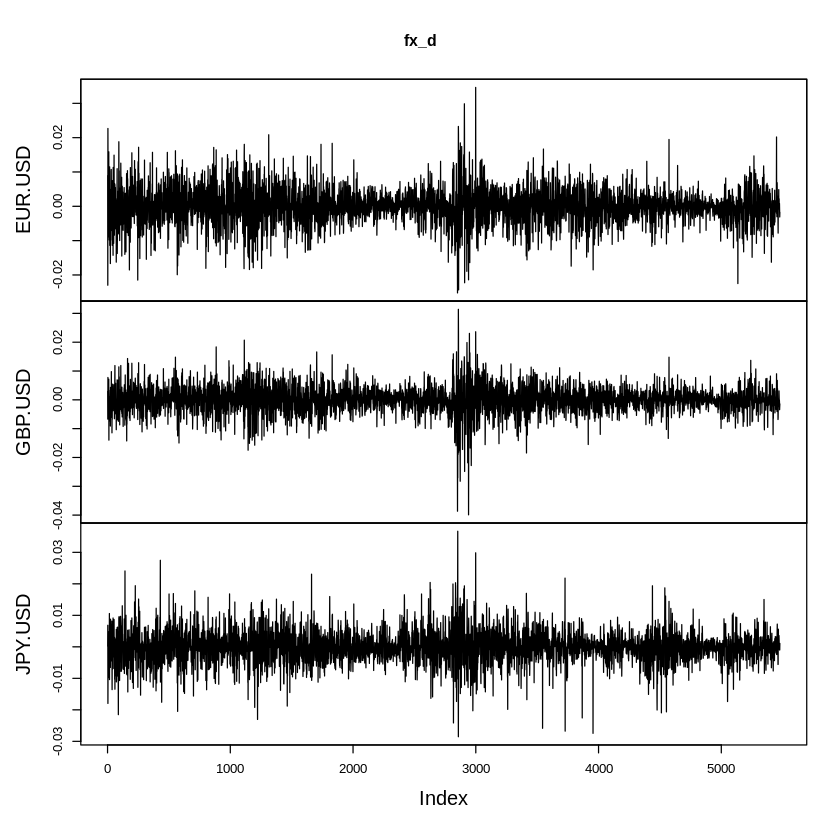

In [ ]:
# Plot the daily log-return series in fx_d
plot.zoo(fx_d)

In [ ]:
# Apply the Jarque-Bera test to each of the series in fx_d
apply(fx_d, 2, jarque.test)

$EUR.USD

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 2791.1, p-value < 2.2e-16
alternative hypothesis: greater


$GBP.USD

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 10962, p-value < 2.2e-16
alternative hypothesis: greater


$JPY.USD

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 5039.7, p-value < 2.2e-16
alternative hypothesis: greater



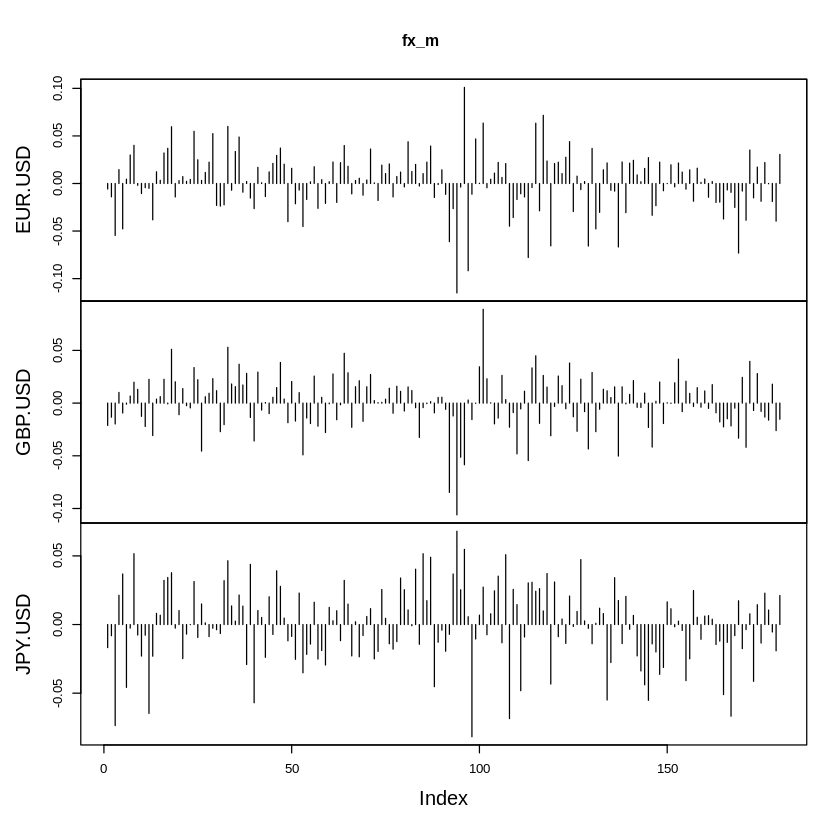

In [ ]:
# Plot the monthly log-return series in fx_m
plot.zoo(fx_m, type = "h")

In [ ]:
# Apply the Jarque-Bera test to each of the series in fx_m
apply(fx_m, 2, jarque.test)

$EUR.USD

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 22.717, p-value = 1.167e-05
alternative hypothesis: greater


$GBP.USD

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 40.814, p-value = 1.372e-09
alternative hypothesis: greater


$JPY.USD

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 3.6561, p-value = 0.1607
alternative hypothesis: greater



In [ ]:
# Fit a Student t distribution to each of the series in fx_m
apply(fx_m, 2, function(v){fit.st(v)$par.ests})

***Travail fantastique! Êtes-vous d'accord pour dire que les rendements logarithmiques du taux de change JPY/USD semblent être les plus normaux ?***

####**Tester la normalité des rendements des taux d'intérêt**

+ ***L'objet zcbx_m contient des séries de rendements logarithmiques mensuels pour les rendements des obligations canadiennes à coupon zéro de 1 an, 5 ans et 10 ans. L'objet zcbx2_m contient les retours simples correspondants. Les deux sont multivariés ; ils sont chargés dans votre espace de travail.***

+ ***Dans cet exercice, vous allez tracer ces séries de taux d'intérêt, puis examiner leur normalité avec des graphiques Q-Q et des tests de Jarque-Bera.**

+ *Les retours logarithmiques montrent une preuve plus claire de non-normalité que les retours simples dans ce cas.*

####**Instructions**

+ Tracez zcbx_m et zcbx2_m avec la fonction de traçage appropriée et le paramètre type = "h".
+ Utilisez des crochets pour l'indexation et qqnorm() pour créer des tracés Q-Q de la 3ème série de composants de zcbx_m et zcbx2_m.
+ Utilisez apply() pour calculer le kurtosis de chaque série de composants dans zcbx_m et zcbx2_m.
+ Utilisez apply() pour effectuer le test de Jarque-Bera sur chaque série de composants dans zcbx_m et zcbx2_m.


In [ ]:
data("ZCB_CAD")
zcb <- ZCB_CAD[,c("1.00y", "5.00y", "10.00y")]
zcbx <- diff(log(zcb))
zcbx2 <- diff(zcb)
zcbx_m <- apply.monthly(zcbx, colSums)["2006/2015"]
zcbx2_m<- apply.monthly(zcbx2, colSums)["2006/2015"]

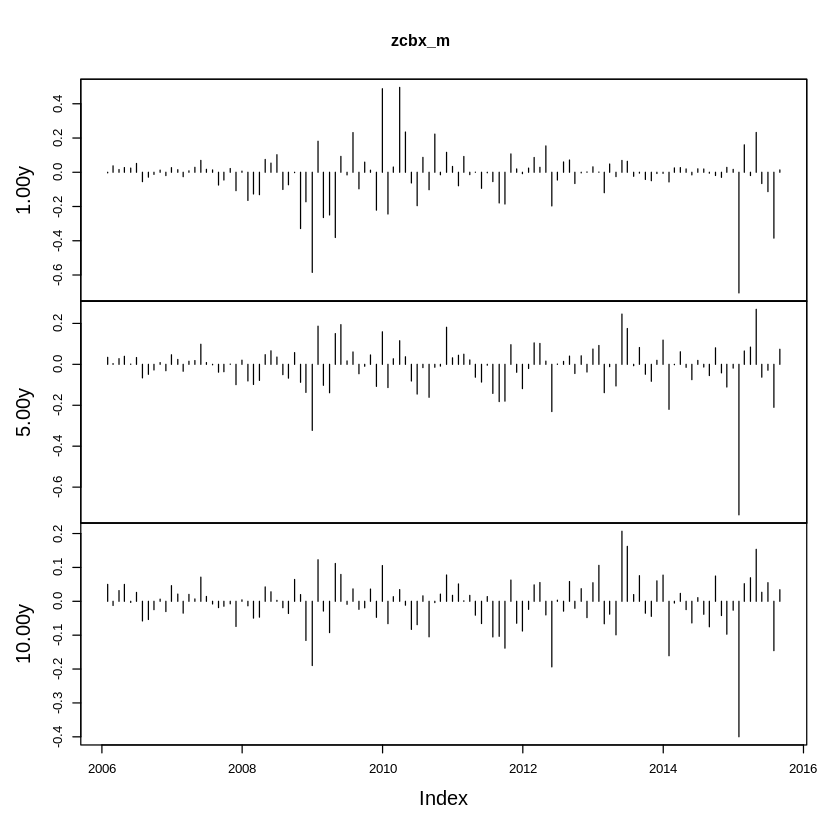

In [ ]:
# Plot the interest-rate return series zcbx_m and zcbx2_m
plot.zoo(zcbx_m, type = "h")

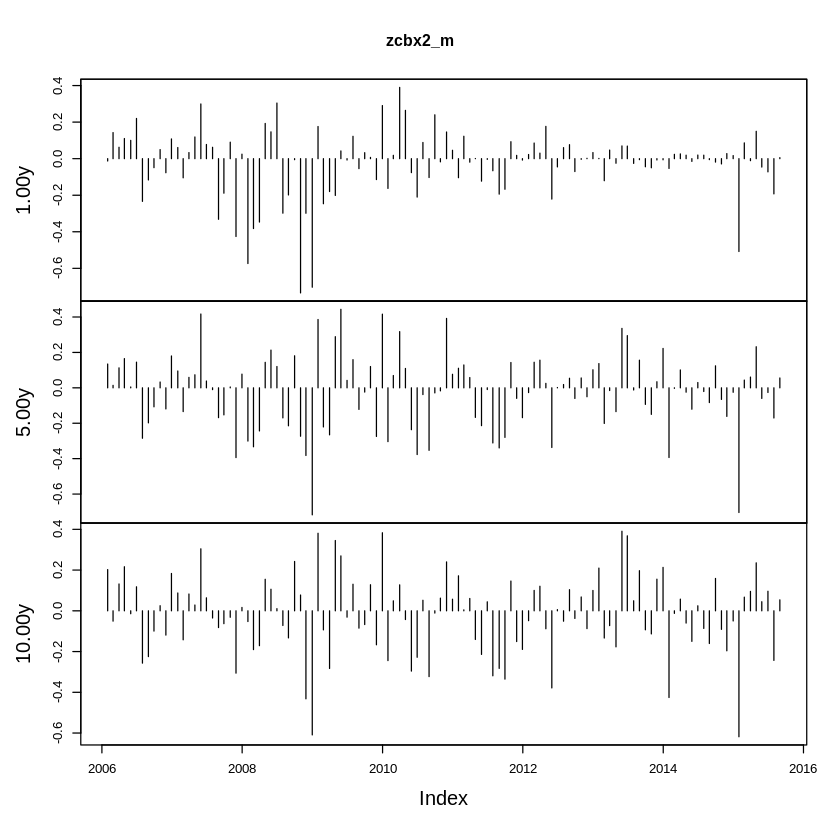

In [ ]:
plot.zoo(zcbx2_m, type = "h")

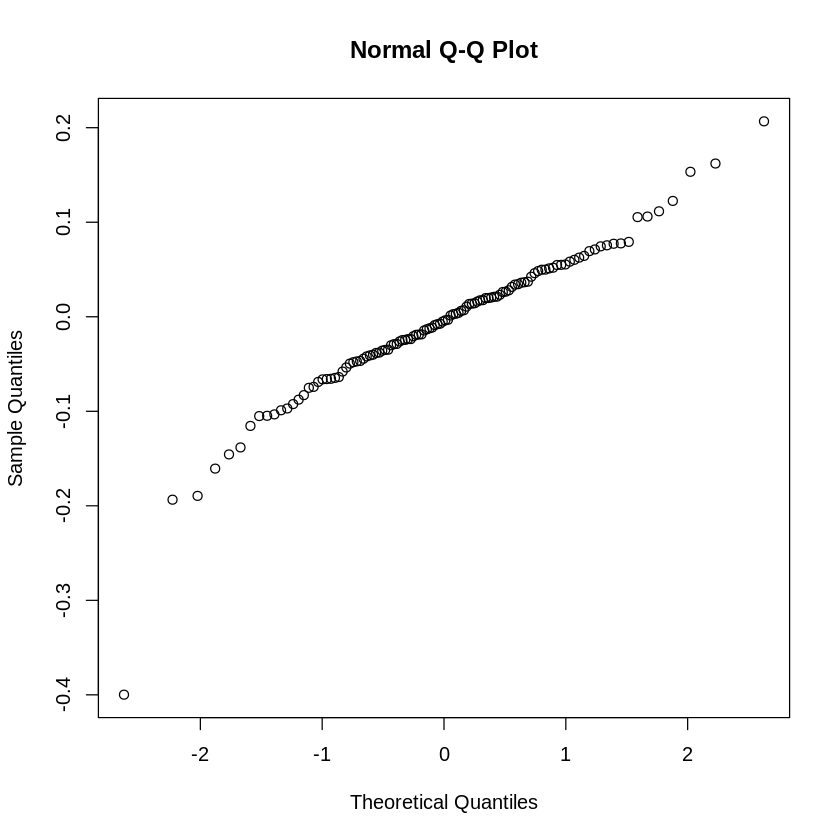

In [ ]:
# Make Q-Q plots of the 3rd component series of zcbx_m and zcbx2_m
qqnorm(zcbx_m[, 3])

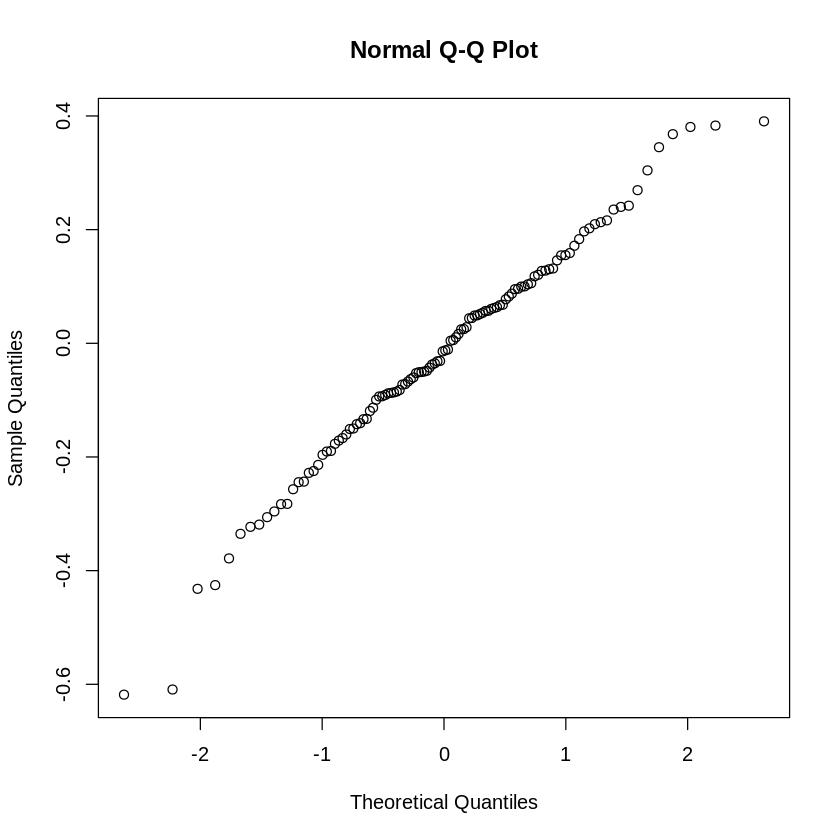

In [ ]:
qqnorm(zcbx2_m[, 3])

In [ ]:
# Compute the kurtosis of each series in zcbx_m and zcbx2_m
print(apply(zcbx_m, 2, kurtosis))

    1.00y     5.00y    10.00y 
 8.597937 13.899820  7.990000 


In [ ]:
print(apply(zcbx2_m, 2, kurtosis))

   1.00y    5.00y   10.00y 
6.105796 3.737785 3.510665 


In [ ]:
# Conduct the Jarque-Bera test on each series in zcbx_m and zcbx2_m
apply(zcbx_m, 2, jarque.test)

$`1.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 164.94, p-value < 2.2e-16
alternative hypothesis: greater


$`5.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 645.07, p-value < 2.2e-16
alternative hypothesis: greater


$`10.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 142.19, p-value < 2.2e-16
alternative hypothesis: greater



In [ ]:
apply(zcbx2_m, 2, jarque.test)

$`1.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 77.413, p-value < 2.2e-16
alternative hypothesis: greater


$`5.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 5.7791, p-value = 0.0556
alternative hypothesis: greater


$`10.00y`

	Jarque-Bera Normality Test

data:  newX[, i]
JB = 4.0851, p-value = 0.1297
alternative hypothesis: greater



***Bien joué! Notez comment les rendements mensuels simples pour les rendements à 5 et 10 ans n'ont pas échoué au test de normalité.***

####**Tester la normalité des rendements du prix de l'or**
+ ***L'objet goldx_q contient les log-rendements trimestriels du prix de l'or du début de 1990 à la fin de 2015.***

+ **Testez la normalité des données à l'aide du test de Jarque-Bera, puis ajustez une distribution t de Student et trouvez le degré de liberté estimé $\hat{\nu}$ à l'entier le plus proche.**

+ *Laquelle des affirmations suivantes est vraie?*

####**Instructions**


+ Les données passent un test de normalité et $\hat{\nu} = 12$
.

+ ***Les données échouent à un test de normalité et $\hat{\nu} = 10$***

+ Les données passent un test de normalité et $\hat{\nu} = 10$
.

+ Les données échouent à un test de normalité et $\hat{\nu} = 12$
.

+ Rien de ce qui précède n'est vrai.

###**Caractéristiques des séries de rendements volatils**
####**1. Caractéristiques des séries de rendements volatils**
+ ***Dans le chapitre précédent, vous avez vu des preuves convaincantes que les rendements financiers sont souvent plus lourds que la normale, en particulier pour les données quotidiennes, hebdomadaires et mensuelles.***

####**2. Comparaison des rendements journaliers avec les données de l’iid**

+ **Dans ce chapitre, vous allez examiner si les rendements financiers peuvent être modélisés comme indépendants et identiquement distribués ou iid. C’est ce qu’on appelle parfois le modèle de marche aléatoire, un modèle dont les mérites et la validité ont longtemps été débattus dans la littérature économique financière**. 

+ **Si les retours logarithmiques sont iid, alors le logarithme de la série de prix suit une marche aléatoire. Cela signifierait effectivement qu’il serait impossible d’utiliser les prix passés pour prédire le comportement futur du marché.** 

+ Bien sûr, il est toujours possible de faire quelques déclarations sur la distribution typique des changements de prix, mais la meilleure estimation du prix de demain serait simplement le prix d’aujourd’hui. 

+ **Dans le premier exercice de ce chapitre, vous allez comparer une série chronologique financière réelle - les rendements logarithmiques de l’indice Dow Jones - avec les données iid de la distribution normale et de la distribution $t$ de Student.** 

+ Pour rendre les images comparables, vous allez ajuster les distributions $t$ normale et Student aux données, en utilisant les techniques du chapitre précédent, puis générer aléatoirement des données à partir des modèles ajustés. 

+ Ce que vous allez observer, c’est qu’il y a une nette différence entre la série log-retour réelle et la série iid simulée. 

+ Les données réelles montrent un phénomène que les économètres décrivent souvent comme le regroupement de la volatilité - des périodes au cours desquelles il existe de nombreux rendements importants avec des signes différents entrecoupés de périodes où les rendements sont de moindre ampleur. 

+ Pourquoi est-ce important dans la gestion quantitative des risques? 

+ Si vous savez que le regroupement de la volatilité est présent, vous pouvez utiliser ces informations pour faire des estimations plus sensibles au risque du comportement futur des portefeuilles financiers. 

+ Vous pouvez, dans une certaine mesure, prédire leur volatilité future.

####**3. Entraînons-nous!**
+ Alors pourquoi ne pas aller de l’avant et essayer l’exercice, et je discuterai des implications dans la prochaine vidéo.

###**EXERCICES**

####**Repérer une série temporelle volatile**

+ ***Dans cet exercice, vous allez tracer les retours du journal Dow Jones pour 2008-2011 avec des données normales indépendantes et distribuées de manière identique (iid) et des données $t$ de Student iid.***

+ **L'objet xts djx contient l'indice de Dow Jones et les objets npars et tpars contiennent les estimations de paramètres obtenues lorsqu'une distribution normale et une distribution t sont ajustées à djx. Les trois objets sont chargés dans votre espace de travail.**

+ ***Dans cet exercice, vous allez générer un échantillon normal à partir du modèle ajusté en générant des données normales standard, en les mettant à l'échelle avec le deuxième composant npars[2] et en les décalant avec le premier composant npars[1]. Pour l'échantillon Student t, vous ferez quelque chose de similaire, mais notez que cette fois, le premier composant tpars[1] contient le paramètre de degré de liberté et tpars[2] et tpars[3] contiennent les paramètres d'emplacement et d'échelle.***

+ *Après avoir fait les tracés, vous devez comparer le comportement des rendements réels avec celui des rendements iid, en particulier autour de la crise financière de 2008.*

####**Instructions**

+ Calculer la longueur $n$ de djx.
+ Générez un échantillon normal de taille $n$ avec des paramètres donnés par npars et affectez les données à ndata.
+ Générez un échantillon t de taille n avec des paramètres donnés par tpars et affectez les données à tdata.
+ Convertissez ndata et tdata en objets xts nommés ndatax et tdatax avec les mêmes dates que djx.
+ Fusionnez les séries chronologiques djx, ndatax et tdatax en un seul objet appelé alldata et tracez avec plot.zoo() en utilisant type = "h".

In [ ]:
djx <- DJ["2007-12-31/2011-12-31"]
djx <- diff(log(djx))[-1]
npars <- c(mu = mean(djx), sigma = sd(djx))
tfit <- fit.st(djx)
tpars <- tfit$par.ests

In [ ]:
# Compute the length n of djx 
n <- length(djx)

#  Generate a normal sample of size n with parameters given by npars
ndata <- rnorm(n)*npars[2] + npars[1]

# Generate a t-distributed sample of size n with paramaters given by tpars
tdata <- rt(n, df = tpars[1])*tpars[3] + tpars[2]

# Make ndata and tdata into xts objects
ndatax <- xts(ndata, time(djx))
tdatax <- xts(tdata, time(djx))

# Merge djx, ndatax, and tdatax and plot
alldata <- merge(djx, ndatax, tdatax)
plot.zoo(alldata, type = "h", ylim = range(alldata))

***Notez à quel point les rendements réels semblent plus volatils que les rendements iid. Il y a clairement eu une période de grands mouvements autour de la crise financière de 2008 suivie d'une période plus calme en 2010.***

###**Estimation des corrélations sérielles**

####**1. Estimation des corrélations sérielles**

+ ***J’espère que vous avez pu repérer le regroupement de la volatilité dans la série de rendement logarithmique du Dow Jones lors de l’exercice précédent. Ce phénomène est la preuve qu’il existe des dépendances en série dans les log-returns. Si des dépendances série sont présentes, elles peuvent être exploitées à des fins de prédiction. Par exemple, lorsqu’il y a un regroupement de la volatilité et que vous savez que vous êtes au milieu d’une période particulièrement volatile, vous savez que la probabilité d’un autre mouvement extrême du marché augmente.***

#####**2. Exemple d’autocorrélations**

+ Alors, comment quantifier les dépendances sérielles ? 

+ **Un outil classique de l’analyse de séries chronologiques est la fonction d’autocorrélation d’échantillon ou échantillon acf.** 

+ **Les autocorrélations d’échantillon mesurent les corrélations entre les variables de la série qui sont séparées par différentes durées**. 

+ **La séparation dans le temps est connue sous le nom de décalage. Lorsque vous estimez les autocorrélations d’échantillons, vous faites l’hypothèse implicite que la série a une propriété appelée stationnarité**. 

+ Prenons l’exemple d’une série quotidienne de retours de logs. 

+ **La stationnarité signifierait que le rendement quotidien attendu est toujours le même; La variance des rendements quotidiens est toujours la même, et la corrélation entre les rendements sur des jours à la même distance est toujours la même**. 

+ L’autocorrélation de l’échantillon pour le décalage $k$ sera notée dans ce cours par $\hat{\rho}(k)$. Il s’agit de la corrélation estimée entre les rendements sur les jours qui sont $k$ espacés. 

+ Par exemple, $\hat{\rho}(1)$ est la corrélation estimée entre les retours sur des jours successifs. 

+ Et, si vous avez des données sur le rendement des actions puisque les actions sont négociées en semaine, rho hat cinq est la corrélation estimée entre les rendements sur les jours, qui sont à une semaine d’intervalle.

####**3. L’échantillon de tracé ou de correlogramme ACF**

+ **La fonction acf calcule les autocorrélations de l’échantillon et les trace dans une image bien connue, appelée échantillon de tracé acf ou également correlogramme**. 

+ Allons de l’avant et faisons l’image, puis discutons-en. Par exemple, pour les rendements logarithmiques FTSE des années 2008-9, vous pouvez obtenir l’exemple de graphique acf en entrant acf(ftse). 

+ L’axe des $x$ montre le décalage, qui est $k$ dans la formule, et l’axe des $y$ montre la valeur de corrélation estimée. 

+ Au lieu de tracer des points, il est habituel de tracer des barres verticales. 

+ Notez que la barre de longueur 1 lorsque le décalage $k$ est nul reflète simplement l’observation triviale que les rendements le même jour sont corrélés à 100%. 

+ Les pointillés bleus représentent des limites de confiance à 95 %. 

+ Si les données provenaient en fait d’un processus IID, on s’attendrait à ce que 95 % des estimations de corrélation (à l’exclusion de la valeur zéro de décalage) se situent entre ces limites. 

+ On s’attendrait à ce qu’environ 1 personne sur 20 fasse saillie à l’extérieur. L’image sur la diapositive est, en fait, un tracé acf plutôt terne. 

+ Les autocorrélations estimées sont très faibles en ampleur et se situent principalement à l’intérieur des bandes de confiance, bien qu’un peu plus de 1 sur 20 fasse saillie. 

+ À première vue, ce tableau est décevant car on aurait pu s’attendre à ce que le regroupement de la volatilité conduise à des preuves plus solides de dépendance en série.

####**4. L’échantillon de tracé ou de correlogramme ACF**

+ En fait, c’est le cas, mais vous devez afficher les données à travers une lentille différente pour voir la dépendance série. 

+ Supposons plutôt que vous fassiez le tracé acf des valeurs absolues des rendements FTSE comme indiqué sur la diapositive. 

+ Soudain, il y a beaucoup de corrélations estimées en dehors des limites de confiance. Ceci est très typique pour une série de rendements financiers. 

+ En raison des changements fréquents de signes, la forte dépendance en série est cachée lorsque vous regardez le graphique acf. 

+ Mais il est révélé lorsque vous supprimez le signe change avec la fonction absolue. 

+ Une façon d’interpréter ces images est qu’il y a des informations dans les données qui permettraient de prédire l’ampleur des rendements - c’est-à-dire la volatilité - mais peu d’informations sur la direction des rendements - c’est-à-dire si le marché va monter ou descendre.

####**5. Entraînons-nous!**
+ C’est maintenant à votre tour d’estimer les autocorrélations d’échantillons et d’expérimenter avec le tracé ACF.

###**EXERCICES**

####**Utiliser les graphiques acf pour révéler la volatilité**


+ ***Cet exercice fait suite à l'exercice R précédent où nous recherchions des signes visibles de volatilité dans une série temporelle financière. Pour les rendements du Dow Jones de 2008 à 2011 dans djx et les données simulées normales et distribuées en t dans ndata et tdata, respectivement, vous calculerez et tracerez les exemples de fonctions d'autocorrélation (acf) à l'aide de la commande acf().***

+ **Bien que très peu de preuves de corrélation en série soient trouvées dans ces graphiques, l'image change radicalement lorsque nous examinons les données de rendement absolu ou au carré. Les rendements réels dans la série de rendements Dow Jones djx se comportent très différemment des données simulées. La corrélation en série des rendements absolus ou au carré est une conséquence de la volatilité, qui fait que les rendements importants sont suivis d'autres rendements importants, mais pas nécessairement du même signe.**

+ *djx, ndata et tdata sont disponibles dans votre espace de travail.*

####**Instructions**

+ Configurez la région de traçage pour afficher 3 tracés à la fois (cela a été fait pour vous).
+ Tracez l'échantillon acf de djx et les données simulées normales et distribuées en t ndata et tdata.
+ Tracez l'échantillon acf des valeurs absolues des trois séries.
+ Tracez l'échantillon acf des carrés des valeurs des trois séries.

In [ ]:
# Set up a plot region to show 3 plots at a time
par(mfrow = c(3, 1))

# Plot the acfs of djx, ndata and tdata
acf(djx)
acf(ndata)
acf(tdata)

# Plot the acfs of the absolute values
acf(abs(djx))
acf(abs(ndata))
acf(abs(tdata))

# Plot the acfs of the squares of the values
acf(djx^2)
acf(ndata^2)
acf(tdata^2)

***Excellent travail! Il est très courant de voir une forte corrélation en série dans les séries de rendement absolu et au carré.***

###**Le test Ljung-Box**

####**1. Le test Ljung-Box**

+ ***L’exemple de tracé acf est un très bon outil visuel pour détecter les dépendances série. Mais ce serait bien si elle pouvait être complétée par quelques tests numériques pour vérifier si l’hypothèse selon laquelle les log-returns sont iid peut vraiment être rejetée. Rappelez-vous que du point de vue du risque, vous pouvez faire des prédictions plus sensibles au risque du comportement futur du portefeuille si vous modélisez les dépendances série.***

####**2. Tester l’hypothèse iid avec le test de Ljung-Box**

+ **Vous allez en apprendre davantage sur un test numérique de l’hypothèse iid connu sous le nom de test de Ljung-Box. La statistique de test est affichée sur la diapositive et est basée sur la somme des valeurs au carré des autocorrélations de l’échantillon.**

+ **Rappelez-vous que, si les données sont iid, les autocorrélations de l’échantillon doivent être proches de zéro. Ainsi, plus la valeur de la statistique de Ljung-Box est grande, plus la preuve qu’il existe une dépendance sérielle dans la série est grande.** 

+ **Le test a un paramètre, qui est le nombre de valeurs d’autocorrélation d’échantillon incluses dans le test. En d’autres termes, le décalage maximum $k$ qui est considéré. Si vous incluez $k$ valeurs d’autocorrélation d’échantillon dans la statistique de test, vous devez comparer la valeur avec une distribution $khi^2$ avec $k$ degrés de liberté. Un choix typique pour k pourrait être 10.** 

+ **Rappelez-vous que n est la taille de l’échantillon. Cependant, il est important de noter qu’il ne suffit pas d’effectuer simplement le test Ljung-Box sur les log-returns.** 

+ **Vous devez également effectuer le test sur les valeurs absolues des log-returns.** 

+ **En effet, comme on l’a déjà observé, les autocorrélations d’une donnée de rendement volatile sont souvent très faibles, mais les autocorrélations des valeurs absolues ont tendance à être beaucoup plus grandes.** 

+ **Si les données sont vraiment iid, alors elles devraient généralement passer le test Ljung-Box, que vous preniez les valeurs brutes ou les valeurs absolues.**

####**3. Exemple de test Ljung-Box**

+ Le code de cette diapositive implémente le test Ljung-Box pour les retours de journaux FTSE. 

+ Il utilise la fonction Box.test et le décalage d’argument spécifie le nombre d’autocorrélations d’échantillons à inclure dans le test. 

+ Dans l’exemple, le décalage est égal à 10. Le type d’option égal à « Ljung » a été choisi afin d’obtenir le test Ljung-Box ; il existe une variante du test connue sous le nom de test de Box-Pierce, qui peut être obtenue par type égal à Box. 

+ Pour les log-returns, la valeur de la statistique de test est d’environ 42, ce qui donne une valeur p très significative d’environ huit points huit fois 10 à moins 6. 

+ **Ainsi, même les rendements logarithmiques bruts montrent des preuves solides contre l’hypothèse iid. Lorsque le test est exécuté sur les rendements absolus, le résultat du test est encore plus significatif, avec une valeur de $p$ inférieure à deux points deux fois 10 à moins 16.**

####**4. Application de Ljung-Box à des retours à intervalle plus long**

+ Dans les exercices, vous allez également étudier ce qui se passe lorsque le test de Ljung-Box est appliqué à des retours d’intervalle plus longs. 

+ Ce que vous devriez constater, c’est que les dépendances série s’affaiblissent un peu en même temps que les rendements deviennent plus normalement distribués. 

+ Voyons ce qui se passe lorsque le test Ljung-Box est appliqué aux rendements logarithmiques hebdomadaires de l’indice FTSE ainsi qu’à leurs valeurs absolues. 

+ Rappelez-vous que les retours de journaux hebdomadaires peuvent être obtenus en additionnant les retours de journaux quotidiens dans la fonction apply-week. 

+ Dans le code, les rendements hebdomadaires ont été affectés au trait de soulignement ftse w. Les tests sont ensuite appliqués exactement comme auparavant. 

+ Cette fois, pour les log-returns bruts, le résultat n’est pas tout à fait significatif au niveau de 5 %; La valeur de p est très légèrement supérieure à celle du point zéro cinq. Cependant, le test est assez fortement significatif pour les valeurs absolues avec une valeur p de point zéro zéro zéro un six.

####**5. Entraînons-nous!**
+ Entraînons-nous maintenant à utiliser le test Ljung-Box avec certaines des données des exercices précédents.

###**EXERCICES**

####**Application des tests de Ljung-Box pour renvoyer des données**
+ ***Comme vous l'avez vu dans la vidéo, ce code applique le test Ljung-Box aux données ftse avec un décalage de 10 :***
      Box.test(ftse, lag = 10, type = "Ljung")

+ **Dans cet exercice, vous effectuerez un test de Ljung-Box pour la corrélation en série sur la série chronologique djx qui contient les rendements quotidiens de l'indice Dow Jones pour 2008-2011, ainsi que sur toutes les séries individuelles de rendement des actions dans djall qui contient le Dow Données de Jones pour 2006-2015. Vous implémenterez ce test à la fois sur la série de retours bruts et sur les valeurs absolues de la série, que vous pouvez calculer avec abs(). djx et djall sont chargés dans votre espace de travail.**

+ *Vous devriez remarquer que si l'hypothèse d'absence de corrélation en série est rejetée pour de nombreuses séries de rendements bruts, elle est massivement rejetée pour toutes les séries de valeurs absolues.*

####**Instructions**

+ Appliquez le test de Ljung-Box aux rendements de l'indice Dow Jones djx avec un décalage de 10.
+ Appliquez le test de Ljung-Box aux valeurs absolues de djx avec un décalage de 10.
+ Utilisez la fonction apply() pour effectuer le test de Ljung-Box, avec un décalage de 10, pour chacune des séries de rendement des actions dans djall.
+ Utilisez la fonction apply() pour effectuer le test de Ljung-Box, avec un décalage de 10, pour les valeurs absolues des données dans djall

In [ ]:
djall <- DJ_const["2006-12-31/2015-12-31"]
djall <- diff(log(djall))[-1]

In [ ]:
# Apply the Ljung-Box test to djx
Box.test(djx, lag = 10, type = "Ljung")

# Apply the Ljung-Box test to absolute values of djx
Box.test(abs(djx), lag = 10, type = "Ljung")

# Apply the Ljung-Box test to all return series in djall
apply(djall, 2, Box.test, lag = 10, type = "Ljung")

# Apply the Ljung-Box test to absolute values of all returns in djall
apply(abs(djall), 2, Box.test, lag = 10, type = "Ljung")

***Excellent. Notez que le test de Ljung-Box n'a pas rejeté l'hypothèse nulle lorsqu'il a été appliqué aux rendements bruts pour AAPL, CAT, CSCO et HD.***

####**Application des tests de Ljung-Box aux rendements à intervalle plus long**

+ ***Que se passe-t-il lorsque vous appliquez les mêmes analyses que dans l'exercice précédent aux rendements mensuels plutôt qu'aux rendements quotidiens ? Le degré de dépendance sérielle dans les données semble-t-il augmenter ou diminuer ?***

+ *Les objets djx et djall de l'exercice précédent sont chargés dans votre espace de travail. Rappelons que djall est une série multivariée.*

####**Instructions**

+ Utilisez apply.monthly() pour additionner les retours de journal quotidiens dans djx et affecter les retours de journal mensuels résultants à djx_m.
+ Renseignez Box.test() pour effectuer des tests de Ljung-Box sur les valeurs brutes et absolues de djx_m avec lag = 10.
+ Utilisez apply.monthly() pour créer des retours de journal mensuels pour toutes les séries de retours quotidiens dans djall et assignez les résultats à djall_m.
+ Renseignez apply() pour effectuer des tests Ljung-Box sur les valeurs brutes et absolues de chaque composante dans djall_m avec lag = 10

In [ ]:
# Create monthly log-returns from djx
djx_m <- apply.monthly(djx, sum)

# Apply Ljung-Box tests to raw and absolute values of djx_m
Box.test(djx_m, lag = 10, type = "Ljung")
Box.test(abs(djx_m), lag = 10, type = "Ljung")

# Create monthly log-returns from djall
djall_m <- apply.monthly(djall, colSums)

# Apply Ljung-Box tests to raw and absolute values of djall_m
apply(djall_m, 2, Box.test, lag = 10, type = "Ljung")
apply(abs(djall_m), 2, Box.test, lag = 10, type = "Ljung")

***C'est exact. Le degré de dépendance sérielle semble diminuer lorsque nous passons des rendements quotidiens aux rendements mensuels.***

###**Examen des extrêmes dans les séries de rendements volatils**

####**1. Examen des extrêmes dans les séries de rendements volatils**
+ ***Vous allez examiner une autre caractéristique d’une série de rendements financiers volatils, à savoir l’apparition des valeurs extrêmes.***

####**2. Extraction de la série extrême de retour**

+ Vous prendrez une version plus longue de la série de déclarations journalières quotidiennes du FTSE couvrant la période de 20 ans allant de 1991 à 2010. 

+ Ensuite, vous sélectionnerez uniquement les jours où la valeur négative du log-return dépasse le point zéro deux cinq. 

+ Étant donné que les rendements logarithmiques sont très proches des rendements relatifs, cela peut être interprété comme les jours où il y a eu une baisse d’environ deux virgule cinq pour cent de la valeur de l’indice. 

+ Le code affiché sélectionne ces jours et crée une nouvelle série chronologique contenant les retours de journaux négatifs de ces jours uniquement. 

+ Tout d’abord, une série ftse_losses contenant les rendements logarithmiques négatifs est créée, puis les pertes supérieures à deux virgule cinq pour cent sont sélectionnées. 

+ Ensuite, les quatre premières valeurs extrêmes sont affichées et le nombre de jours extrêmes est compté. 

+ Il y a 115 jours où les rendements logarithmiques négatifs dépassent le point zéro deux cinq. Cependant, il n’y en a pas dans la période de 4 ans 1993 - 1996, comme on peut le voir dans les résultats de la commande head().

####**3. Tracer les valeurs extrêmes**
+ Vous pouvez maintenant tracer cette série chronologique irrégulière. 

+ En utilisant l’option type="h », vous pouvez obtenir un tracé avec des barres verticales. 

+ Il est également suggéré de désactiver la fonctionnalité auto.grid pour empêcher le traçage automatique du quadrillage. 

+ Ce que vous devriez observer dans cette image, c’est qu’il y a de longues périodes, y compris une grande partie du milieu des années 1990 (comme déjà mentionné) et du milieu des années 2000 dans lesquelles il n’y a pas de valeurs extrêmes du tout. 

+ D’autre part, il y a des grappes de valeurs extrêmes en 1998, en 2002 et à nouveau pendant la crise financière de 2008-2009. Le phénomène de regroupement de la volatilité conduit au regroupement des valeurs extrêmes. 

+ Ce n’est pas le comportement qui serait observé dans une série iid. 

+ Dans une série iid, les valeurs les plus extrêmes se produisent complètement au hasard, et les temps entre leur apparition peuvent être modélisés comme étant très proches de la distribution exponentielle. 

+ Ce que vous allez voir dans le prochain exercice, c’est que les temps entre les extrêmes d’une série de rendements financiers réels sont loin d’être répartis de manière exponentielle. 

+ Cela peut également être utilisé comme base pour un test de la présence d’une dépendance sérielle.

####**4. Entraînons-nous!**
+ Allons donc de l’avant et travaillons sur le prochain exercice et comparons et contrastons plus étroitement le comportement des extrêmes dans les séries chronologiques financières réelles et les séries iid. 

+ Après cela, vous ferez un autre exercice dans lequel vous étudierez les dépendances non seulement au sein des séries de retour individuelles, mais aussi à travers les séries.

###**EXERCICES**

####**Valeurs extrêmes dans les séries temporelles volatiles**

+ ***Lorsque vous prenez une longue série de données iid, telles que plusieurs milliers d'observations, et que vous sélectionnez un petit sous-ensemble des observations les plus extrêmes, comme moins de 100, ces extrêmes apparaissent au hasard et les espaces ou écarts entre les extrêmes suivent une distribution qui est très proche de l'exponentielle. Lorsque nous effectuons le même exercice pour une série de log-rendements financiers volatils, les extrêmes apparaissent en grappes pendant les périodes de forte volatilité. Il s'agit d'une autre caractéristique des données réelles de retour de journal dont nous devons tenir compte lors de la construction de modèles.***

+ **Dans cet exercice, vous étudierez la série chronologique irrégulière djx_extremes qui contient les 100 rendements logarithmiques négatifs les plus extrêmes de l'indice Dow Jones entre 1985 et 2015. Vous la comparerez avec iid_extremes qui contient les 100 valeurs les plus extrêmes d'une série iid de la même longueur que djx_extremes. Pour ce faire, vous utiliserez l'objet exp_quantiles, qui contient 100 quantiles théoriques de la distribution exponentielle standard. Ceux-ci peuvent être utilisés pour construire un graphique Q-Q de chaque ensemble de données par rapport à la distribution de référence exponentielle.**

+ *Les objets djx_extremes, iid_extremes et exp_quantiles sont disponibles dans votre espace de travail.*

####**Instructions**

+ Partitionnez la zone de traçage en une rangée de 3 panneaux (c'est fait pour vous)
+ Utilisez plot() et tapez = "h" pour tracer djx_extremes.
+ Utilisez successivement time() et diff() pour calculer les espaces entre les dates des extrêmes et les affecter à djx_spaces.
+ Utilisez hist() et as.numeric() successivement pour créer un histogramme de djx_spaces après avoir contraint les données à des valeurs numériques.
+ Utilisez la fonction appropriée pour créer un graphique Q-Q de djx_spaces par rapport aux quantiles exponentiels dans exp_quantiles.
+ Effectuez les 4 étapes précédentes pour iid_extremes : tracez les données brutes avec le même paramètre de type, calculez les espaces comme iid_spaces, créez un histogramme et créez un tracé Q-Q.


In [ ]:
set.seed(123)

#load data and get log returns
djreturns <- diff(log(DJ))[-1]

#get mean and sigma to generate normal distribution
npars <- c(mu = mean(djreturns), sigma = sd(djreturns))
n <- length(djreturns)

#calculate extreme losses
dj_losses <- -djreturns
djx_extremes <- dj_losses[dj_losses>0.0274]

#calculate extreme losses on iid dist
iid <- rnorm(n)*npars[2] + npars[1]
iid <- as.xts(iid, order.by = index(djreturns))
iid_losses <- -iid
iid_extremes <- iid_losses[iid_losses>0.02459]

#get 100 theroical quantiles of the standar exponential distribution
exp_quantiles <- qexp(ppoints(100))

In [ ]:
# Partition plotting area into 3 pieces
par(mfrow = c(1, 3))

# Plot djx_extremes
plot(djx_extremes, type = "h")

# Compute the spaces between the times of the extremes
djx_spaces <- diff(time(djx_extremes))

# Make a histogram of these spaces
hist(as.numeric(djx_spaces))

# Make a Q-Q plot of djx_spaces against exp_quantiles
qqplot(exp_quantiles, djx_spaces)

# Carry out the previous 4 steps for iid_extremes
plot(iid_extremes, type = "h")
iid_spaces <- diff(time(iid_extremes))
hist(as.numeric(iid_spaces))
qqplot(exp_quantiles, iid_spaces)

***Excellent travail : notez à quel point les rendements extrêmes sont fortement regroupés par rapport aux extrêmes de la série iid.***

####**Corrélations croisées entre les séries de rendement des facteurs de risque**

+ ***De nombreux rendements de facteurs de risque sont corrélés les uns aux autres au cours de la même période. Cependant, de la même manière qu'il n'y a généralement qu'une faible corrélation sérielle au sein des séries, il n'y a généralement qu'une faible corrélation croisée entre les séries à différentes périodes.***

+ **L'image change radicalement lorsque nous examinons les valeurs absolues, qui sont souvent fortement corrélées à la fois au sein et entre les séries.**

+ **Dans cet exercice, vous étudierez les corrélations croisées entre les log-rendements quotidiens des indices boursiers Dow Jones, FTSE100 et SMI. Lorsque la fonction acf() est appliquée à une série chronologique multivariée, nous obtenons une matrice de tracés avec les tracés acf de l'échantillon habituel sur la diagonale et des tracés des corrélations entre différentes séries à différents décalages par rapport à la diagonale.**

+ *Une chose à noter ici est que les séries américaines et européennes sont légèrement décalées. Les marchés européens ont tendance à suivre les États-Unis, nous voyons donc des signes de corrélation croisée entre les rendements américains un jour et les rendements européens le lendemain.*

####**Instructions**

+ Créez un tracé de série chronologique d'index avec plot.zoo() et un nuage de points par paires avec pairs().
+ Calculez l'exemple de matrice de corrélation des index à l'aide de cor().
+ Tracez les exemples de fonctions d'autocorrélation et de fonctions de corrélation croisée pour les index à l'aide de acf().
+ Tracez les exemples de fonctions d'autocorrélation et de fonctions de corrélation croisée pour les valeurs absolues des indices.

In [ ]:
data("SMI")
data("FTSE")
smix <- diff(log(SMI))[-1]["2005/2015"]
ftsex <- diff(log(FTSE))[-1]["2005/2015"]
djx <- diff(log(DJ))[-1]["2005/2015"]
indexes <- merge(djx, ftsex, smix, all = TRUE)
indexes <- na.omit(indexes) 

In [ ]:
# Make a time series plot of indexes with plot.zoo and a pairwise scatterplot with pairs
plot.zoo(indexes)
pairs(as.zoo(indexes))

# Calculate the sample correlation matrix of indexes
cor(indexes)

# Plot the sample acfs and cross-correlation functions for the returns in indexes
acf(indexes)

# Plot the sample acfs and cross-correlations functions for the absolute values of indexes
acf(abs(indexes))

***Bien joué! Voyez-vous la preuve que le marché américain est en tête des marchés européens dans la troisième des quatre parcelles ?***

###**Les faits stylisés de la série de retour**

####**1. Les faits stylisés de la série de retour**
+ ***Dans ce chapitre et le chapitre précédent, vous avez appris les propriétés empiriques des séries de rendement financier. Bien que vous ayez principalement examiné les données sur les actions, les propriétés observées sont remarquablement persistantes dans de nombreux types de données sur les actifs.***

####**2. Les faits stylisés**

+ Pour cette raison, ils sont souvent appelés les « faits stylisés » des séries de rendements financiers. Considérons une série de retour logarithmique à intervalles courts (par exemple, quotidienne ou hebdomadaire). 

+ Voici un résumé des faits stylisés : 
  + 1) Les séries de retour sont à queue plus lourde que la normale (leptokurtique) 
  + 2) La volatilité des séries de rendement semble varier au fil du temps 
  + 3) Les séries de retour montrent relativement peu de corrélation sérielle 
  + 4) Les séries de rendements absolus montrent une corrélation sérielle profonde 
  + 5) Les rendements extrêmes apparaissent dans les grappes 
  + 6) Les rendements agrégés sur de plus longues périodes ont tendance à devenir plus normaux et moins dépendants de l’ensemble

####**3. Entraînons-nous!**
+ Pour terminer ce chapitre, vous examinerez certaines données de change et de rendement des taux d’intérêt et vérifierez si les faits stylisés concernant la dépendance en série sont également valables pour ces données.

###**EXERCICES**

####**Volatilité et corrélation des rendements FX**

+ ***Dans cet exercice, vous découvrirez des preuves de la volatilité et de la dépendance en série des log-rendements quotidiens et hebdomadaires des taux de change. L'ensemble de données fx contient les log-returns quotidiens pour les taux de change "EUR_USD", "GBP_USD", "JPY_USD" et "CHF_USD" tandis que fx_w contient les log-returns hebdomadaires correspondants. Les deux sont dans votre espace de travail.***

+ *Notez que les opérations de change ont lieu tous les jours de la semaine, bien que le volume inférieur des échanges le week-end entraîne un cycle de corrélation hebdomadaire inhabituel qui sera évident dans l'une des images que vous créez.*

####**Instructions**

+ Tracez les séries temporelles multivariées fx et fx_w avec l'option type = "h".
+ Utilisez acf() pour créer des tracés acf pour fx et les valeurs absolues de fx.
+ Utilisez apply() pour effectuer le test de Ljung-Box, avec un décalage de 10, sur les composants de fx puis leurs valeurs absolues.
+ Utilisez acf() pour créer des tracés acf pour fx_w et les valeurs absolues de fx_w.
+ Utilisez apply() pour effectuer le test de Ljung-Box, avec un décalage de 10, sur les composants de fx_w puis leurs valeurs absolues.



In [ ]:
data("CHF_USD")
fx1 <- diff(log(EUR_USD))[-1]["2011/2016"]
fx2 <- diff(log(GBP_USD))[-1]["2011/2016"]
fx3 <- diff(log(JPY_USD))[-1]["2011/2016"]
fx4 <- diff(log(CHF_USD))[-1]["2011/2016"]
fx <- merge(fx1, fx2, fx3, fx4, all = TRUE)
fx_w<- apply.weekly(fx, colSums)

In [ ]:
# Plot fx and fx_w
plot.zoo(fx, type = "h")
plot.zoo(fx_w, type = "h")

# Make acf plots of fx and the absolute values of fx
acf(fx)
acf(abs(fx))

# Apply the Ljung-Box test to the components of fx and their absolute values
apply(fx, 2, Box.test, lag = 10, type = "Ljung")
apply(abs(fx), 2, Box.test, lag = 10, type = "Ljung")

# Make acf plots of fx_w and the absolute values of fx_w
acf(fx_w)
acf(abs(fx_w))

# Apply the Ljung-Box test to the components of fx_w and their absolute values
apply(fx_w, 2, Box.test, lag = 10, type = "Ljung")
apply(abs(fx_w), 2, Box.test, lag = 10, type = "Ljung")

***Bon travail! Il existe des preuves solides de dépendance sérielle dans les valeurs absolues des retours logarithmiques hebdomadaires.***

####**Volatilité et corrélation des données de taux d'intérêt**

+ ***Dans cet exercice, vous explorerez si la volatilité et la dépendance sérielle sont également une caractéristique des log-rendements quotidiens et mensuels des taux d'intérêt. L'ensemble de données zcb_x contient les rendements logarithmiques quotidiens pour les rendements des obligations canadiennes à coupon zéro de 1 an, 5 ans et 10 ans, tandis que zcbx_m contient les rendements logarithmiques mensuels correspondants.***

####**Instructions**

+ Créez des tracés acf et des tracés de corrélation croisée pour zcb_x et les valeurs absolues de zcb_x.
+ Appliquez le test de Ljung-Box aux composantes de zcb_x et aux valeurs absolues avec l'option lag = 10.
+ Créez des tracés acf et des tracés de corrélation croisée pour zcbx_m et les valeurs absolues de zcbx_m.
+ Appliquez le test de Ljung-Box aux composantes de zcbx_m et aux valeurs absolues avec l'option lag = 10.

In [ ]:
# Make acf plots of zcb_x and the absolute values of zcb_x
acf(zcb_x)
acf(abs(zcb_x))

# Apply the Ljung-Box test to the components of zcb_x and their absolute values
apply(zcb_x, 2, Box.test, lag = 10, type = "Ljung")
apply(abs(zcb_x), 2, Box.test, lag = 10, type = "Ljung")

# Make acf plots of zcbx_m and the absolute values of zcbx_m
acf(zcbx_m)
acf(abs(zcbx_m))

# Apply the Ljung-Box test to the components of zcbx_m and their absolute values
apply(zcbx_m, 2, Box.test, lag = 10, type = "Ljung")
apply(abs(zcbx_m), 2, Box.test, lag = 10, type = "Ljung")

***Excellent travail! Les rendements logarithmiques mensuels pour les rendements à 5 et 10 ans ne semblent pas montrer beaucoup de dépendance sérielle.***

####**Examen des connaissances sur la volatilité et la corrélation**

+ ***Supposons qu’on vous donne une série chronologique de rendements de facteurs de risque. Vous effectuez les procédures exploratoires et les tests décrits dans ce chapitre. Lequel des énoncés suivants est une déclaration vraie?***

####**Réponds à la question**

+ Un test Ljung-Box significatif implique que les données sont plus lourdes que la normale.


+ Une Ljung-Box insignifiante implique que la série chronologique peut être supposée indépendante.


+ Un graphique Q-Q des temps d’attente entre les valeurs les plus extrêmes par rapport à une distribution normale peut révéler des signes de volatilité.

+ ***Lorsque la volatilité est présente dans une série chronologique, nous pouvons prédire l’ampleur des rendements futurs.***


+ Lorsque la volatilité est présente dans une série chronologique, nous pouvons prédire la direction des rendements futurs.

***Corriger! Cette affirmation sur la volatilité est vraie.***

###**Valeur à risque et manque à gagner prévu**

####**1. Valeur à risque et manque à gagner prévu**
+ ***Dans ce chapitre, vous allez mesurer le risque de certains portefeuilles financiers simples. Mais que signifie mesurer le risque d’un portefeuille ?***

####**2. Valeur à risque (VaR)**
+ Considérez une période fixe, comme un jour ou une semaine, et considérez la répartition des pertes qui seraient subies au cours de cette période si aucune autre opération ou rééquilibrage du portefeuille n’avait lieu. 

+ C’est essentiellement l’approche que les banques adoptent lorsqu’elles mesurent les risques de leur portefeuille de négociation. 

+ Ils tiennent compte de la répartition des pertes qu’ils pourraient subir sur deux semaines de négociation si les positions du portefeuille de négociation sont maintenues fixes. 

+ Maintenant, une mesure du risque n’est en réalité qu’une statistique qui décrit la répartition des pertes. 

+ Vous pouvez prendre la moyenne de la distribution ou l’écart-type, mais ce qui est le plus courant dans QRM est de prendre une statistique qui décrit la queue de la distribution des pertes et le potentiel de pertes importantes. 

+ En particulier, il est courant de prendre un quantile de la distribution dans la queue, comme le 95e, le 99e ou le 99e percentile de 5 points. 

+ C’est le concept de valeur à risque. 

+ La VaR alpha est le quantile alpha de la distribution des pertes du portefeuille pour une période donnée; on l’appelle souvent la VaR au niveau de confiance alpha. 

+ Avec une probabilité d’alpha, la perte ne devrait pas dépasser la VaR sur la période. 

+ Bien sûr, avec une probabilité d’un moins alpha, la perte pourrait être plus grande et, en fonction de la lourdeur de la queue, même beaucoup plus grande. 

+ La mesure du risque de VaR sert de guide pour déterminer le montant de capital qu’une banque ou une autre institution devrait avoir afin de pouvoir rester solvable face à des pertes commerciales importantes.

####**3. Illustration de la VaR à 95 %**
+ Pour mieux comprendre le concept, considérez l’image sur la diapositive. 

+ La densité d’une distribution de perte stylisée est montrée, et la VaR de 95% est marquée d’une ligne verticale rouge. 

+ La masse de probabilité dans la zone ombrée en rouge est de 5%. 

+ Dans cette distribution, la perte moyenne est de moins deux points quatre; en d’autres termes, un gain de deux points quatre et la VaR de 95% est d’un point six. Cela signifie qu’il y a 95% de chances que la perte ne dépasse pas un point six. 

+ Dans la pratique, bien sûr, la distribution des pertes doit être estimée à partir des données en pratique, puis l’estimation correspondante de la VaR doit être calculée. Cela fera l’objet d’exercices R ultérieurs.

####**4. Déficit attendu (ES)**

+ Il existe une autre mesure du risque qui est couramment utilisée dans la pratique et qui devient de plus en plus importante pour déterminer les exigences de fonds propres dans la réglementation bancaire. 

+ Cette mesure du risque est diversement connue sous le nom de VaR extrême, VaR conditionnelle ou déficit attendu. Comme indiqué, par définition, il existe une probabilité de 1-alpha que la perte dépasse la VaR alpha. 

+ Le déficit attendu au niveau alpha est l’ampleur prévue de la perte étant donné que la VaR alpha est dépassée. 

+ Il peut être considéré comme l’attente de la queue de la distribution commençant au quantile alpha.

####**5. 95 % des SE illustrés**
+ Sur la photo, le déficit attendu de 95 % pour la distribution stylisée des pertes est représenté par une ligne verticale bleue. 

+ Si la partie ombragée en rouge de la distribution au-delà de la VaR de 95 % est considérée comme une distribution à part entière, la ligne bleue marquerait la moyenne de cette distribution. 

+ La valeur, dans ce cas, est de trois points trois, ce qui est plus du double de la VaR de 95%. Dans ce cas, la distribution des pertes est une distribution asymétrique et assez lourde.

####**6. Entraînons-nous!**
+ Dans l’exercice qui suit, vous allez utiliser qnorm() pour calculer la VaR d’une distribution normale et la fonction ESnorm() dans le package QRM pour calculer le déficit attendu associé. Alors pourquoi ne pas essayer cela?

###**EXERCICES**

###**Calcul de la VaR et de l'ES pour une distribution normale**

+ ***La fonction standard qnorm() calcule les quantiles d'une distribution normale à partir de la probabilité p, de la moyenne et de l'écart type, et peut donc être utilisée pour calculer la valeur à risque (VaR). La fonction ESnorm() du package [QRM](https://www.rdocumentation.org/packages/QRM/versions/0.4-31) calcule le déficit attendu (ES) pour une distribution normale à partir de la probabilité `p` , du paramètre de localisation mu et du paramètre d'échelle `sd` :***

        qnorm(p, mean = 0, sd = 1)
        ESnorm(p, mu = 0, sd = 1)

+ **Les valeurs numériques courantes pour p incluent 0,95 et 0,99 pour des niveaux de confiance de 95 % et 99 %, respectivement.**

+ Dans cet exercice, vous allez calculer et afficher la VaR et l'ES pour une distribution normale $N(\mu, \sigma^2)$ avec moyenne $\mu$ et écart-type $\sigma$
. 

+ **Dans le processus, vous utiliserez les nouvelles fonctions pour la génération de séquences et l'ajout de lignes droites à un tracé. Vous pouvez lire leurs arguments en tapant `?seq` et `?abline` sur votre console.**

+ *Les variables `mu`  et `sigma` contiennent la moyenne et l'écart-type estimés des rendements de l'indice Dow Jones pour 2008-2009 contenus dans djx. Les trois objets sont disponibles dans votre espace de travail.*

####**Instructions**

+ Remplissez seq() pour créer une séquence de 100 valeurs $x$ allant de $-4\sigma$ à $4\sigma$ et assigner à xvals.


+ Remplissez dnorm() pour calculer la densité $N(\mu, \sigma^2)$ de distribution à xvals et assigner à ndens.


+ Tracez ndens contre xvals en utilisant type = "l".


+ Utilisez qnorm() et ESnorm() pour calculer la VaR à 99 % et l'ES à 99 % de la distribution et les affecter à VaR99 et ES99, respectivement.


+ Remplissez abline() pour créer des lignes verticales pour VaR99 et ES99 en rouge et vert, respectivement.

In [ ]:
djx <- diff(log(dj))[-1,]["2008/2009"]
sigma <- sd(djx)
mu <- mean(djx)

In [ ]:
# Make a sequence of 100 x-values going from -4*sigma to 4*sigma
xvals <- seq(from = -4*sigma, to = 4*sigma, length.out = 100)

# Compute the density of a N(mu, sigma^2) distribution at xvals
ndens <- dnorm(xvals, mean = mu, sd = sigma)

# Plot ndens against xvals
plot(xvals, ndens, type = "l")

# Compute the 99% VaR and 99% ES of a N(mu, sigma^2) distribution
VaR99 <- qnorm(0.99, mean = mu, sd = sigma)
ES99 <- ESnorm(0.99, mu = mu, sd = sigma)

# Draw vertical lines at VaR99 and ES99 in red and green
abline(v = VaR99, col = "red")
abline(v = ES99 , col = "green")

***Jolie photo! Dans ce cas, ES99 n'est que 14,7 % plus grand que VaR99. Pour les distributions à queue lourde, la différence peut être beaucoup plus grande.***

###**Portefeuille d’actions internationales**

####**1. Portefeuille d’actions internationales**
####**2. Portefeuille d’actions internationales**

+ Supposons qu’un investisseur britannique ait investi 30% de sa fortune dans l’indice FTSE, 40% dans l’indice SP500 et 30% dans l’indice SMI, c’est-à-dire l’indice du marché suisse. 
+ Cet investisseur est soumis à cinq facteurs de risque : 

  + ***Les indices FTSE, S&P 500 et SMI***. 

+ Le taux de change livre sterling - dollar américain. Le taux de change livres sterling - Franc suisse. 

+ La première chose à faire est d’examiner le comportement de ces facteurs de risque. 

+ Les cinq séries quotidiennes sont fusionnées en une série chronologique multivariée à l’aide de la commande de fusion. 

+ L’option all = FALSE sélectionne uniquement les jours où les valeurs de toutes les séries sont disponibles. La série est ensuite tronquée fin 2012 pour donner 13 années de données 2000 - 2012.

####**3. Affichage des facteurs de risque**
+ Les facteurs de risque sont ensuite tracés avec plot (dot) zoo(). 
+ Il est clair qu’il y a une chute de tous les grands indices autour de la crise de 2008-09. 
+ Le renforcement du franc suisse par rapport à la livre sterling est également évident pendant la majeure partie de la période. 
+ Dans le premier exercice après cette vidéo, vous examinerez plus en détail les rendements logarithmiques de ces facteurs de risque et vérifierez qu’ils sont conformes aux faits stylisés. 
+ Vous devriez constater, comme d’habitude, que les rendements des facteurs de risque sont fortement liés et dépendent de la série.

####**4. Simulation historique**
+ Pour estimer la distribution des pertes de portefeuille, vous allez utiliser une technique simple appelée simulation historique qui est largement utilisée dans le secteur financier et qui est basée sur l’idée non paramétrique de rééchantillonner les données passées. 

+ Les changements historiques des facteurs de risque sont rééchantillonnés et appliqués au portefeuille actuel afin de construire la série de pertes et de profits qui résulteraient si ces changements de facteurs de risque se reproduisaient. 

+ Afin de mettre en œuvre la simulation historique, il est nécessaire d’écrire une fonction appelée opérateur de perte qui prend un vecteur de variations des facteurs de risque ou des rendements logarithmiques en entrée et renvoie la perte ou le profit résultant sur le portefeuille actuel en sortie. 

+ L’historique complet des retours logarithmiques peut ensuite être transmis via cette fonction pour obtenir la série chronologique correspondante des pertes et gains historiquement simulés. 

+ La distribution de ces données simulées est prise comme modèle pour la distribution des pertes de portefeuille. 

+ En général, la série chronologique des pertes et des gains simulés historiquement présente également les lourdes queues et les fortes dépendances sérielles trouvées dans la série de rendement sous-jacente. 

+ Cela sera confirmé pour l’exemple du portefeuille d’actions internationales dans l’un des exercices. 

+ Remarque sur la fonction de l’opérateur de perte. 

+ C’est quelque chose qui doit être écrit spécifiquement pour le portefeuille en question au moment en question. 

+ Ce n’est pas difficile, mais cela demande un peu de programmation. Dans les exercices, les fonctions d’opérateur de perte dont vous avez besoin seront fournies pour garder les scripts relativement simples.

####**5. Estimations empiriques de la VaR et des SE**
+ Lorsque les pertes ont été simulées, elles peuvent être utilisées pour obtenir des estimations de la VaR et du manque à gagner attendu. 

+ Puisque la VaR est un quantile, elle peut être estimée en prenant un échantillon quantile des pertes simulées. La fonction qui calcule les quantiles d’échantillon est appelée quantile(). 

+ Le code affiché génère 100 pertes normalement distribuées, les trie de la plus grande à la plus petite et affiche les 8 premières pertes. 

+ Le quantile échantillon à 95 % est une valeur interpolée entre la 5e et la 6e plus grande perte. 

+ L’estimation un point cinq neuf n’est pas trop éloignée de la valeur réelle un point six quatre pour une normale.

####**6. Estimations empiriques de la VaR et des SE**

+ Maintenant, qu’en est-il de l’estimation du manque à gagner attendu? 

+ Puisque ES est la perte attendue étant donné que la perte dépasse le quantile, elle peut être estimée en prenant la moyenne des pertes simulées qui dépassent l’estimation de la VaR. 

+ Voici un code pour cela. Comme vous pouvez le voir, l’estimation du déficit attendu à 95% un point sept est un peu plus petite que la valeur réelle deux point zéro six pour une normale dans ce cas. 

+ Plus de données seraient vraiment nécessaires pour obtenir une meilleure estimation.

####**7. Entraînons-nous!**
+ Il est maintenant temps de travailler sur les exercices pour l’exemple du portefeuille d’actions internationales.

###**EXERCICES**

####**Examen des facteurs de risque pour le portefeuille d'actions internationales**

+ ***L'investisseur britannique en actions britanniques, américaines et suisses est exposé à 5 facteurs de risque ; les données sont contenues dans les facteurs de risque, un ensemble de données multivariées.***

+ *Dans cet exercice, vous vous souviendrez de certains des tests et techniques que vous avez appris précédemment pour montrer que ces facteurs de risque sont plus lourds que la normale, très volatils et sujets à de profondes dépendances en série.*

####**Instructions**

+ Utilisez la fonction appropriée pour tracer les facteurs de risque.
+ Calculez les rendements logarithmiques des facteurs de risque, supprimez la première valeur NA pour toutes les séries et attribuez-les aux rendements. 
+ Utilisez la fonction appropriée pour tracer les rendements.
+ Utilisez apply() avec 3 paramètres pour effectuer le test de normalité de Jarque-Bera pour toutes les séries.
+ Utilisez qqnorm() pour faire un graphique Q-Q par rapport à la normale pour seulement la 5e série de retours dans les retours. 
+ Ensuite, ajoutez une ligne de référence avec qqline().
+ Utilisez acf() pour créer une image de l'exemple d'acfs pour les retours, puis les valeurs absolues des retours.

In [ ]:
data("USD_GBP")
data("CHF_GBP")
X.FTSE <- FTSE["2000/2012"]
X.GSPC <- SP500["2000/2012"]
X.SSMI <- SMI["2000/2012"]
USD.GBP <- USD_GBP["2000/2012"]
CHF.GBP <- CHF_GBP["2000/2012"]
riskfactors <- merge(X.FTSE,  X.GSPC, X.SSMI, USD.GBP, CHF.GBP , all = TRUE)
riskfactors <- na.omit(riskfactors)

In [ ]:
# Plot the risk-factor data
plot.zoo(riskfactors)

In [ ]:
# Calculate the log-returns, assign to returns, and plot
returns <- diff(log(riskfactors))[-1, ]
plot.zoo(returns)

In [ ]:
# Use apply() to carry out the Jarque-Bera test for all 5 series
apply(returns, 2, jarque.test)

In [ ]:
# Make a Q-Q plot against normal for the 5th return series and add a reference line
qqnorm(returns[, 5])
qqline(returns[, 5])

In [ ]:
# Make a picture of the sample acfs for returns and their absolute values
acf(returns)

In [ ]:
acf(abs(returns))

***Bon travail! Les cinq facteurs de risque sont clairement anormaux et présentent de fortes dépendances sérielles et croisées.***

####**Simulation historique**
+ ***Supposons qu'un investisseur britannique ait investi 30 % de sa fortune dans l'indice FTSE, 40 % dans l'indice S&P 500 et 30 % dans l'indice SMI.***

+ **Pour différents vecteurs de log-rendements pour les 5 facteurs de risque, la fonction lossop() calcule la perte ou le gain subi par l'investisseur lorsque sa richesse totale est de 1. La fonction peut également être appliquée à une série chronologique à 5 dimensions de log- rendements pour obtenir une série chronologique de pertes et de gains simulés historiquement correspondant à chaque vecteur de rendements logarithmiques dans la série chronologique.**

+ ***La fonction lossop() est ce qu'on appelle l'opérateur de perte pour le portefeuille et a été spécialement écrite pour cet exercice. En général, pour chaque nouveau portefeuille, une fonction spécifique doit être écrite pour calculer les pertes et les gains du portefeuille.***

+ *Dans cet exercice, vous formerez des pertes historiques simulées et les examinerez. Il s'agit d'un prélude nécessaire à l'utilisation de ces données pour estimer la VaR et l'ES.*

####**Instructions**

+ Calculez la perte qui résulterait d'un retour logarithmique de -0,1 pour les cinq facteurs de risque (cela a été fait pour vous).
+ Créez l'objet hslosses en appliquant lossop() aux retours, puis tracez les hslosses.
+ Former un graphique Q-Q de hslosses par rapport à la distribution normale.
+ Tracez l'échantillon acf de hslosses et ensuite des valeurs absolues en hslosses.

In [ ]:
lossop <- function (xseries, wts = c(0.3, 0.4, 0.3)){
    if (is.xts(xseries)) 
        x <- coredata(xseries)
    else if (is.matrix(xseries)) 
        x <- xseries
    else x <- matrix(xseries, nrow = 1)
    ll <- apply(x, 1, function(x, wts) {
        1 - (wts[1] * exp(x[1]) + wts[2] * exp(x[2] + x[4]) + 
            wts[3] * exp(x[3] + x[5]))
    }, wts = wts)
    if (is.xts(xseries)) 
        ll <- xts(ll, time(xseries))
    ll
}

In [ ]:
# Calculate the loss from a log-return of -0.1 for all risk factors
lossop(rep(-0.1, 5))

# Apply lossop() to returns and plot hslosses
hslosses <- lossop(returns)
plot(hslosses)

# Form a Q-Q plot of hslosses against normal
qqnorm(hslosses)
qqline(hslosses)

# Plot the sample acf of hslosses and their absolute values
acf(hslosses)
acf(abs(hslosses))

***Bon travail! Notez comment les caractéristiques des rendements sous-jacents des facteurs de risque (queues lourdes et dépendance sérielle) sont présentes dans les pertes simulées historiquement.***

####**Estimation de la VaR et de l'ES**

+ ***Vous êtes maintenant prêt à estimer la VaR et l'ES pour l'investisseur en actions internationales en utilisant les pertes et les gains simulés historiquement en hslosses.***

+ **Vous le ferez par deux méthodes. Tout d'abord, vous appliquerez une méthode non paramétrique simple utilisant un quantile d'échantillon pour estimer la VaR et la moyenne des valeurs dépassant le quantile d'échantillon pour estimer ES.**

+ *Ensuite, vous comparerez ces estimations avec les valeurs obtenues lorsque vous supposez que les hsloss ont une distribution normale. De toute évidence, il s'agit d'une très mauvaise hypothèse et vous devriez comparer les deux séries d'estimations pour voir lesquelles sont les plus conservatrices.*

####**Instructions**

+ Utilisez quantile() pour estimer le 99e centile d'échantillon de la distribution des hslosses.
+ Estimez l'ES à 99 % en calculant la moyenne des pertes hs qui sont au moins aussi importantes que l'estimation de la VaR (cela a été fait pour vous).
+ Utilisez les fonctions appropriées pour estimer la moyenne et l'écart type des pertes hs et attribuez-les respectivement à mu et sigma.
+ Utilisez qnorm() avec les valeurs de moyenne et d'écart type calculées pour calculer le quantile à 99 % d'une distribution normale.
+ Utilisez ESnorm() avec les valeurs de moyenne et d'écart type calculées pour calculer l'ES à 99 % d'une distribution normale.

In [ ]:
# Estimate the 99th sample percentile of the distribution of hslosses
quantile(hslosses, 0.99)

# Estimate the 99% ES
mean(hslosses[hslosses >= quantile(hslosses, 0.99)])

# Estimate the mean and standard deviation of hslosses
mu <- mean(hslosses)
sigma <- sd(hslosses)

# Compute the 99% quantile of a normal distribution
qnorm(0.99, mean = mu, sd = sigma)

# Compute the 99% ES of a normal distribution
ESnorm(0.99, mu = mu, sd = sigma)

***C'est ce que nous attendions. Les estimations dérivées d'une hypothèse normale sont beaucoup moins conservatrices que les estimations dérivées à l'aide de la méthode non paramétrique. Cela ne veut pas dire que cette dernière méthode est la meilleure possible, mais c'est une première tentative raisonnable pour estimer les mesures de risque.***

###**Portefeuille d’options et Black Scholes**

####**1. Portefeuille d’options et Black Scholes**


####**2. Options européennes et Black-Scholes**

+ Considérons maintenant les investissements dans les options européennes. 

+ Si vous achetez une option d’achat européenne sur une action avec un prix d’exercice $K$ et une échéance $T$ à l’avenir, cette option vous donne le droit, mais pas l’obligation, d’acheter cette action au prix $K$ au temps $T$. 

+ Évidemment, si vous pensez que le cours de l’action va dépasser $K$ au temps $T$, cela pourrait être un bon achat. Il existe également des options de vente européennes. 

+ Ceux-ci donnent le droit, mais non l’obligation, de vendre une action à un prix d’exercice et à une échéance fixes. Vous pouvez gagner de l’argent avec un put si vous pensez que les cours des actions vont baisser. 

+ La valeur d’une telle option à un moment donné $t < T$ dépendra d’un certain nombre de facteurs, y compris le cours actuel de l’action $S$, le temps jusqu’à ce que l’option arrive à échéance grand $T$ moins petit $t$, le taux d’intérêt $r$, et aussi le sigma de volatilité annualisé du cours de l’action. 

+ La volatilité annualisée est l’écart-type d’un log-return annuel. Une méthode rationnelle de tarification des options a été proposée par Black et Scholes dans les années 1970 en supposant que les cours des actions suivent le modèle de mouvement brownien géométrique.

####**3. Tarification d’une option de premier appel**

+ Fixons le prix d’une simple option d’achat européenne avec Black-Scholes. 

+ Supposons que le strike de l’option $K$ est de 50 et que l’échéance $T$ est de deux ans. 

+ Supposons que le temps actuel petit $t$ est 0 et que le cours actuel de l’action $S$ est 40. 

+ Supposons en outre que le taux d’intérêt $r$ est d’un demi pour cent et que le sigma de volatilité est de 25%. Ce sont toutes des valeurs assez typiques. 

+ En utilisant la fonction Black_Scholes, le prix de l’option est de deux points six deux, comme indiqué. Lorsque la volatilité de l’action est augmentée de 20%, le prix de l’option est plus élevé à trois points six huit. 

+ Le coût des options d’achat augmente avec la volatilité, car il augmente les chances que l’action réalise des gains de valeur importants au cours de la période jusqu’à l’échéance. 

+ **La fonction Black_Scholes()** peut également fixer le prix d’un put si le dernier argument est remplacé par le mot « put ». 

+ Il y a une autre terminologie qui est utilisée dans l’exercice. Une option est dite dans la monnaie si son prix actuel se situe dans la fourchette où l’option serait exercée. 

+ C’est le cas pour l’option dont le prix était fixé précédemment. 

+ Sinon, on dit que c’est hors de la monnaie. La plupart des quantités requises pour fixer le prix d’une option sont directement observables. 

+ La maturité et la frappe qui décrivent l’option sont connues. Les valeurs du cours de l’action et du taux d’intérêt peuvent être facilement obtenues.

####**4. La volatilité implicite $X$ doit changer**


+ Le seul paramètre qui pose le plus de problème est la volatilité. 

+ Bien qu’il existe de nombreuses méthodes d’utilisation des cours historiques des actions pour estimer statistiquement la volatilité, ce qui est plus courant sur les marchés financiers est d’utiliser un concept appelé volatilité implicite. 

+ S’il existe un marché pour les options sur une action particulière, les prix cotés peuvent être utilisés pour déduire les valeurs implicites qui seraient utilisées pour fixer le prix des options avec la formule Black-Scholes. 

+ Pour évaluer un portefeuille contenant une option, vous avez besoin d’une valeur pour la volatilité implicite. 

+ De plus, pour analyser les pertes possibles sur le portefeuille sur une certaine période, vous devez tenir compte des fluctuations possibles du paramètre de volatilité implicite au cours de cette période. 

+ En d’autres termes, vous devez considérer la volatilité implicite comme un facteur de risque.

####**5. L’indice VIX**

+ Dans la bibliothèque qrmdata, un jeu de données de volatilité implicite est inclus, et c’est l’indice VIX fourni par le Chicago Board of Exchange. 

+ L’indice VIX donne une mesure de la volatilité implicite des options négociées sur l’indice S&P 500. Jetons un coup d’œil à la série chronologique des valeurs quotidiennes. 

+ L’axe des $y$ doit être interprété comme une valeur en pourcentage. 

+ Vous pouvez voir que la volatilité implicite est elle-même une mesure assez volatile. 

+ Dans le deuxième exercice $R$, vous examinerez les rendements de l’indice VIX et verrez s’ils présentent les faits stylisés typiques.

####**6. Entraînons-nous!**
+ D’ACCORD. Il est temps de pratiquer.

###**EXERCICES**

####**Calculer le prix Black-Scholes d'une option**

+ ***La fonction Black_Scholes() du package qrmtools peut être utilisée pour fixer le prix des options d'achat et de vente européennes à l'aide de la formule de tarification standard des options Black-Scholes pour une action ne versant pas de dividendes.***

+ **Dans cet exercice, vous évaluerez successivement : un call européen hors de la monnaie, un call européen dans la monnaie, un put européen dans la monnaie et un put européen hors de la monnaie. Une option est dans le cours si l'exercice immédiat se traduit par un paiement positif et hors du cours dans le cas contraire.**

+ *Le point principal de l'exercice est de comprendre les différents facteurs de risque qui entrent dans le calcul du prix : le cours actuel de l'action, la volatilité actuelle et le taux d'intérêt actuel.*

####**Instructions**

+ Fixez le taux d'intérêt actuel $r$ à $0,01$, le sigma de volatilité actuel à $0,2$ et le prix d'exercice $K$ à 100.
+ Regardez les arguments de la fonction Black_Scholes().
+ Fixez le prix d'une option d'achat européenne qui arrive à échéance dans $T = 1$ an si le cours actuel de l'action est $S = 80$.
+ Fixez le prix d'une option d'achat européenne qui arrive à échéance dans $T = 1$ an si le cours actuel de l'action est $S = 120$.
+ Fixez le prix d'une option de vente européenne qui arrive à échéance dans $T = 1$ an si le cours actuel de l'action est $S = 80$.
+ Fixez le prix d'une option de vente européenne qui arrive à échéance dans $T = 1$ an si le cours actuel de l'action est $S = 120$.

In [ ]:
# Set the interest rate r to be 0.01, the volatility sigma to be 0.2 and the strike K to be 100
r <- 0.01
sigma <- 0.2
K <- 100
library(qrmtools)

# Look at the arguments of the Black_Scholes function
args(Black_Scholes)

# Price a European call option that matures in one year if the current stock price is 80
Black_Scholes(0, S=80, r, sigma, K, 1, "call")

# Price a European call option that matures in one year if the current stock price is 120
Black_Scholes(0, S=120, r, sigma, K, 1, "call")

# Price a European put option that matures in one year if the current stock price is 80
Black_Scholes(0, S=80, r, sigma, K, 1,"put")

# Price a European put option that matures in one year if the current stock price is 120
Black_Scholes(0, S=120, r, sigma, K, 1,"put")

***Bien joué! Avez-vous vu à quel point les valeurs des options ont changé de façon spectaculaire lorsque le cours de l'action est passé de hors du cours à dans le cours ou vice versa ?***

####**Facteurs de risque liés aux actions et à la volatilité implicite**

+ ***Pour analyser le risque d'un portefeuille constitué d'une option, il est nécessaire de prendre en compte l'évolution des trois facteurs de risque : le cours de l'action, la volatilité et les taux d'intérêt. Ici, vous vous concentrerez sur les deux premiers de ces facteurs de risque et supposerez que les taux d'intérêt ne changent pas beaucoup sur de courts intervalles de temps. Les valeurs quotidiennes des facteurs de risque pour la période 1990-2010 sont contenues dans les facteurs de risque et les log-rendements correspondants dans les rendements ; les deux ensembles de données multivariées sont chargés dans votre espace de travail.***

+ **La volatilité est un nouveau facteur de risque qui n'a pas été considéré jusqu'ici dans ce cours. Il est représenté par l'indice VIX qui est construit à partir des volatilités implicites d'un large éventail d'options sur l'indice S&P 500 :**

          > names(returns)
          [1] "X.GSPC" "X.VIX"
          
*Dans cet exercice, vous pourrez vérifier si les log-rendements de la volatilité se comportent comme les autres données de rendement que vous avez rencontrées, et voir comment ils varient avec les log-rendements de l'indice S&P 500.*

####**Instructions**

+ Utilisez la fonction appropriée pour tracer les données en facteurs de risque et en rendements.
+ Utilisez plot() et as.matrix() successivement pour créer un diagramme de dispersion des retours.
+ Utilisez apply() pour effectuer le test Jarque-Bera sur les retours, puis utilisez qqnorm() et les crochets pour l'indexation afin de créer un graphique Q-Q par rapport à la normale pour les retours log de la série dans les retours contenant des données de volatilité.
+ Créez l'exemple de graphique acf des données dans les retours, puis les retours absolus des données.
+ Utilisez cor() pour calculer la corrélation entre les rendements logarithmiques des deux facteurs de risque dans les rendements.

In [ ]:
data("VIX")
X.GSPC <- SP500["1990/2010"]
X.VIX <- VIX["1990/2010"]
riskfactors <- merge(X.GSPC, X.VIX, all = TRUE)
riskfactors <- na.omit(riskfactors)
returns <- diff(log(riskfactors))[-1, ]
names(returns)

In [ ]:
# Plot the risk factors and the log-returns
plot.zoo(riskfactors)
plot.zoo(returns)

# Make a scatterplot of the two return series
plot(as.matrix(returns))

# Apply the Jarque-Bera test to the returns and make a Q-Q plot of the volatility log-returns
apply(returns, 2, jarque.test)
qqnorm(returns[, 2])

# Create the sample acf of the returns and absolute returns
acf(returns)
acf(abs(returns))

# Calculate the correlation between the log-returns
cor(returns)

***Bon travail! Il est clair que les log-rendements de l'indice VIX montrent les mêmes faits stylisés que les autres rendements que vous avez analysés - non-normalité, queues lourdes, volatilité, dépendance sérielle dans les valeurs absolues mais pas les valeurs brutes. De plus, ils sont corrélés négativement avec les retours logarithmiques de l'indice SP500.***

###**Simulation historique pour l’exemple d’option**

####**1. Simulation historique pour l’exemple d’option**
####**2. Simulation historique**
+ Restons très simples et considérons que le portefeuille de l’investisseur contient une seule option d’achat européenne sur un indice boursier (le S&P 500). 

+ Considérons également la répartition des pertes et des bénéfices sur un horizon temporel d’un jour. 

+ Lorsque l’option est évaluée à l’aide de Black Scholes, les modifications apportées à la valeur de l’indice, à la volatilité implicite et au taux d’intérêt sur l’horizon temporel entraîneront toutes des modifications de la valeur de l’option. 

+ Ainsi, les facteurs de risque sont la valeur de l’indice, la volatilité implicite et le taux d’intérêt. 

+ On peut soutenir que les deux premiers d’entre eux sont les plus importants et présentent les plus grandes fluctuations. 

+ Concentrons-nous donc sur les variations de la valeur de l’indice et de la volatilité implicite et supposons que le taux d’intérêt reste constant. 

+ Pour appliquer la méthode de simulation historique, une fonction d’opérateur de perte pour l’option est nécessaire. 

+ Cette fonction prendra comme entrée les rendements logarithmiques de l’indice boursier et la volatilité implicite et donnera en sortie la perte ou le profit résultant de la valeur de la position dérivée.

####**3. Estimation de la VaR et des SE**
+ Comme précédemment, la fonction opérateur de perte 
  - lossop() 
    - a été précodée pour le portefeuille, et vous pouvez simplement l’utiliser dans l’exercice. 
    
+ Lorsque vous appliquez lossop() à la série chronologique log-rendement de l’indice S&P 500 et de l’indice de volatilité VIX, vous obtenez des pertes simulées historiquement pour le portefeuille de produits dérivés. 

+ Exactement comme dans le cas du portefeuille d’investissement en actions, vous pouvez alors mesurer le risque en estimant la VaR et le manque à gagner attendu. 

+ Rappelons qu’une méthode simple d’estimation de la VaR consiste à calculer un quantile d’échantillon pour les données historiquement simulées. 

+ Une méthode simple d’estimation des SE consiste à calculer la moyenne des pertes dépassant l’estimation de la VaR.

####**4. Entraînons-nous!**
+ Il est donc maintenant temps pour vous de mettre en œuvre la simulation historique et d’estimer la VaR et le manque à gagner attendu pour le portefeuille d’options.

###**EXERCICES**

####**Simulation historique des pertes du portefeuille d'options**

+ ***Supposons qu'un investisseur ait investi une unité de richesse dans une seule option d'achat européenne sur l'indice S&P 500. La fonction lossop() calcule la perte ou le gain encouru par l'investisseur sur un horizon temporel d'un jour en raison des variations du log du prix de l'action ou des variations de la volatilité du log. Comme précédemment, cette fonction a été écrite spécialement pour le portefeuille particulier de cet exercice :***

        lossop(xseries, S, sigma)

+ **Le premier argument contient les rendements logarithmiques correspondant aux facteurs de risque du cours de l'action et de la volatilité, soit dans une série, soit sous la forme c (risque_stock, risque_volatilité), $S$ est le cours actuel de l'action et sigma est la volatilité actuelle.**

+ **Les variations du taux d'intérêt sur l'horizon temporel seront négligées comme étant de moindre importance.**

+ *Dans cet exercice, vous formerez les pertes simulées historiquement pour le portefeuille d'options et examinerez leurs propriétés avant d'estimer la VaR et l'ES dans l'exercice suivant. Le taux d'intérêt, le prix d'exercice et l'échéance ont été fixés à $r$ = 0,01, $K$ = 100 et $T$ = 1, respectivement. L'objet de retour se trouve également dans votre espace de travail.*

####**Instructions**

+ Utilisez lossop() pour calculer la perte résultant d'un retour logarithmique de -0,1 pour les deux facteurs de risque, en supposant que le cours actuel de l'action est de 80 et que la volatilité est de 0,2.
+ Utilisez lossop() pour calculer la perte résultant d'un retour logarithmique de -0,1 pour l'action et de 0,1 pour la volatilité, en supposant que le cours actuel de l'action est de 100 et que la volatilité est de 0,2.
+ Créez l'objet hslosses en appliquant lossop() aux retours, en supposant que S = 100 et sigma = 0,2, puis tracez les hslosses.
+ Former un graphique Q-Q de hslosses par rapport à la distribution normale.
+ Tracez l'échantillon acf de hslosses et des valeurs absolues correspondantes.

In [ ]:
lossop <- function (xseries, r = 0.01, K = 100, T = 1, sigma = 0.2, S = 100){
    if (is.xts(xseries)) 
        x <- coredata(xseries)
    else if (is.matrix(xseries)) 
        x <- xseries
    else x <- matrix(xseries, nrow = 1)
    ll <- apply(x, 1, function(x, r, K, T, sigma, S) {
        deltat <- 1/250
        V_t0 <- Black_Scholes(0, S, r, sigma, K, T, "call")
        V_t1 = Black_Scholes(deltat, exp(log(S) + x[1]), r, exp(log(sigma) + 
            x[2]), K, T, "call")
        -(V_t1 - V_t0)/V_t0
    }, r = r, K = K, T = T, sigma = sigma, S = S)
    if (is.xts(xseries)) 
        ll <- xts(ll, time(xseries))
    ll
}

In [ ]:
# Calculate the first loss
lossop(c(-0.1, -0.1), S = 80, sigma = 0.2)

# Calculate the second loss
lossop(c(-0.1, 0.1), S = 100, sigma = 0.2)

# Create and plot hslosses
hslosses <- lossop(returns, S = 100, sigma = 0.2)
plot(hslosses)


# Form a Q-Q plot of hslosses against normal
qqnorm(hslosses)

# Plot the sample acf of raw data and absolute values in hslosses
acf(hslosses)
acf(abs(hslosses))

***Excellent travail! Notez qu'une fois de plus, ces pertes historiquement simulées sont hautement non normales et très volatiles.***

####**Estimation de la VaR et de l'ES pour le portefeuille d'options**

+ ***Vous êtes maintenant prêt à estimer la VaR et l'ES pour l'investisseur dans l'option d'achat européenne en utilisant les pertes et les gains historiquement simulés en hslosses.***

+ **Encore une fois, vous le ferez par deux méthodes. Tout d'abord, vous appliquerez une méthode non paramétrique à l'aide d'un quantile d'échantillon pour estimer la VaR et calculerez la moyenne des valeurs dépassant le même quantile pour estimer ES.**

+ *Ensuite, vous comparerez ces estimations avec les valeurs obtenues lorsque vous supposez que les hsloss ont une distribution normale. Comme dans l'exercice précédent, il s'agit d'une mauvaise hypothèse et vous devez comparer les deux ensembles d'estimations pour voir lesquelles sont les plus conservatrices.*

####**Instructions**

+ Estimez le centile d'échantillon à 99,5 % de la distribution des hsloss à l'aide de quantile().
+ Estimez l'ES à 99,5 % en calculant la moyenne des pertes hs qui sont au moins aussi importantes que l'estimation de la VaR (cela a été fait pour vous).
+ Utilisez les fonctions appropriées pour estimer la moyenne et l'écart type des pertes hs et attribuez-les respectivement à mu et sigma.
+ Utilisez qnorm() avec la moyenne calculée et l'écart type pour calculer le quantile à 99,5 % d'une distribution normale.
+ Utilisez ESnorm() avec la moyenne et l'écart type calculés pour calculer l'ES à 99,5 % d'une distribution normale.

In [ ]:
# Estimate the 99.5% percentile of the distribution
quantile(hslosses, 0.995)

# Estimate the 99.5% ES
mean(hslosses[hslosses >= quantile(hslosses, 0.995)])

# Estimate the mean and standard deviation of hslosses
mu <- mean(hslosses)
sigma <- sd(hslosses)

# Compute the 99.5% quantile of a normal distribution
qnorm(0.995, mean=mu, sd = sigma)

# Compute the 99.5% ES of a normal distribution
ESnorm(0.995, mu=mu, sd = sigma)

***Très bon travail! Vous ne serez pas surpris maintenant que la distribution normale sous-estime largement ces mesures de risque.***

####**Calcul de la VaR pour les pertes hebdomadaires**

+ ***Dans cet exercice final, vous testerez votre compréhension en calculant une estimation empirique de la VaR pour les pertes hebdomadaires dans les données de rendement. Vous devrez répéter l'analyse de l'exercice précédent, mais cette fois, vous devez :***

  + ***1) Trouvez les retours de journaux hebdomadaires des retours à l'aide de apply.weekly().***

  + ***2) Utilisez ces retours log hebdomadaires pour simuler les pertes des deux facteurs de risque via lossop().***

+ **Notez que la fonction lossop() a été ajustée dans votre espace de travail afin qu'elle calcule correctement les pertes et les gains du portefeuille d'options pour un horizon temporel d'une semaine. Il prend toujours en arguments comme suit :**

      lossop(xseries, S, sigma)

+ *Votre défi consiste à calculer la VaR à 99 % pour les variations hebdomadaires de la valeur de l'option d'achat européenne dans les rendements lorsque le cours actuel de l'action est S = 120 et la volatilité actuelle est sigma = 0,25. Quelle est la bonne réponse?*

####**Instructions**


+ 0,256

+ ***0,194***

+ 0,158

+ -0,203

+ -0,245



In [ ]:
lossop <- function (xseries, r = 0.01, K = 100, T = 1, sigma = 0.2, S = 100){
    if (is.xts(xseries)) 
        x <- coredata(xseries)
    else if (is.matrix(xseries)) 
        x <- xseries
    else x <- matrix(xseries, nrow = 1)
    ll <- apply(x, 1, function(x, r, K, T, sigma, S) {
        deltat <- 5/250
        V_t0 <- Black_Scholes(0, S, r, sigma, K, T, "call")
        V_t1 = Black_Scholes(deltat, exp(log(S) + x[1]), r, exp(log(sigma) + 
            x[2]), K, T, "call")
        -(V_t1 - V_t0)/V_t0
    }, r = r, K = K, T = T, sigma = sigma, S = S)
    if (is.xts(xseries)) 
        ll <- xts(ll, time(xseries))
    ll
}

In [ ]:
return_w <- apply.weekly(returns, colSums)
hslosses <- lossop(return_w, S = 120, sigma = 0.25)
quantile(hslosses, 0.995)

***Fantastique! Veuillez regarder la vidéo de synthèse pour savoir comment vous pouvez encore améliorer ces calculs.***